# Dataset exploration - Sequential dataset

Collection of random plots for chapter 6.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress
import re
import inspect
import imp
import collections
from experimentlauncher import ExperimentLauncher
from dataio import DataIO

import load_experimental_data
import plots_experimental_data

import highdimensionnetwork
import hierarchicalrandomnetwork

import fitexperiment_sequential
import utils

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

## Gorgo 11 sequential

In [4]:
data_gorgo = load_experimental_data.load_data(experiment_id='gorgo11_sequential', fit_mixture_model=True)
dataio = DataIO(label='gorgo11_seq', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Figures/thesis/dataset_exploration')

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/em_gorgo_seq_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/collapsed_em_gorgo_seq_new.pickle
=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Figures/thesis/dataset_exploration/gorgo11_seq-abd24711-bea8-4c8d-911b-329d15dd732b ===


In [32]:
np.sort(np.diff(np.unique(data_gorgo['response_deg'])))

array([1.52592547e-04, 1.52592547e-04, 1.52592547e-04, ...,
       6.27620777e+01, 8.14531388e+01, 1.13609424e+02])

In [29]:
np.unique(data_gorgo['item_angle_deg'][:, 0])

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180.])

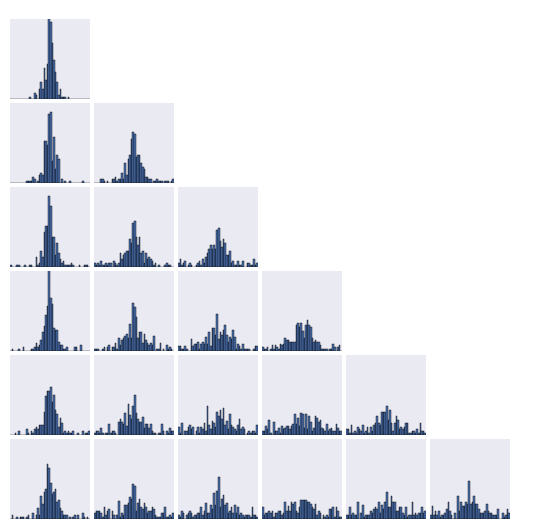

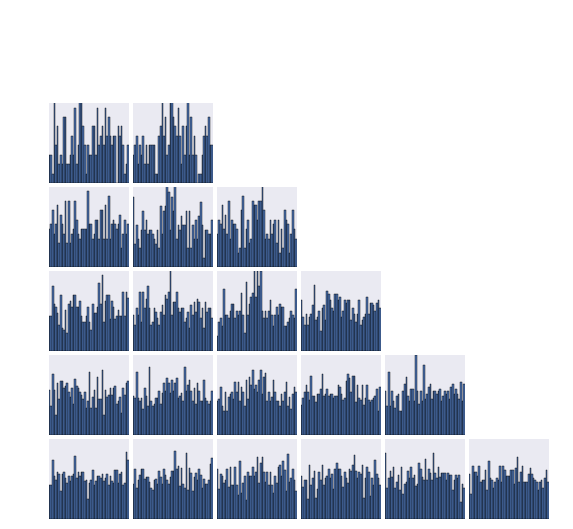

In [5]:
# axes_fig6, axes_fig7 = plots_experimental_data.plot_sequential_collapsed_doublepowerlaw(data_gorgo)
axes_hist_target, axes_hist_nontarget = plots_experimental_data.plot_sequential_histograms_errors(data_gorgo)

In [7]:
# axes_fig6[0].figure.savefig(dataio.create_formatted_filename("seq_lasttrecall_{label}_{unique_id}.pdf"))
# axes_fig7[0, 0].figure.savefig(dataio.create_formatted_filename("seq_allt_{label}_{unique_id}.pdf"))
axes_hist_target[0, 0].figure.savefig(dataio.create_formatted_filename(
    "seq_histogram_target_{label}_{unique_id}.pdf"))
axes_hist_nontarget[0, 0].figure.savefig(dataio.create_formatted_filename(
    "seq_histogram_nontarget_{label}_{unique_id}.pdf"))

Collapsed trecall summed BIC:  10521.0245738
Collapsed nitems summed BIC:  10474.1413141


Collapsed double powerlaw BIC:  10348.4095108
Original non-collapsed BIC:  14226.7449149

Collapsed double powerlaw LL:  -4279.1728066
Original non-collapsed LL:  -5916.5597342


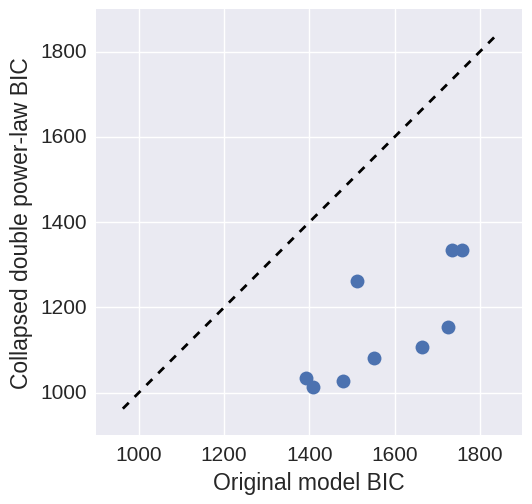

In [321]:
plots_experimental_data.plot_compare_bic_collapsed_mixture_model_sequential(data_gorgo, dataio)

In [8]:
T_space = np.unique(data_gorgo['n_items'])
subject_space = np.unique(data_gorgo['subject'])

In [9]:
targets_all_T_trecall = collections.defaultdict(list)
responses_all_T_trecall = collections.defaultdict(list)
targets_all_T = collections.defaultdict(list)
responses_all_T = collections.defaultdict(list)
targets_all_trecall = collections.defaultdict(list)
responses_all_trecall = collections.defaultdict(list)

for T_i, T in enumerate(T_space):
    for trecall_i, trecall in enumerate(T_space):
        if trecall <= T:
            for subject in subject_space:
                targets_all_T_trecall[(T, trecall)].append(
                    data_gorgo['data_subject_split']['data_subject'][subject]['targets'][T_i, trecall_i])
                responses_all_T_trecall[(T, trecall)].append(
                    data_gorgo['data_subject_split']['data_subject'][subject]['responses'][T_i, trecall_i])
                targets_all_T[T].append(
                    data_gorgo['data_subject_split']['data_subject'][subject]['targets'][T_i, trecall_i])
                responses_all_T[T].append(
                    data_gorgo['data_subject_split']['data_subject'][subject]['responses'][T_i, trecall_i])
                targets_all_trecall[trecall].append(
                    data_gorgo['data_subject_split']['data_subject'][subject]['targets'][T_i, trecall_i])
                responses_all_trecall[trecall].append(
                    data_gorgo['data_subject_split']['data_subject'][subject]['responses'][T_i, trecall_i])
                
            targets_all_T_trecall[(T, trecall)] = np.concatenate(targets_all_T_trecall[(T, trecall)])
            responses_all_T_trecall[(T, trecall)] = np.concatenate(responses_all_T_trecall[(T, trecall)])
            
    targets_all_T[T] = np.concatenate(targets_all_T[T])
    responses_all_T[T] = np.concatenate(responses_all_T[T])

for trecall_i, trecall in enumerate(T_space):
    targets_all_trecall[trecall] = np.concatenate(targets_all_trecall[trecall])
    responses_all_trecall[trecall] = np.concatenate(responses_all_trecall[trecall])

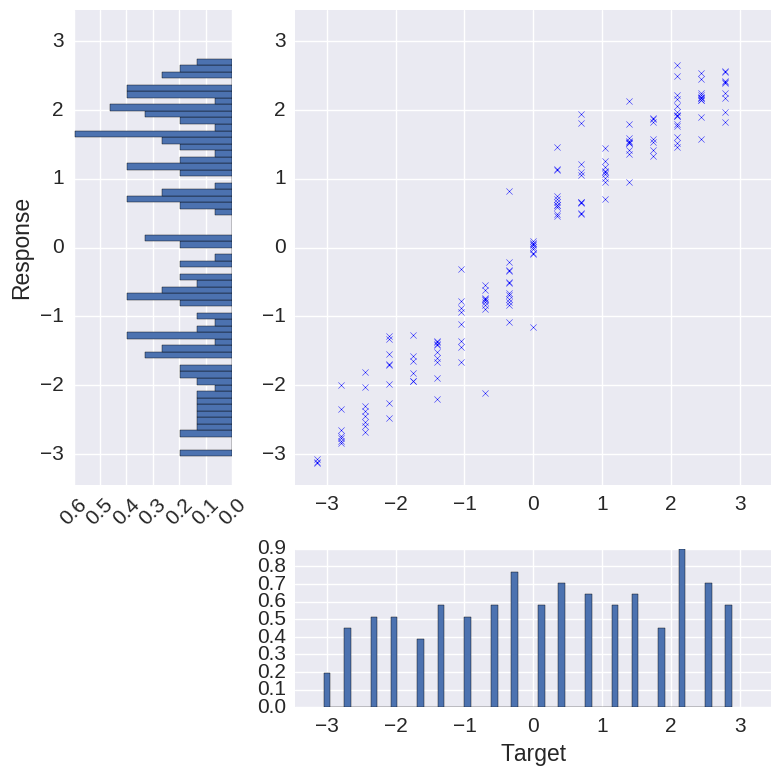

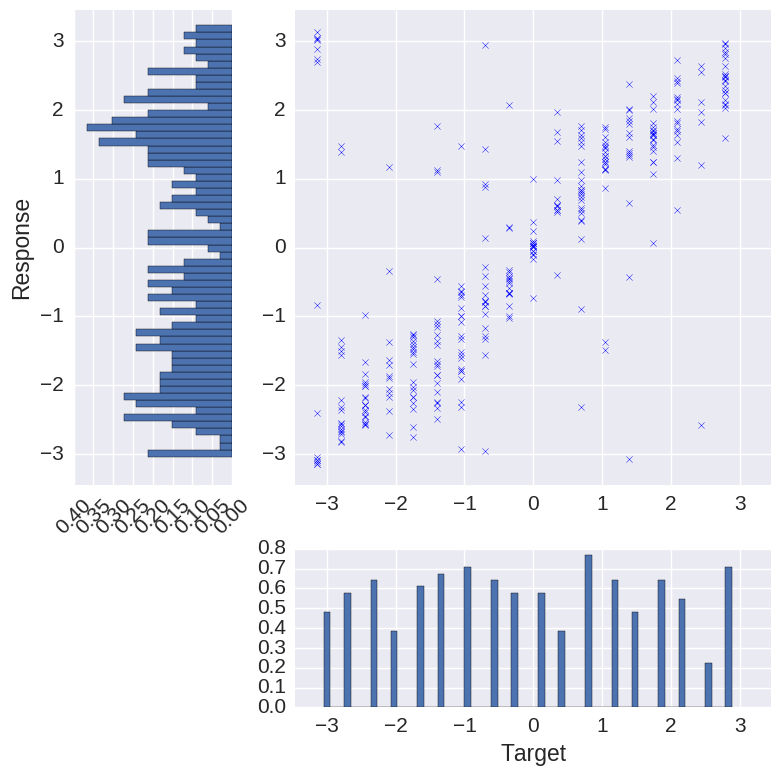

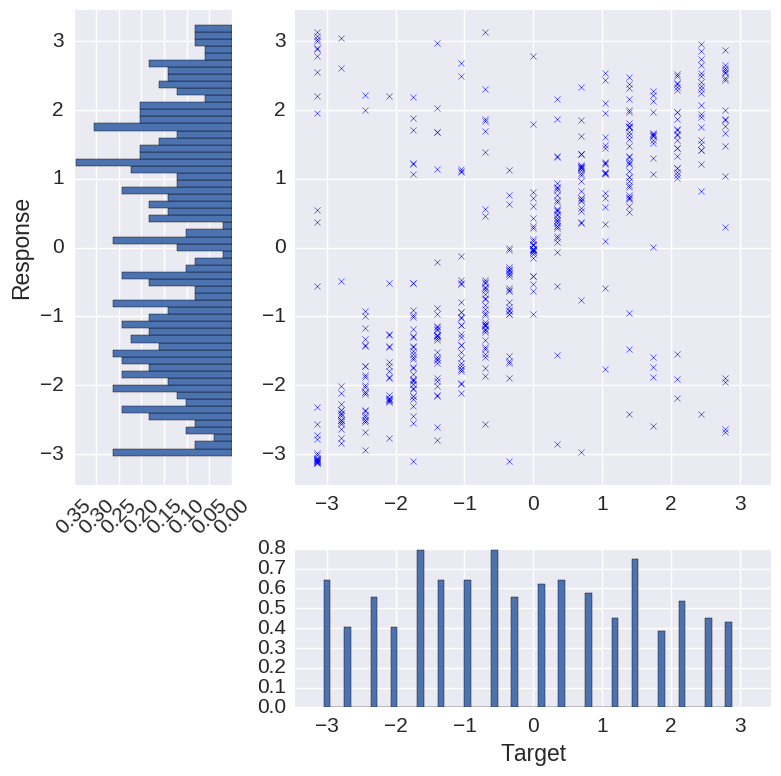

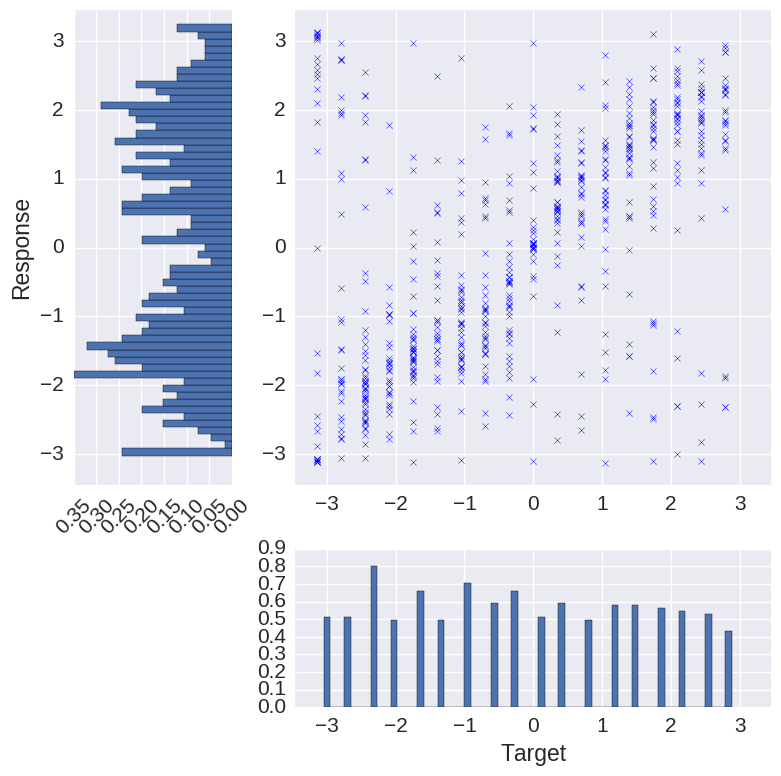

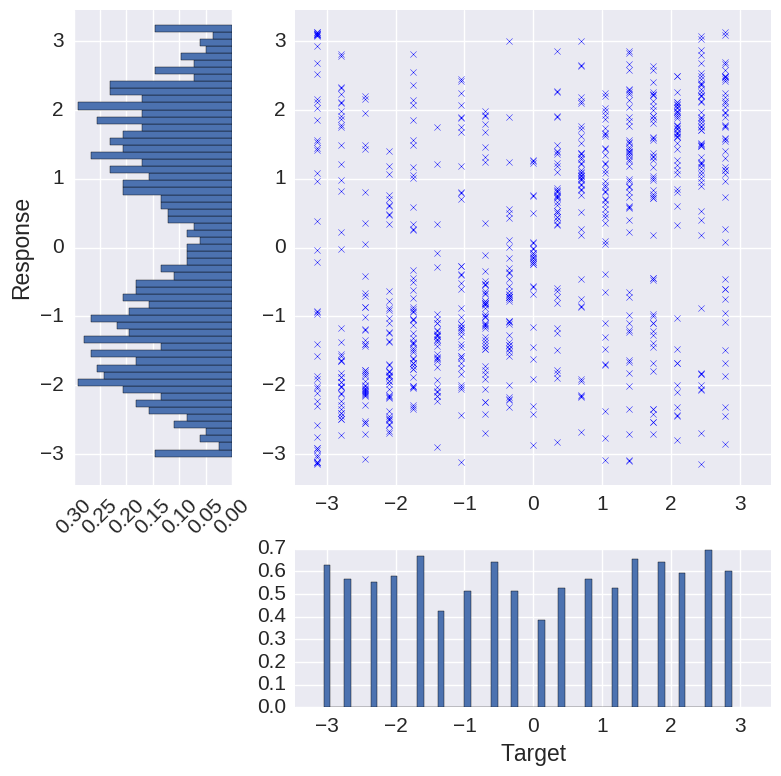

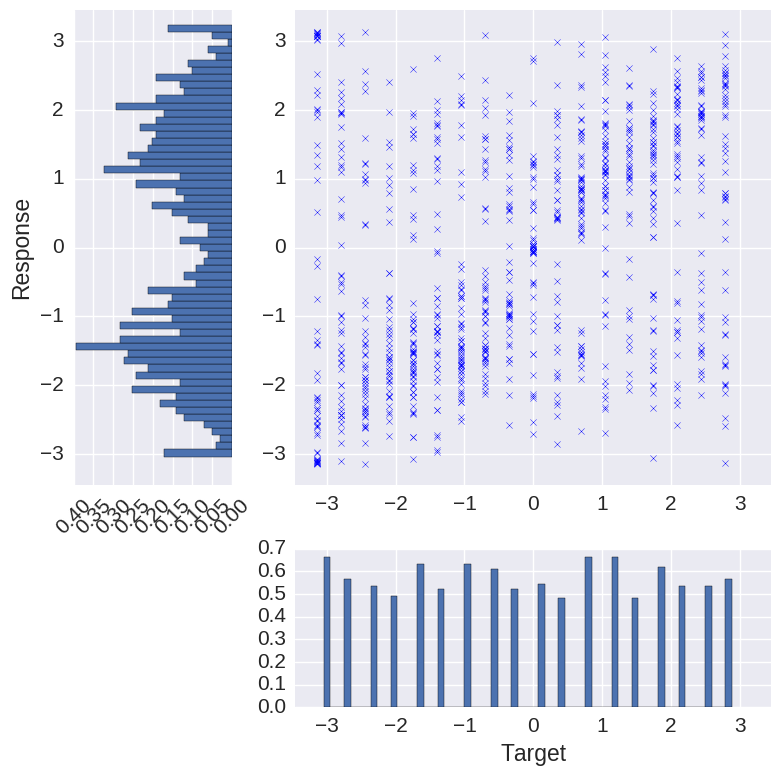

In [14]:
if False:
    # Do per nitems and trecall
    for T_i, T in enumerate(T_space):
        for trecall_i, trecall in enumerate(T_space):
            if trecall <= T:
                utils.scatter_marginals(
                    targets_all_T_trecall[(T, trecall)],
                    responses_all_T_trecall[(T, trecall)],
                    xlabel='Target',
                    ylabel='Response',
                    title='%d items, %d trecall' % (T, trecall),
                    figsize=(9, 9),
                    factor_axis=1.1,
                    bins=61)
if True:
    f2_all = []
    # Do per nitems
    for T_i, T in enumerate(T_space):
        f = utils.scatter_marginals(
            targets_all_T[T],
            responses_all_T[T],
            xlabel='Target',
            ylabel='Response',
#             title='%d items' % (T),
            figsize=(9, 9),
            factor_axis=1.1,
            bins=61)
        
        f2_all.append(f)

if False:
    # Do per trecall
    for trecall_i, trecall in enumerate(T_space):
        utils.scatter_marginals(
            targets_all_trecall[trecall],
            responses_all_trecall[trecall],
            xlabel='Target',
            ylabel='Response',
#             title='%d trecall' % (trecall),
            figsize=(9, 9),
            factor_axis=1.1,
            bins=61)

In [15]:
for f2_i, f2 in enumerate(f2_all):
    f2.savefig(dataio.create_formatted_filename("marginal_scatter_T%d_{label}_{unique_id}.pdf" % (f2_i + 1)))

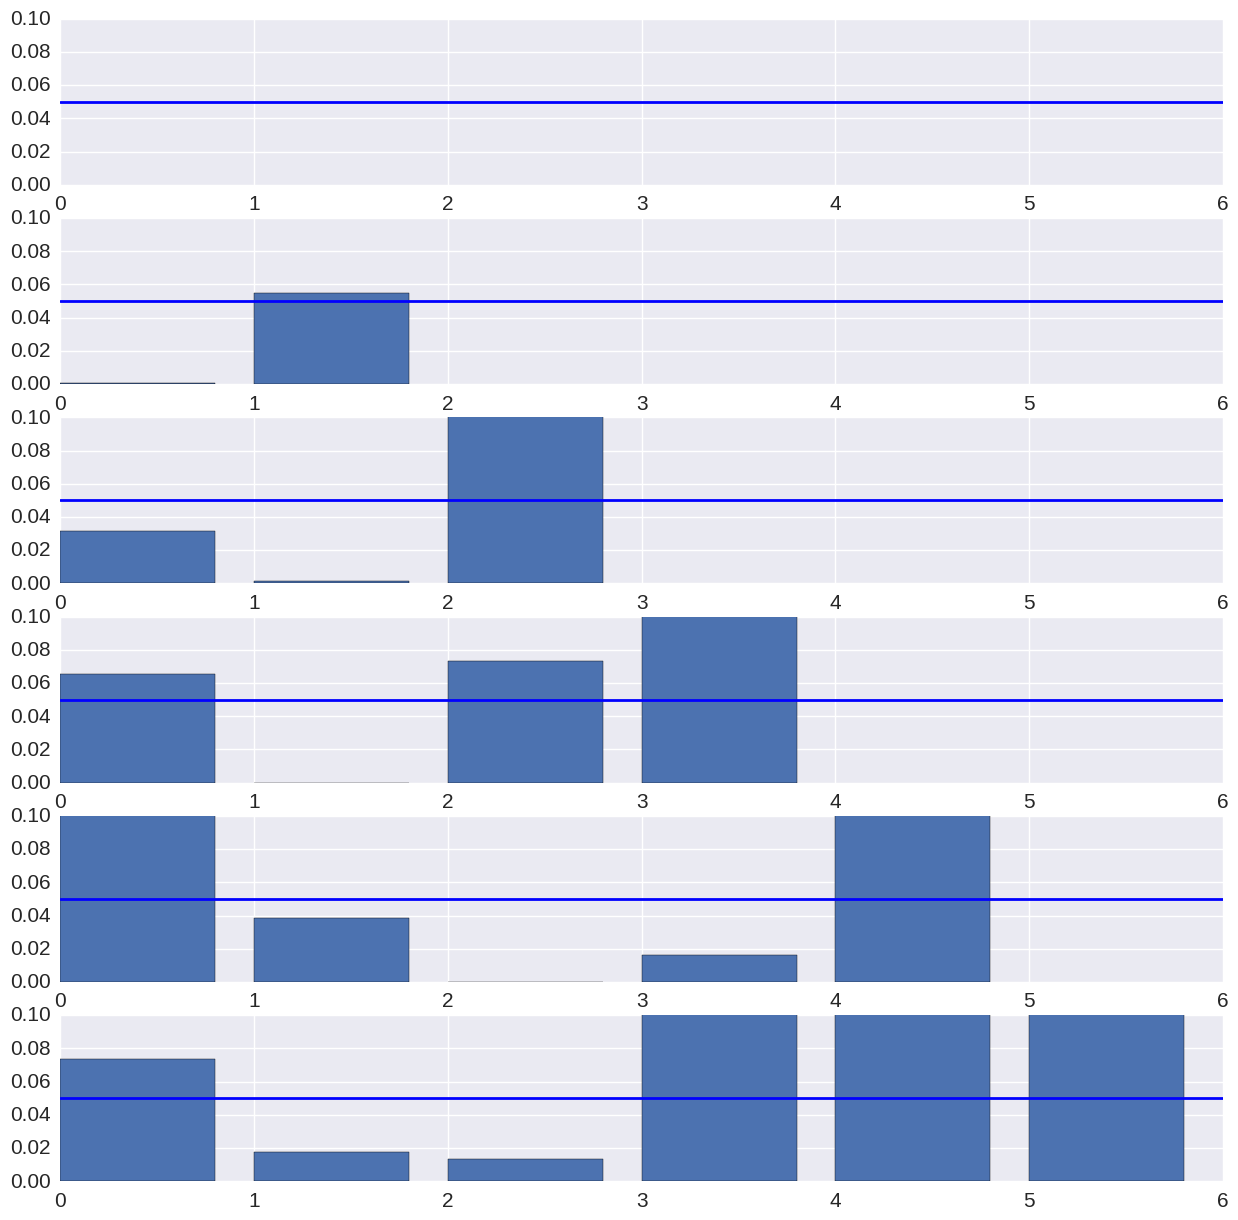

In [106]:
unique_n_items = np.unique(data_gorgo['n_items'])

f, axes = plt.subplots(nrows=6, figsize=(15, 15))
for trecall_i, pvalues in enumerate(data_gorgo['vtest_nitems_trecall']):
    axes[trecall_i].bar(np.arange(6), pvalues)
    axes[trecall_i].axhline(0.05)
    axes[trecall_i].set(xlim=(0, 6), ylim=(0, 0.1))

In [119]:
data_gorgo['vtest_nitems_trecall']

array([[             nan,              nan,              nan,
                     nan,              nan,              nan],
       [  7.23468158e-04,   5.49823879e-02,              nan,
                     nan,              nan,              nan],
       [  3.17874186e-02,   1.39438021e-03,   4.20767853e-01,
                     nan,              nan,              nan],
       [  6.55165999e-02,   1.74021450e-05,   7.33731407e-02,
          6.05787731e-01,              nan,              nan],
       [  1.26648681e-01,   3.82354713e-02,   1.50442660e-04,
          1.65103207e-02,   7.06656183e-01,              nan],
       [  7.36018792e-02,   1.75556617e-02,   1.36404839e-02,
          2.36543423e-01,   1.87608916e-01,   8.57171984e-01]])

## Bootstrap misbinding

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets
Reloader data generated from  generator_bootstrap_experimental_gorgo11_sequential_240717.py
Running  /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/reloader_bootstrap_experimental_gorgo11_sequential_240717.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_bootstrap_experimental_gorgo11_sequential_240717.py
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-892f0a0f-4677-4354-a19b-20e9b18a7cac.npy
0.00%, -- left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_e

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-6ed2b4e1-8d37-42be-8511-8d2d8506866f.npy
3.00%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-d751c78c-65e3-4983-bbf4-8d3612630301.npy
3.10%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-e9655229-f82c-4760-b3ca-0f2ad3ed5bd1.npy
3.20%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/da

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-6efe34ce-5b8f-4878-958e-a1bc7da25132.npy
12.20%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-54dfd2c7-b713-4d5d-8880-701813a11393.npy
12.30%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-949811df-e788-42bb-9db8-2a1b9935e5d1.npy
12.40%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-fd8f4297-12e1-4ea3-b500-76514d13473a.npy
21.70%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-572c20cf-859c-4389-9786-07dbe842f8fd.npy
21.80%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-0d8d70f1-7886-4ee1-9f1f-742e6966222f.npy
21.90%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-cdc6f4e4-9850-4a10-b2d1-f7e9eed15085.npy
30.40%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-c0565473-9165-42be-8f1b-20e79ced5f55.npy
30.50%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-1868565a-a951-4e0f-8dee-6ac2163f04e5.npy
30.60%, 2s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-85364e3f-d883-47a2-a5a2-30dd25ced905.npy
39.90%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-209706d9-832f-490e-87e1-a243defcffdc.npy
40.00%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-e083ae2c-ea54-47fe-8503-30bdf7d446ae.npy
40.10%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-7e8c2e4d-1f9c-4b5a-86e3-7c16358c7b9f.npy
49.00%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-4d2046c4-8ed9-4596-9f55-c824ce8eb945.npy
49.10%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-866ed216-f0ec-4ac5-8d93-437b0f3077de.npy
49.20%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-5dc50978-cf1f-4db1-a2bc-12aacb410744.npy
57.60%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-80babf2a-8cf2-4884-9343-6af6cc1f93ea.npy
57.70%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-ffeb1e22-80c0-470e-9ed6-7e2e814a7020.npy
57.80%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-8a9fc53e-c2c3-4367-bcd2-1575aee076d8.npy
66.90%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-900cadaf-991f-4bd9-a9d9-79d6ea64c28e.npy
67.00%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-78ff2858-608b-4c35-a3c9-4692fffbe9c3.npy
67.10%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-36413737-33e5-4c80-9b63-fd4907795bd9.npy
76.40%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-30f8a443-b097-4b6d-b4ae-bbd48a48bf3a.npy
76.50%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-8b56e5db-bc3b-469d-92ef-b1a7c2d94015.npy
76.60%, 1s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-1228a51f-eb39-43db-86e8-e1c9cf0f4413.npy
85.50%, 0s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-10fb632d-348a-486c-a741-5e54f56d947d.npy
85.60%, 0s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-be380124-8d75-49a6-93d2-c944802ceced.npy
85.70%, 0s left - 14.08 17:15
num_repetitions 1.00
/nfs

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-f2b0388b-e767-47ce-80b2-b8c59bc0b9a0.npy
94.70%, 0s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-52490d26-2064-4a60-ae2b-3791fe644495.npy
94.80%, 0s left - 14.08 17:15
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717-launcher_do_bootstrap_experimental_sequential-a7114204-5805-4e3c-98b7-ff8d22bde554.npy
94.90%, 0s left - 14.08 17:15
num_repetitions 1.00
/nfs

=== FileIO ready: /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_sequential_bootstrapsamples1_240717/outputs/global_plots_boostrap-plots_boostrap-e24cab0f-5c71-4763-b228-846ffdfb8ab5 ===
reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/em_gorgo_seq_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/collapsed_em_gorgo_seq_new.pickle


>>> PLOTTING HISTOGRAMS <<<
Nitems 2, trecall 1, all subjects
Nitems 2, trecall 2, all subjects
Nitems 3, trecall 1, all subjects


/nfs/nhome/live/lmatthey/Applications/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Nitems 3, trecall 2, all subjects
Nitems 3, trecall 3, all subjects
Nitems 4, trecall 1, all subjects
Nitems 4, trecall 2, all subjects
Nitems 4, trecall 3, all subjects
Nitems 4, trecall 4, all subjects
Nitems 5, trecall 1, all subjects
Nitems 5, trecall 2, all subjects
Nitems 5, trecall 3, all subjects
Nitems 5, trecall 4, all subjects
Nitems 5, trecall 5, all subjects
Nitems 6, trecall 1, all subjects
Nitems 6, trecall 2, all subjects
Nitems 6, trecall 3, all subjects
Nitems 6, trecall 4, all subjects
Nitems 6, trecall 5, all subjects
Nitems 6, trecall 6, all subjects


>>> ESTIMATING P-VALUES <<<
Nitems 2, trecall 1, all subjects
p_val: [[ nan  nan  nan  nan  nan  nan]
 [  0.  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan]]
Nitems 2, trecall 1, subject 1
p_val: 0.0
Nitems 2, trecall 1, subject 2
p_val: 0.304
Nitems 2, trecall 1, subject 3
p_val: 0.051
Nitems 2, trecall 1, s

p_val: 0.466
Nitems 5, trecall 3, subject 2
p_val: 0.007
Nitems 5, trecall 3, subject 3
p_val: 0.106
Nitems 5, trecall 3, subject 4
p_val: 0.025
Nitems 5, trecall 3, subject 5
p_val: 0.115
Nitems 5, trecall 3, subject 6
p_val: 0.015
Nitems 5, trecall 3, subject 7
p_val: 0.026
Nitems 5, trecall 3, subject 8
p_val: 0.108
Nitems 5, trecall 3, subject 9
p_val: 0.0
Nitems 5, trecall 4, all subjects
p_val: [[   nan    nan    nan    nan    nan    nan]
 [ 0.     0.       nan    nan    nan    nan]
 [ 0.     0.     0.       nan    nan    nan]
 [ 0.     0.     0.014  0.001    nan    nan]
 [ 0.     0.     0.     0.008    nan    nan]
 [   nan    nan    nan    nan    nan    nan]]
Nitems 5, trecall 4, subject 1
p_val: 0.007
Nitems 5, trecall 4, subject 2
p_val: 0.0
Nitems 5, trecall 4, subject 3
p_val: 0.335
Nitems 5, trecall 4, subject 4
p_val: 0.008
Nitems 5, trecall 4, subject 5
p_val: 0.192
Nitems 5, trecall 4, subject 6
p_val: 0.0
Nitems 5, trecall 4, subject 7
p_val: 0.042
Nitems 5, trecall 4, 

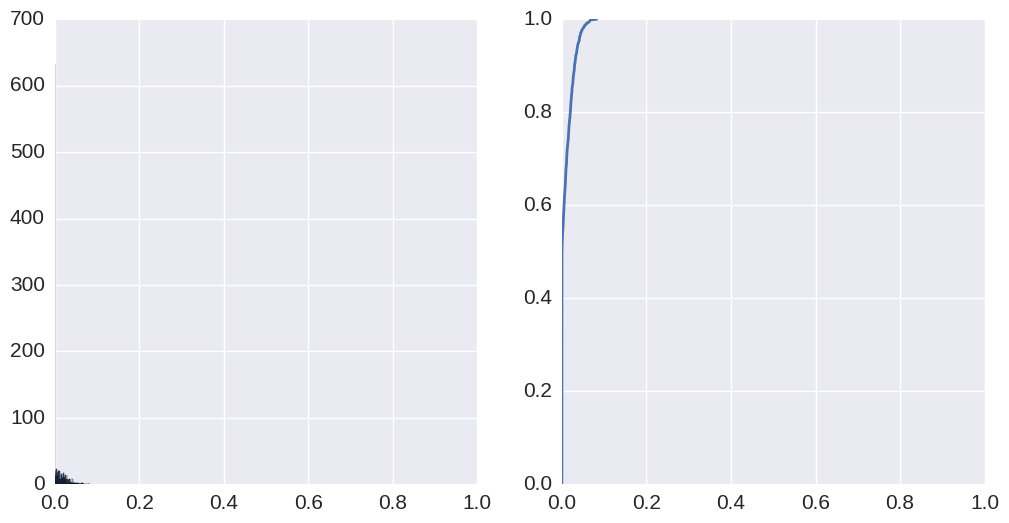

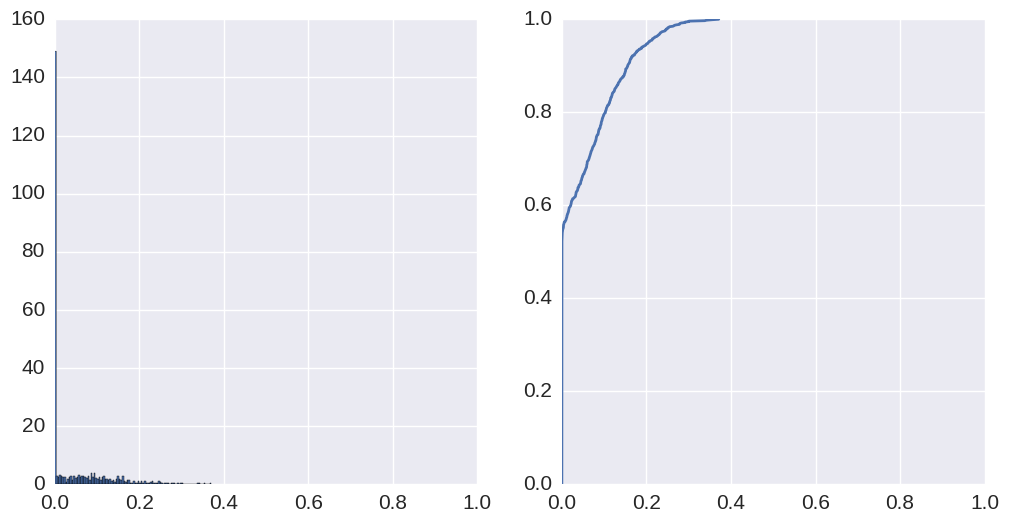

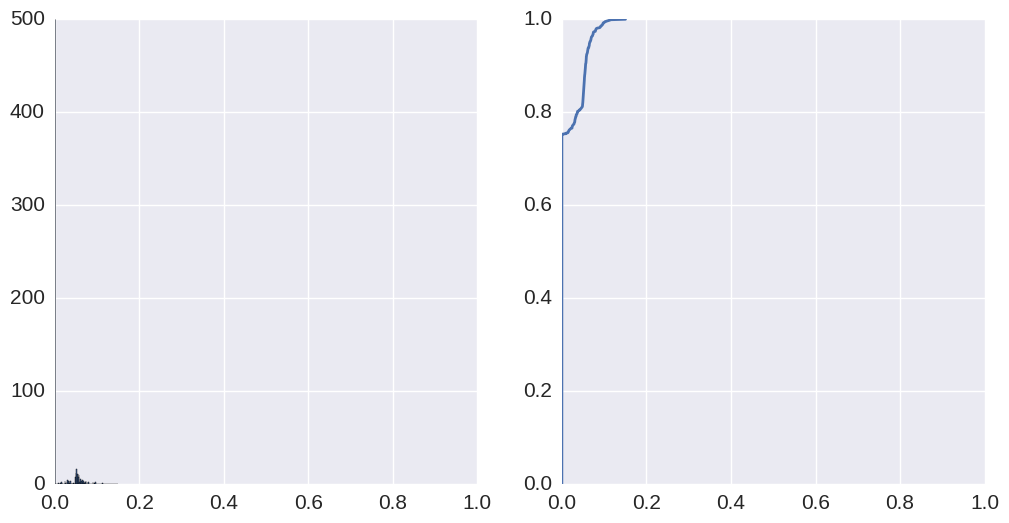

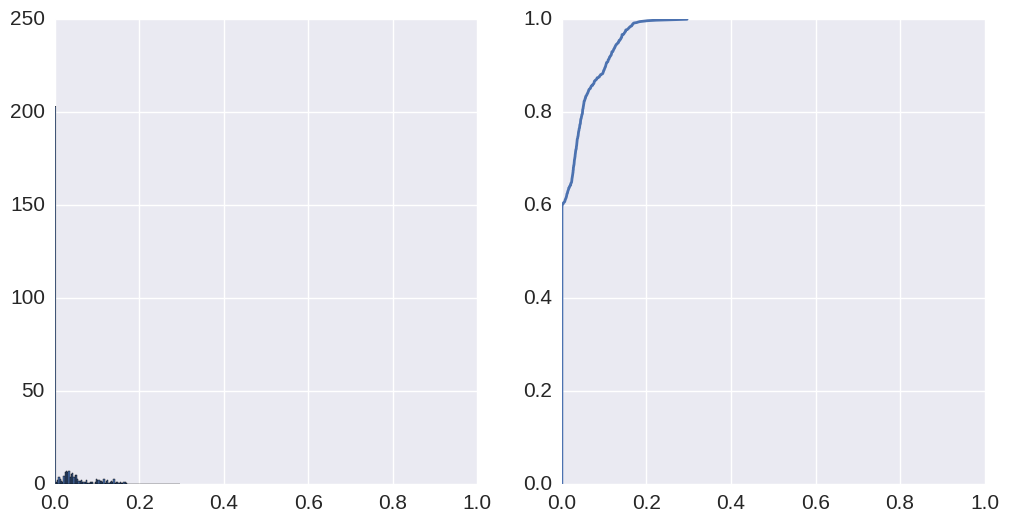

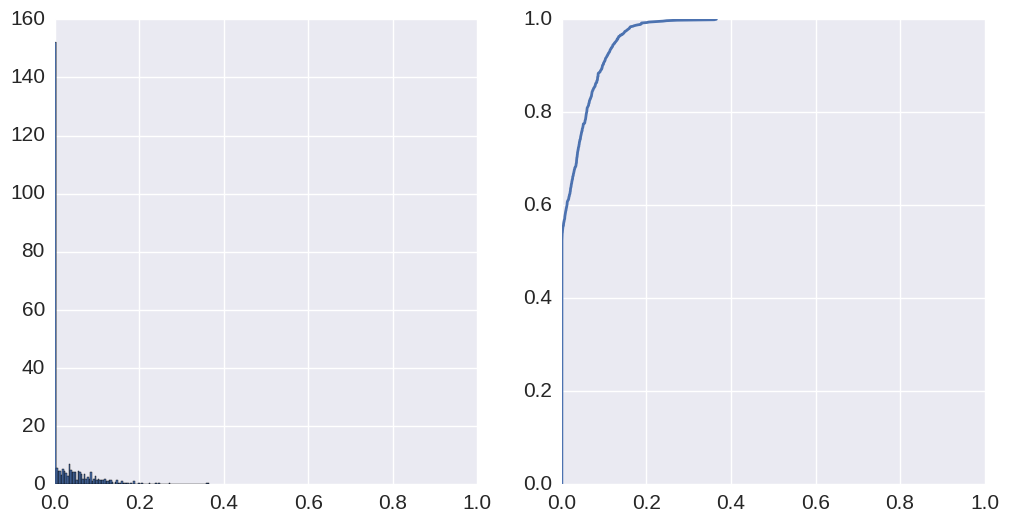

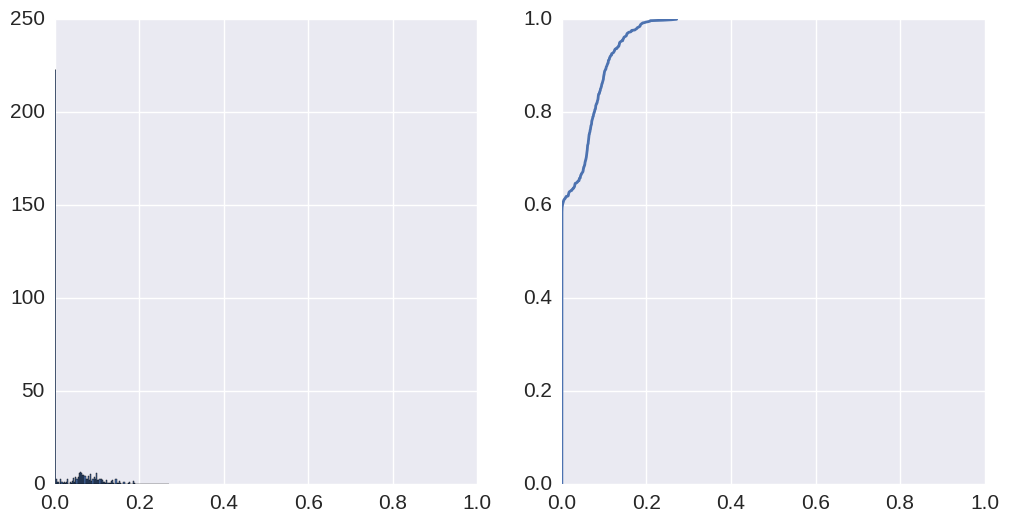

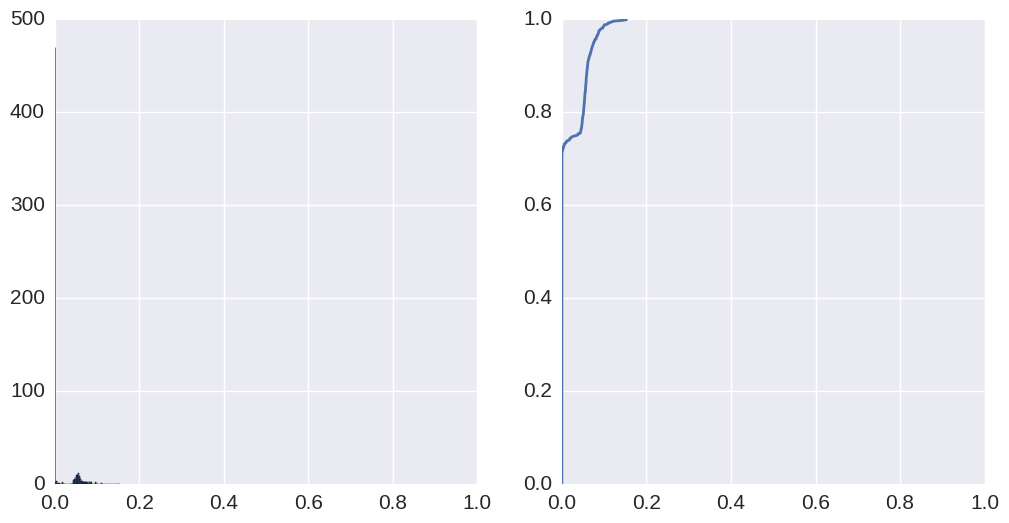

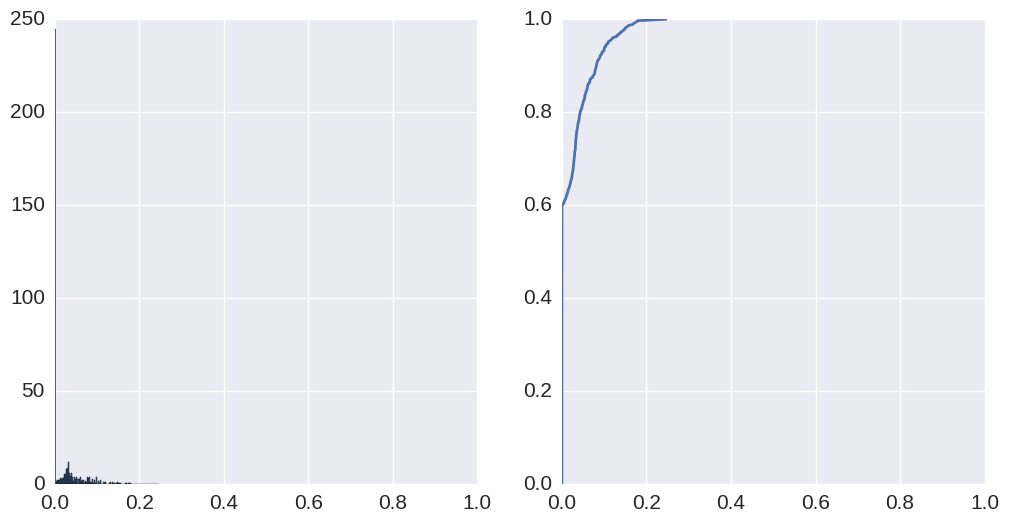

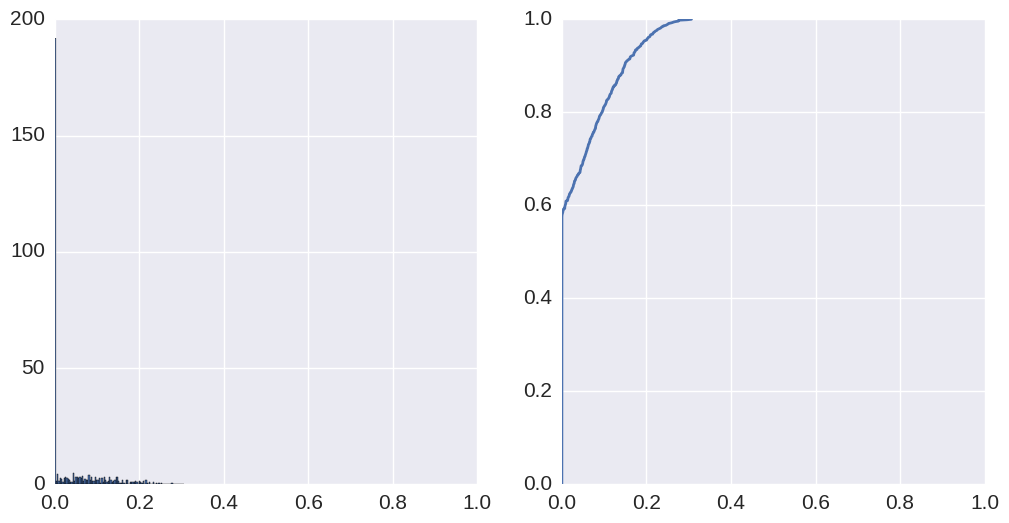

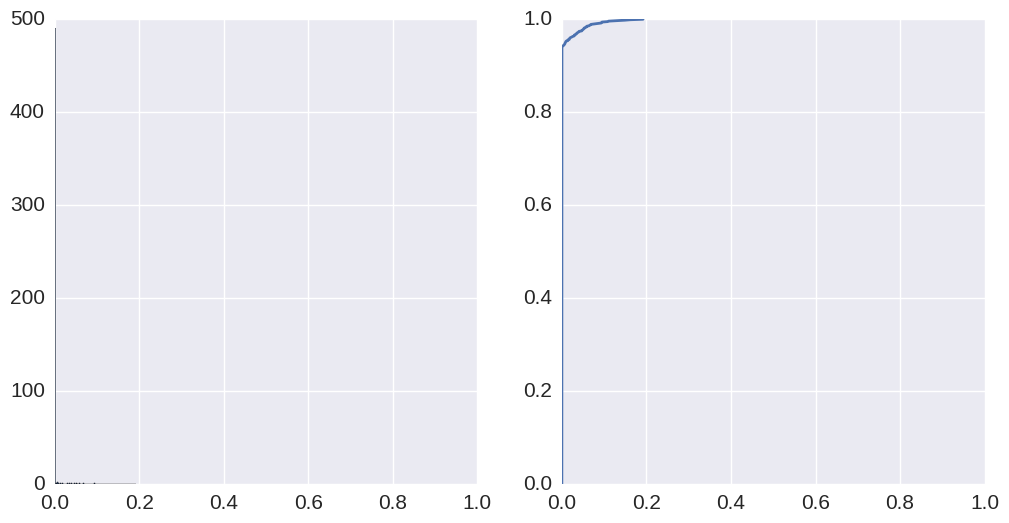

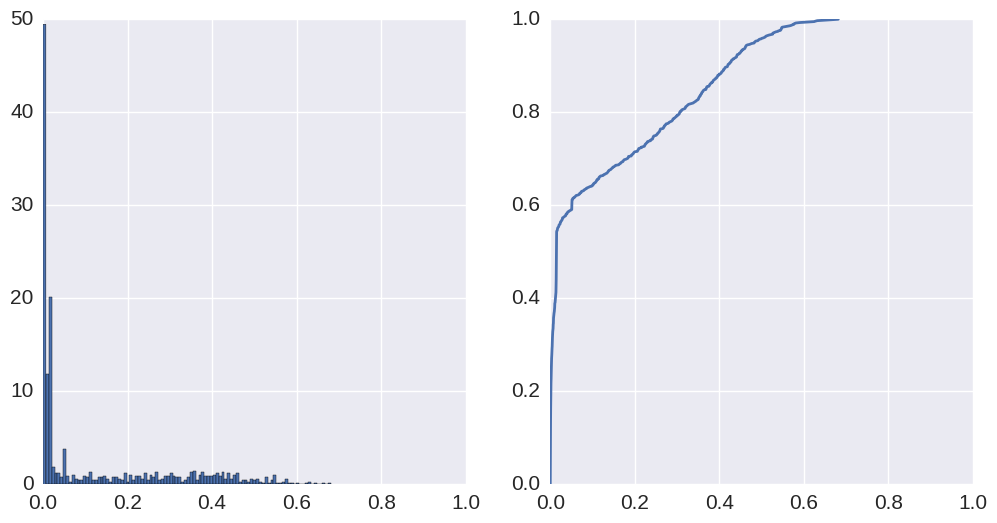

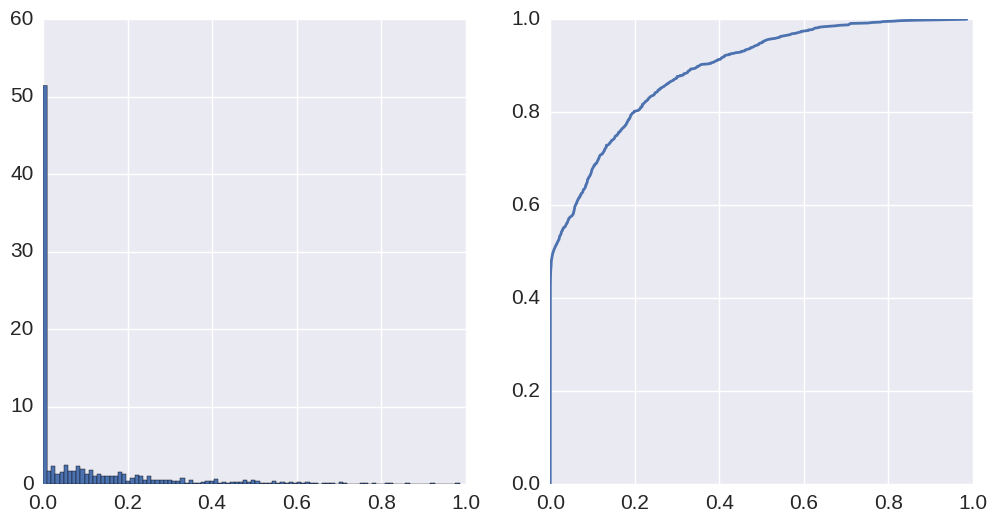

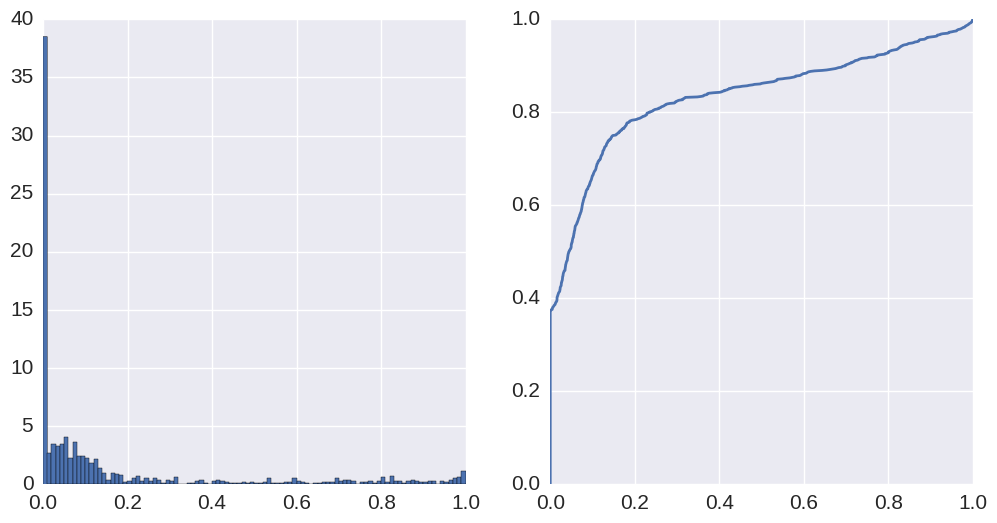

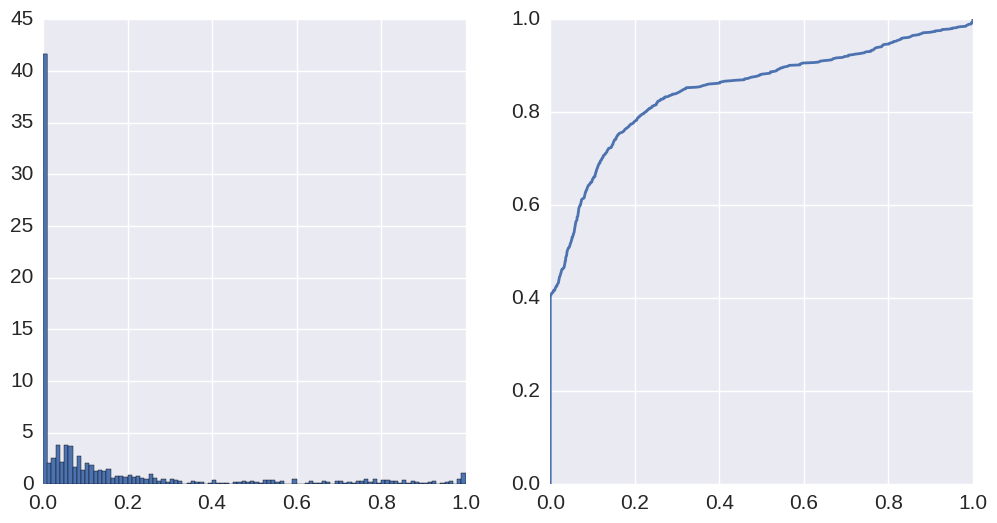

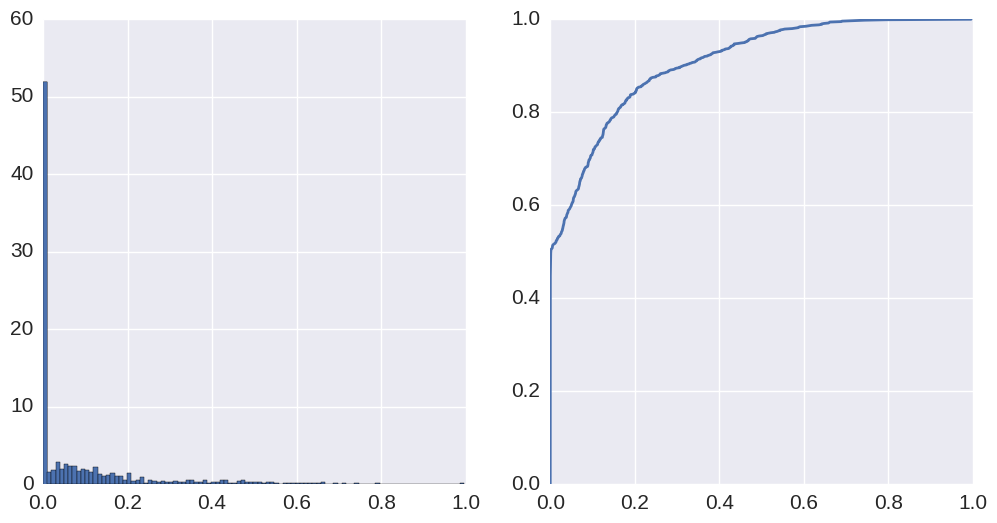

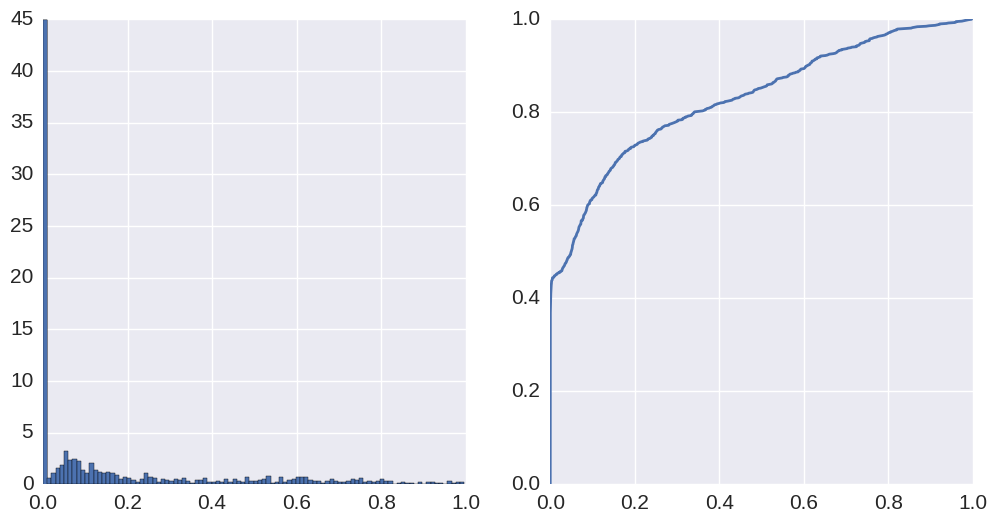

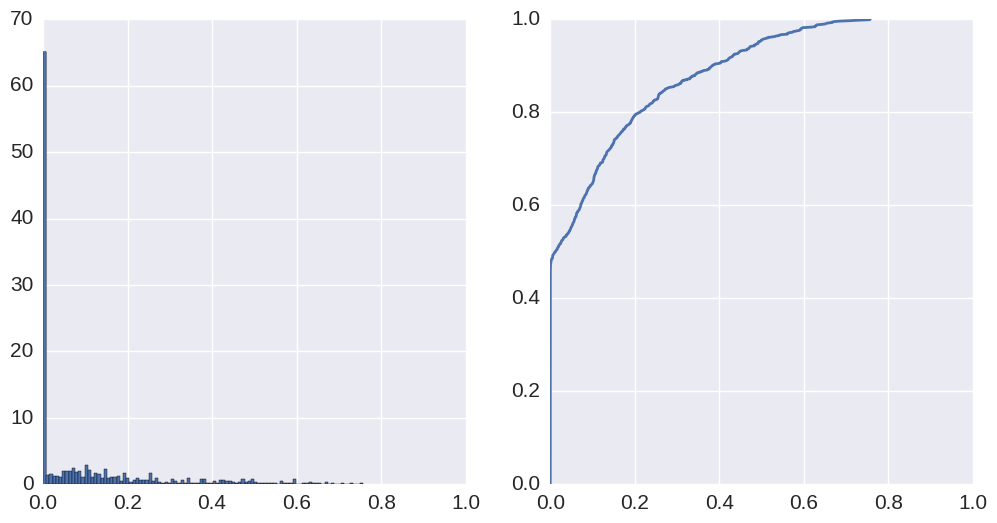

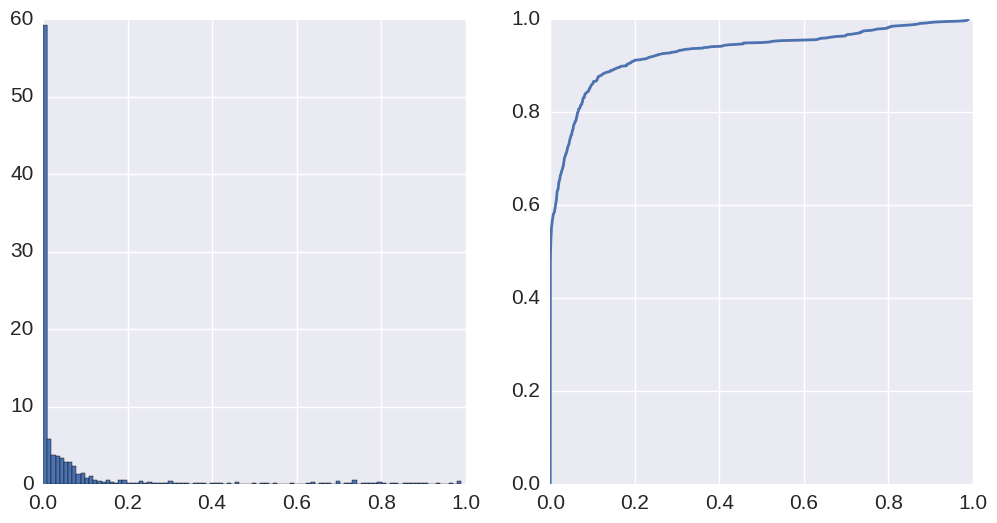

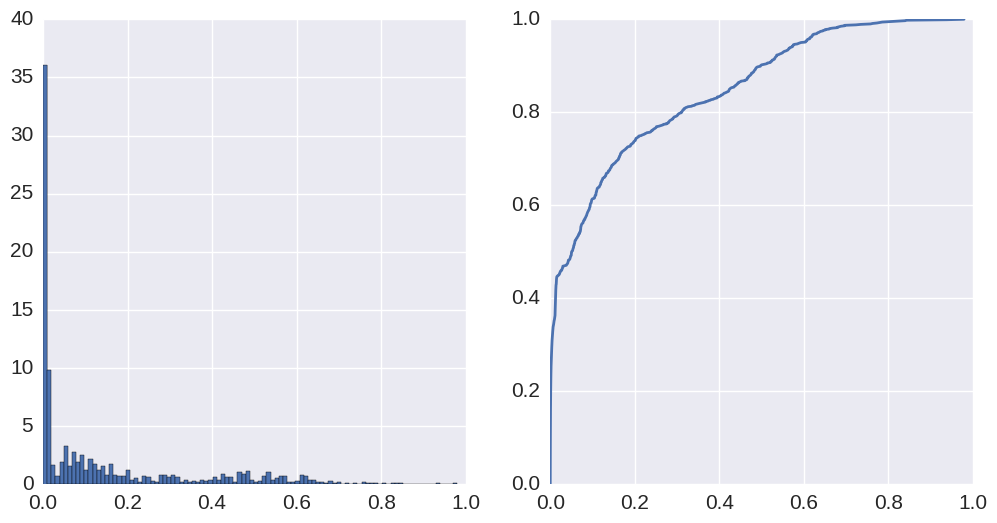

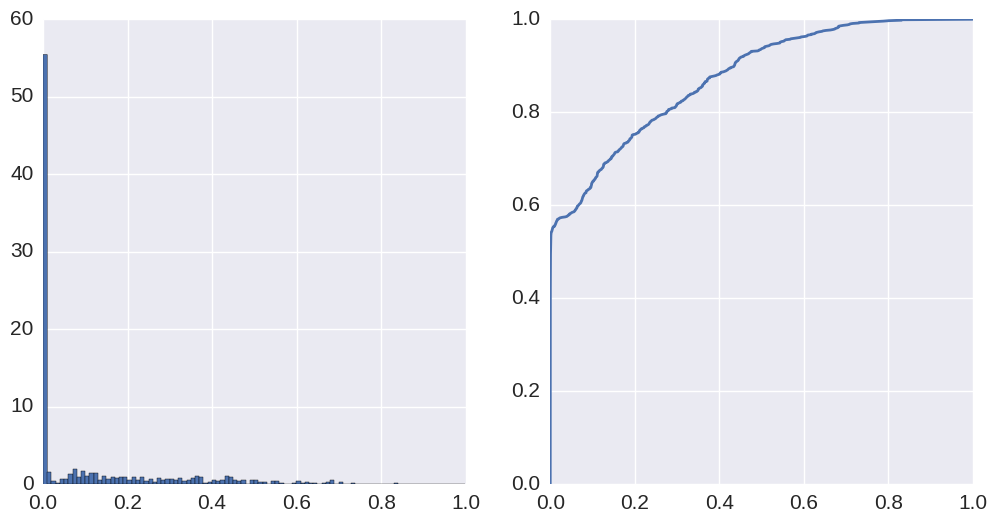

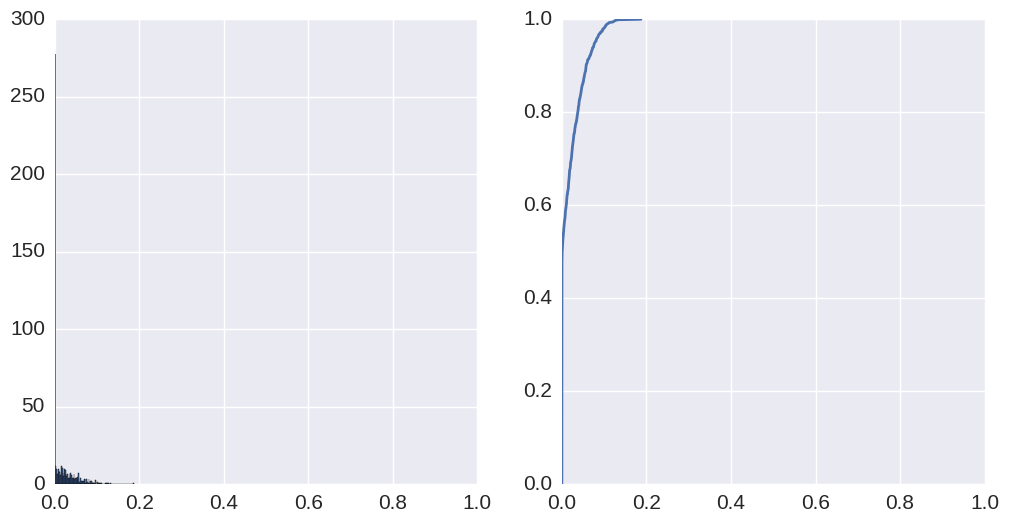

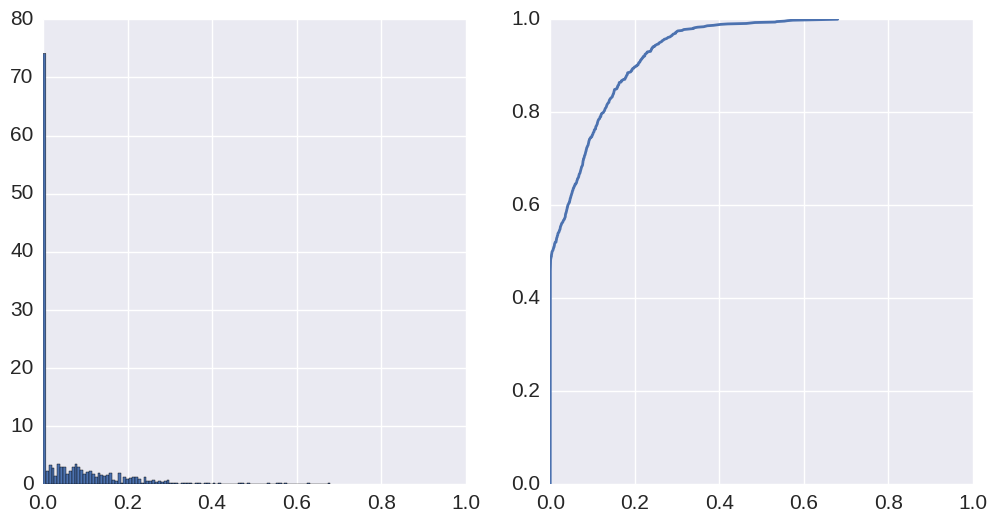

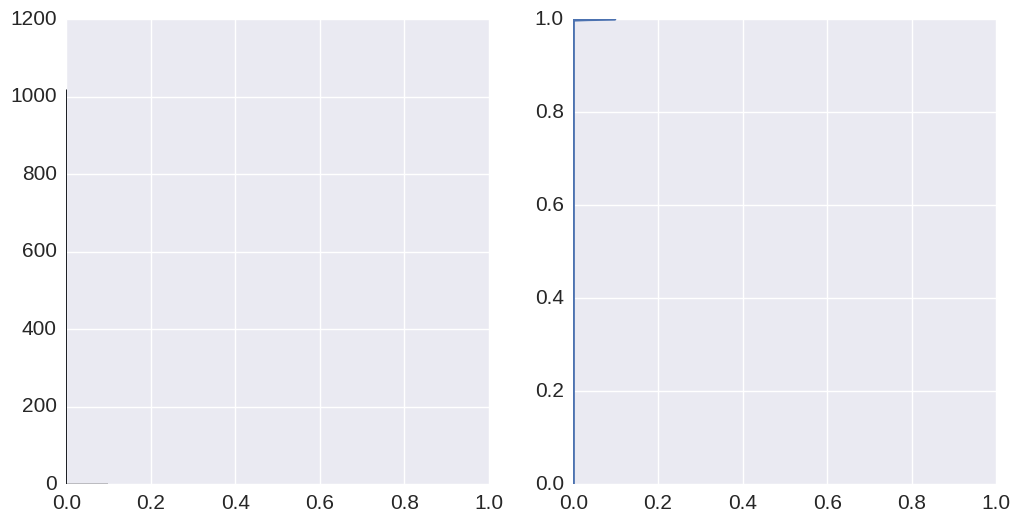

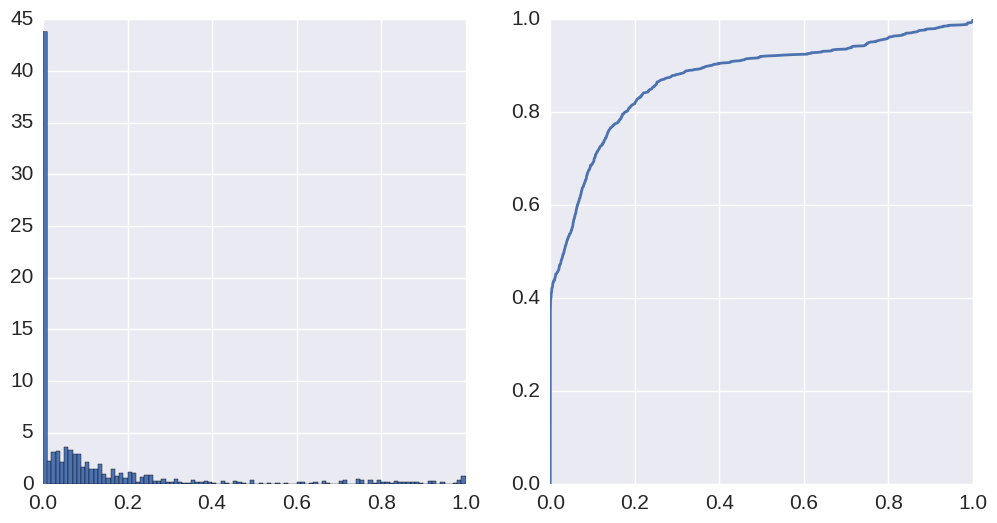

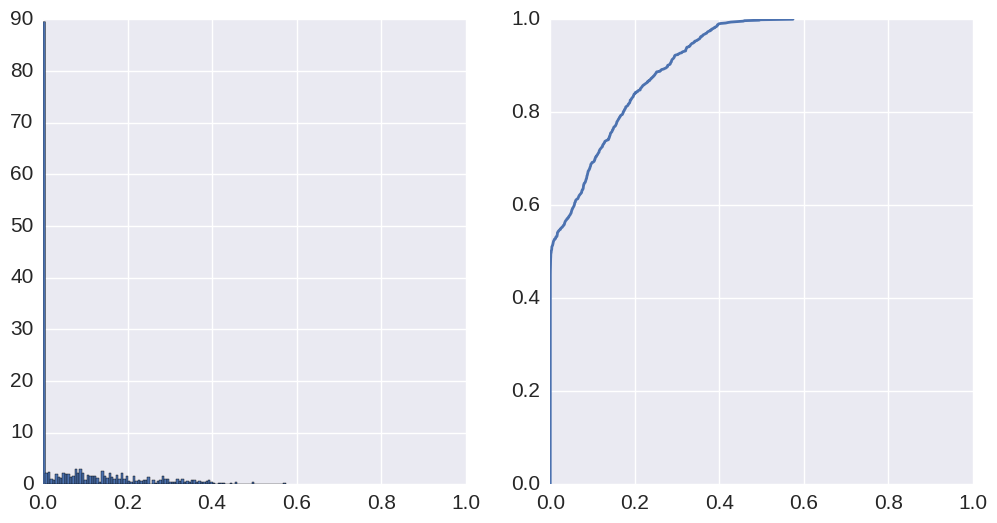

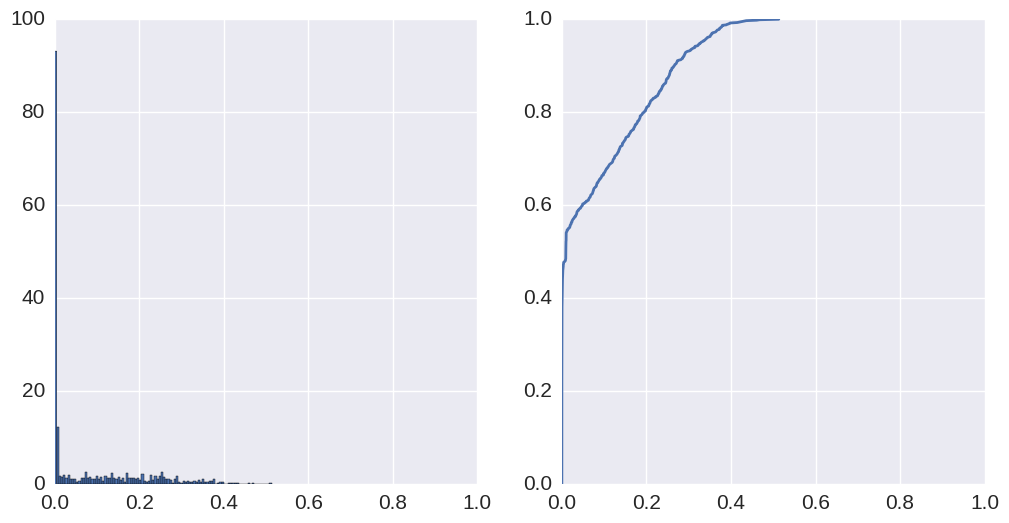

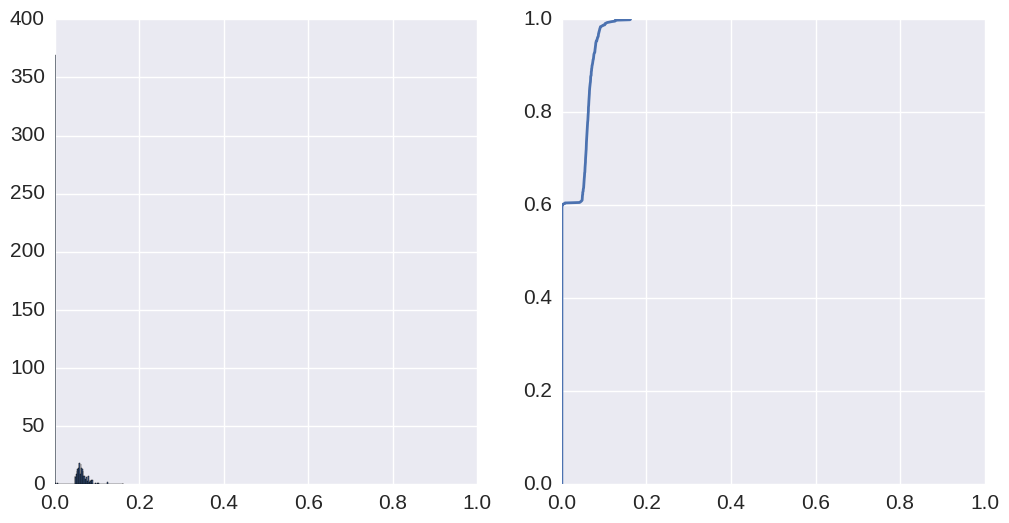

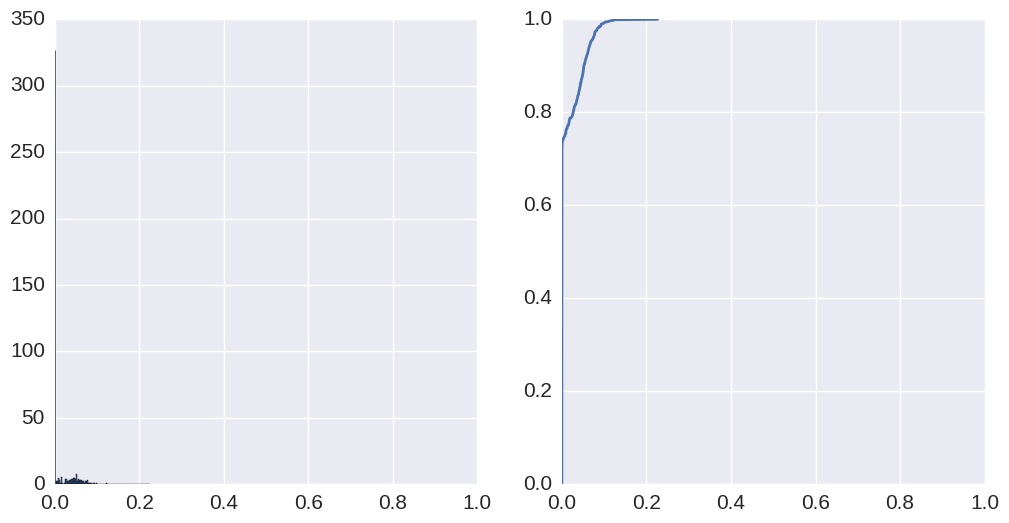

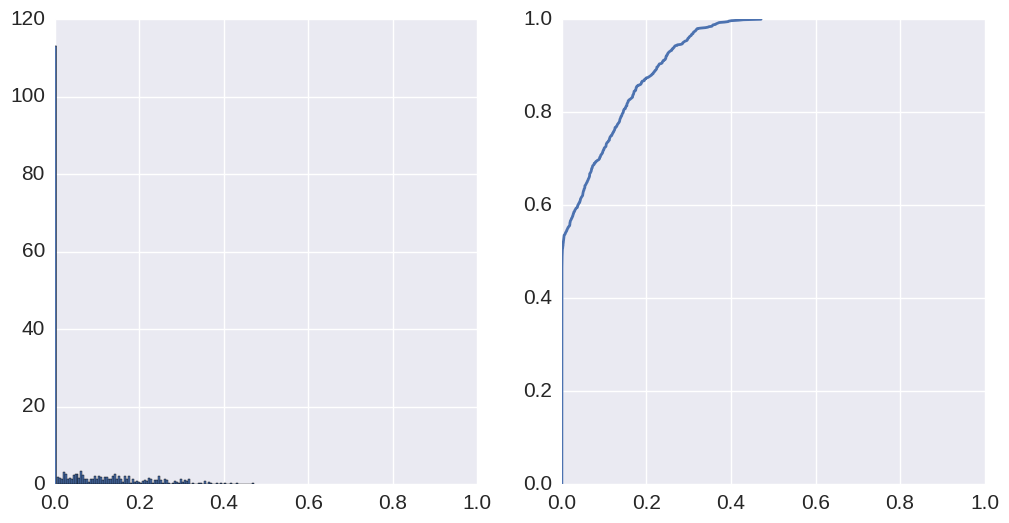

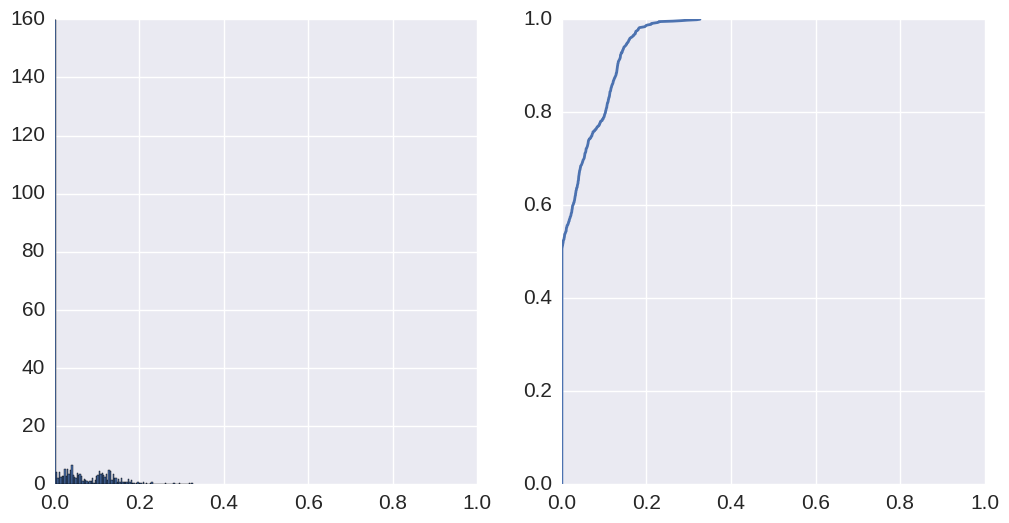

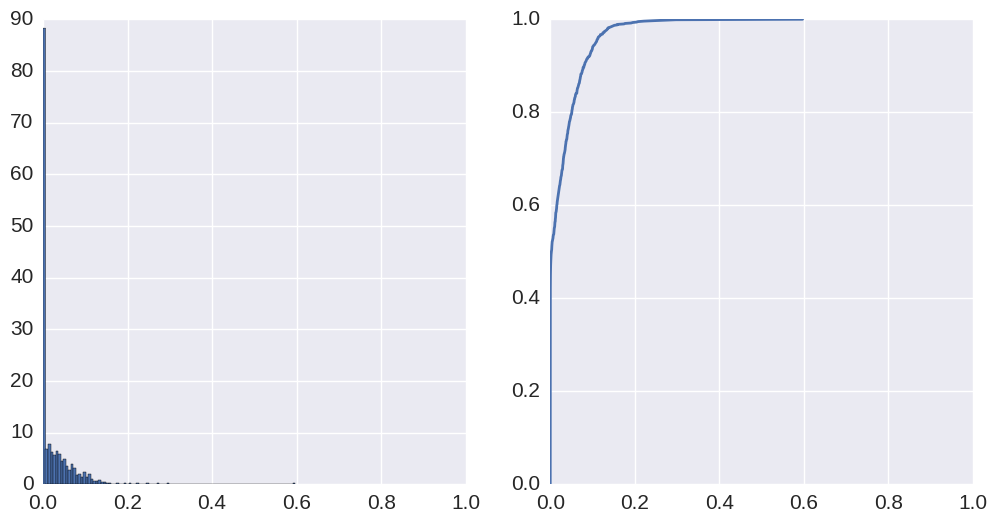

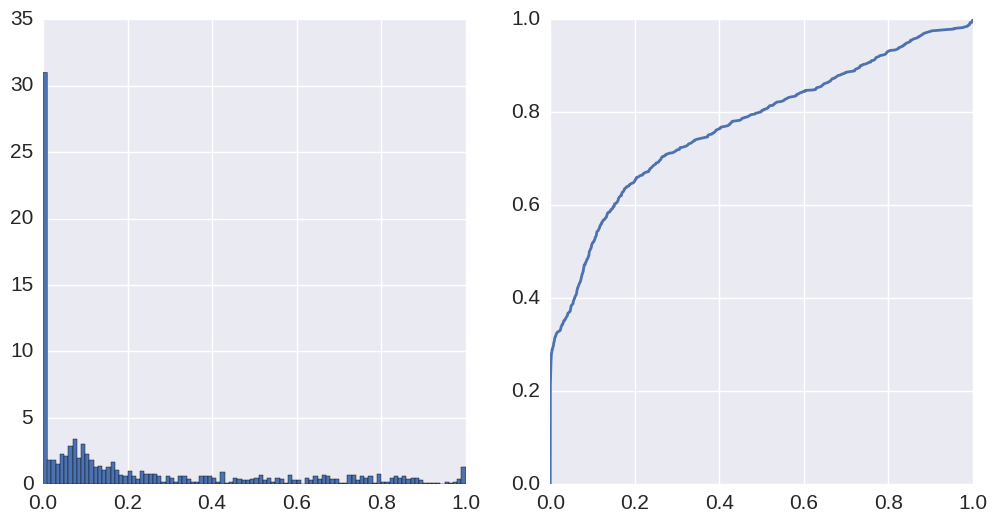

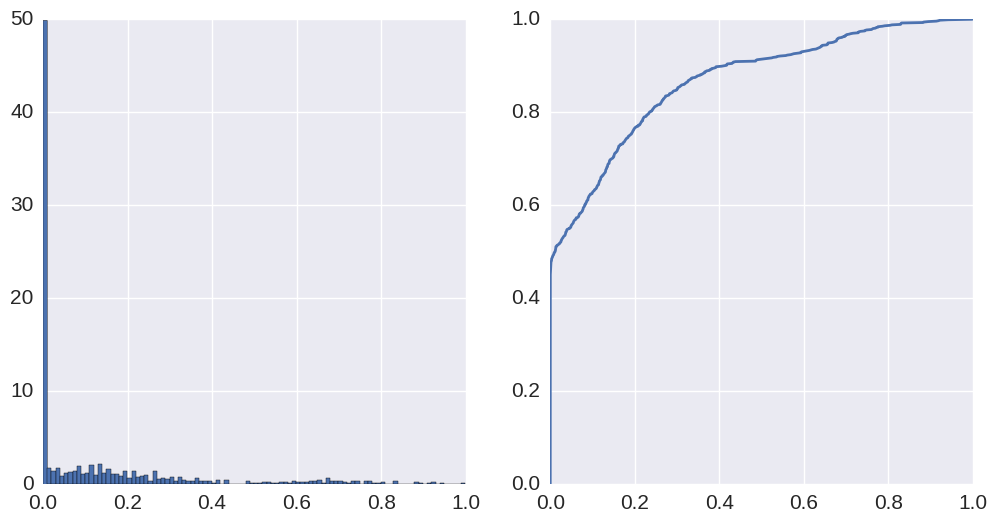

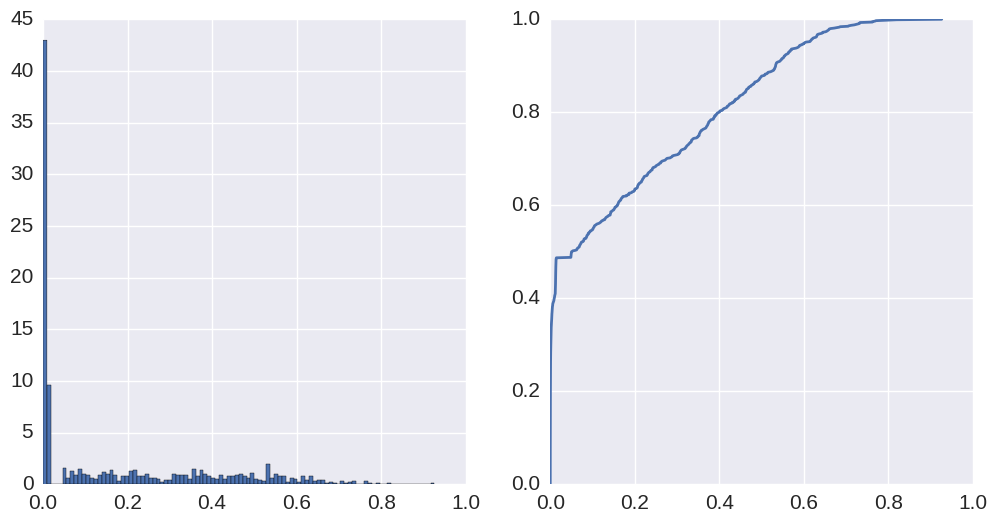

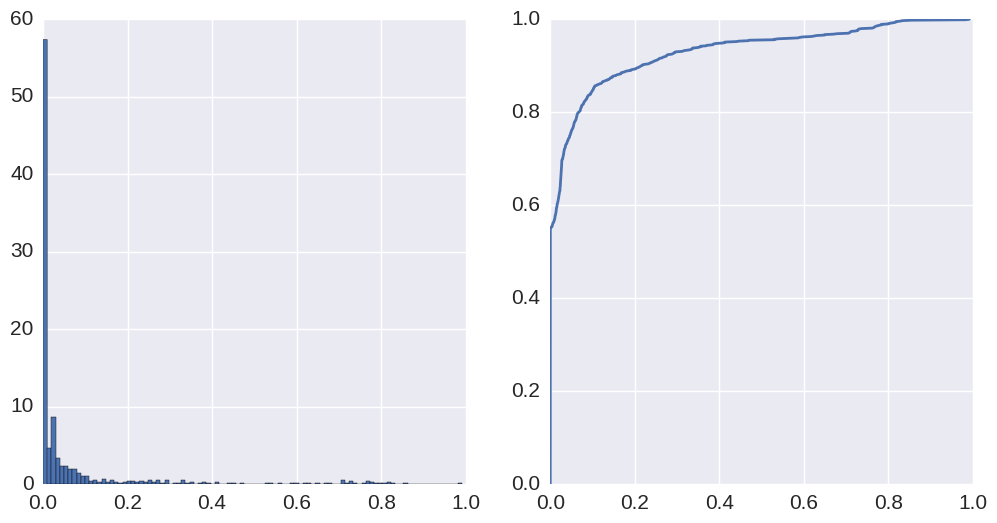

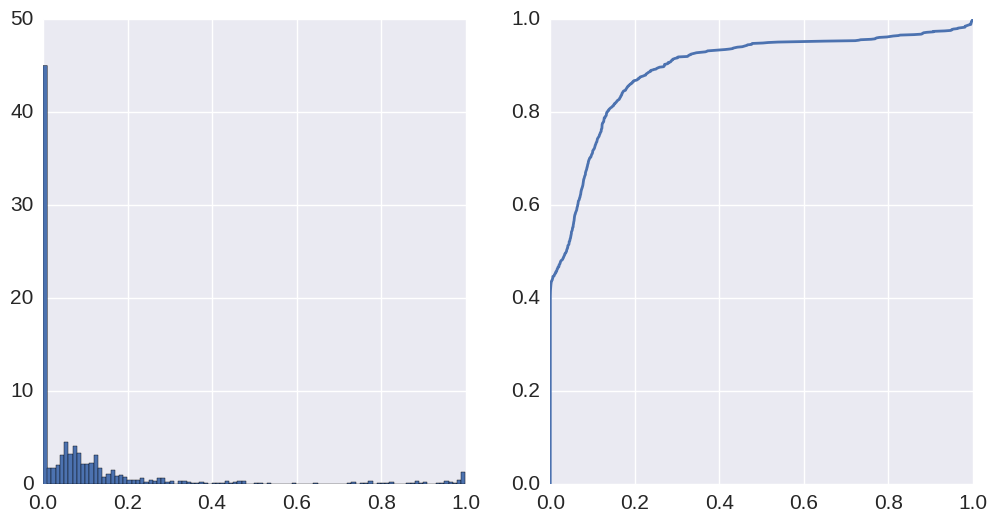

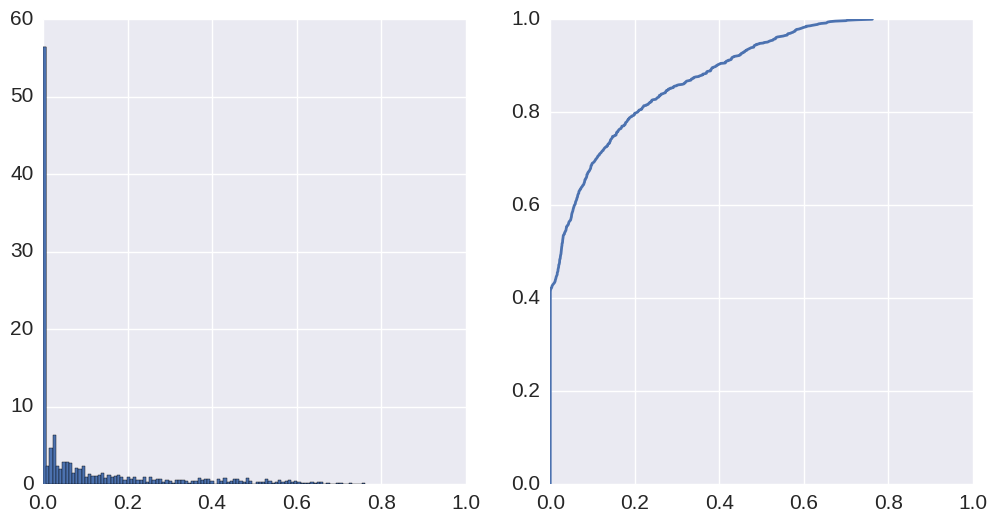

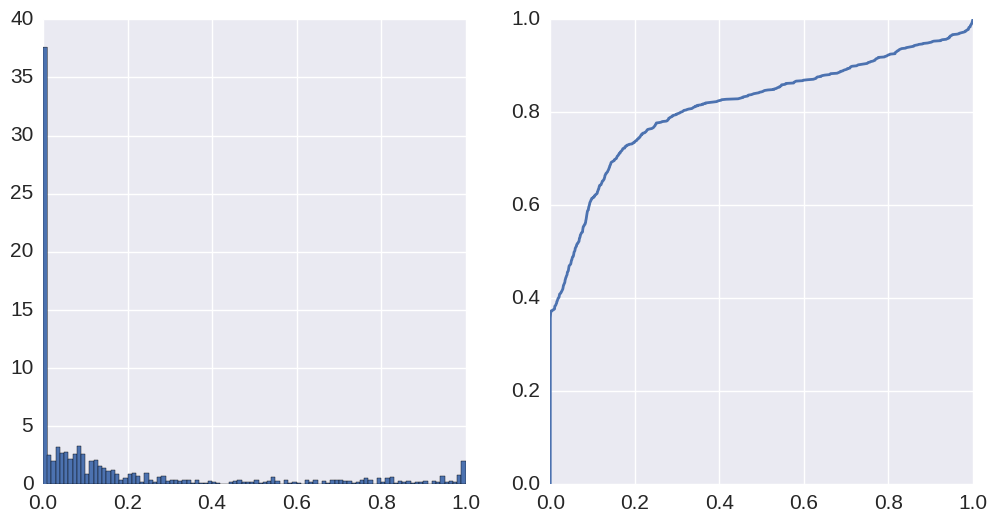

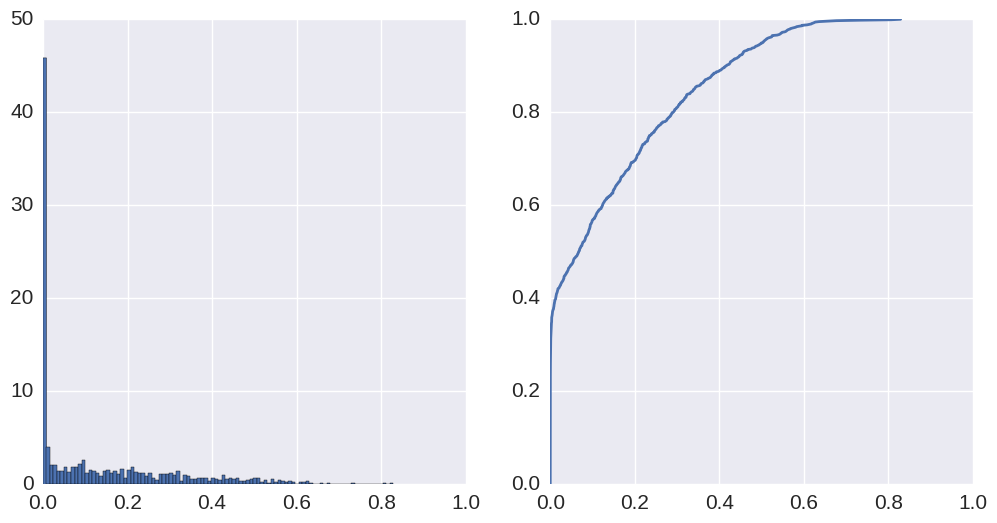

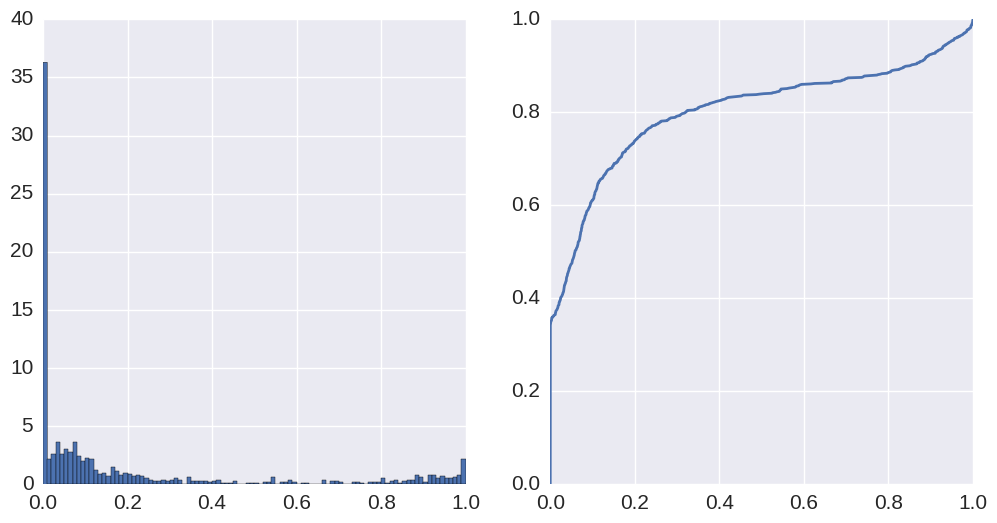

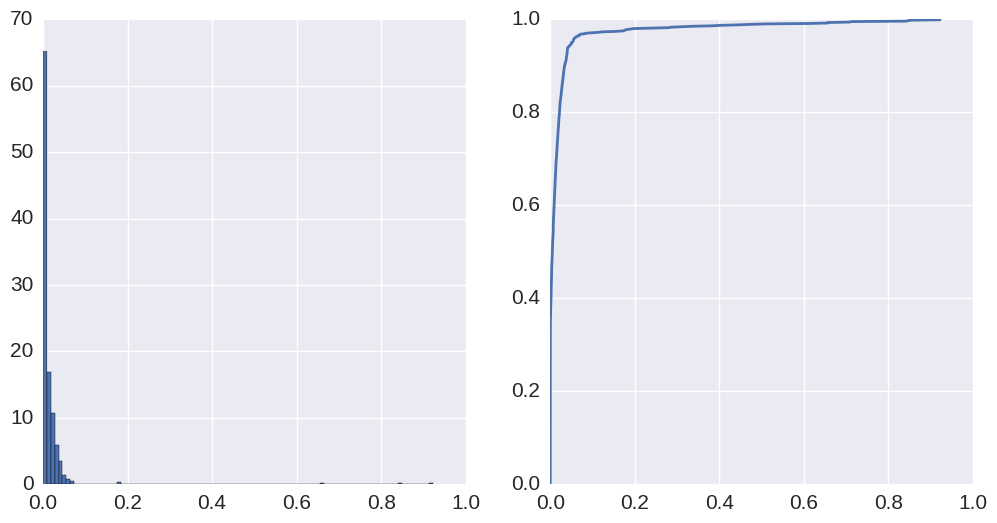

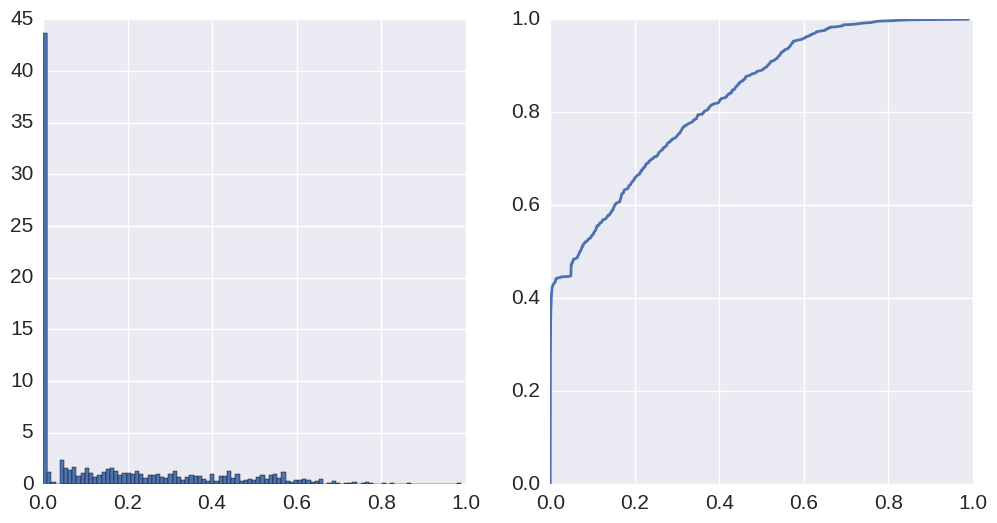

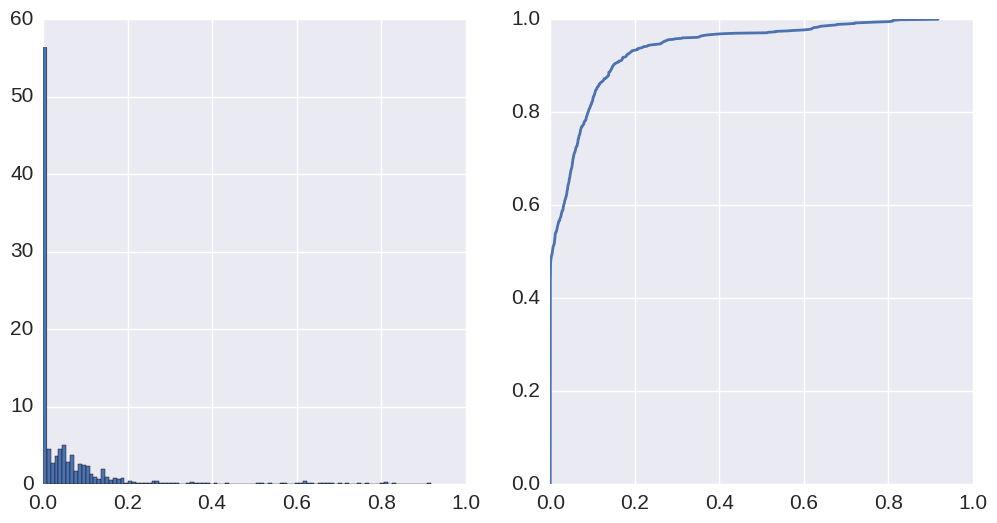

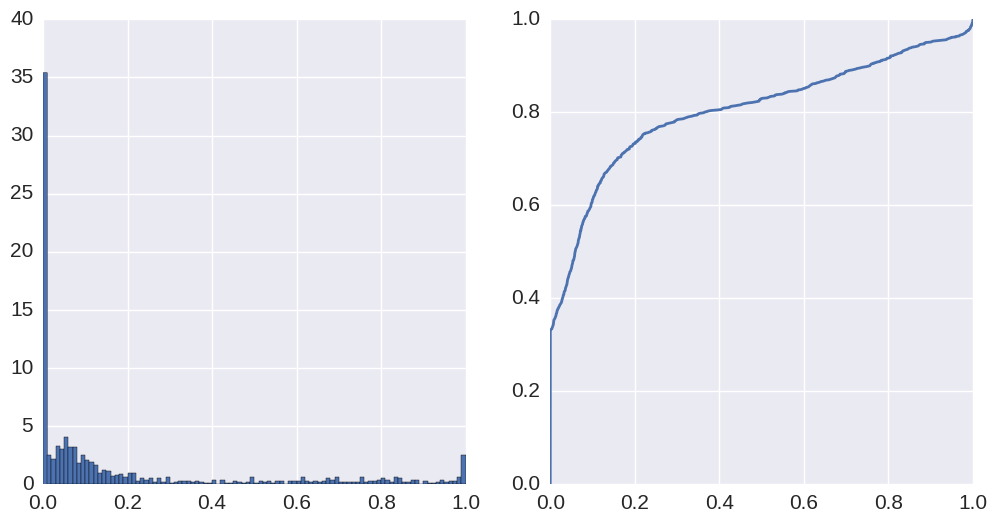

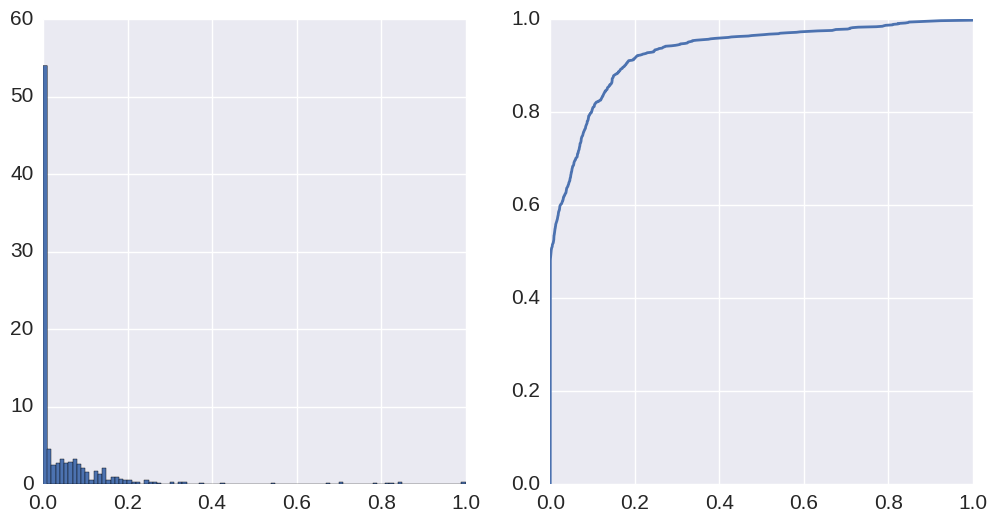

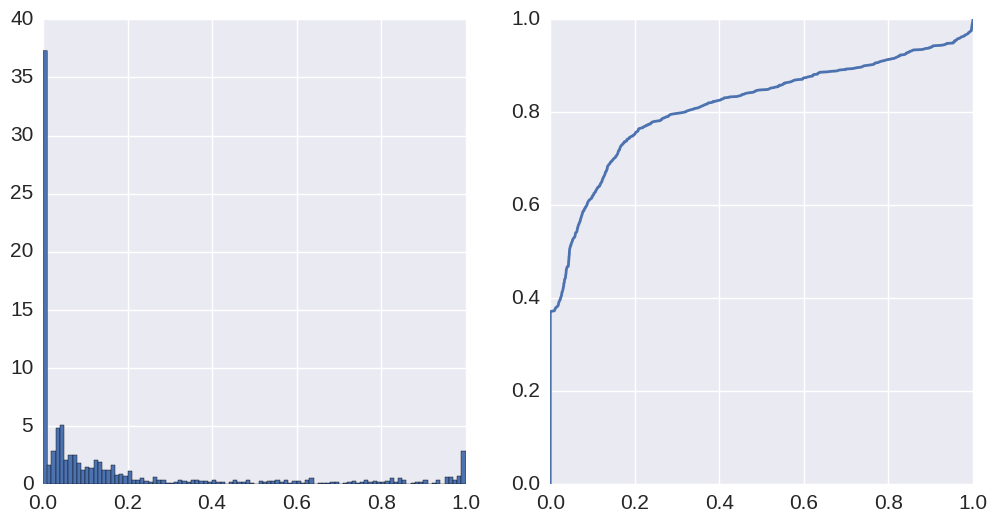

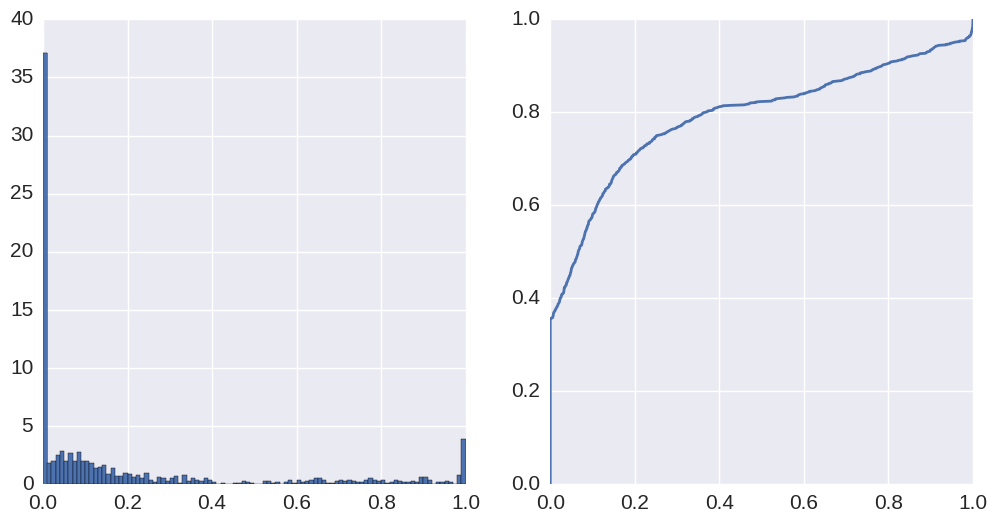

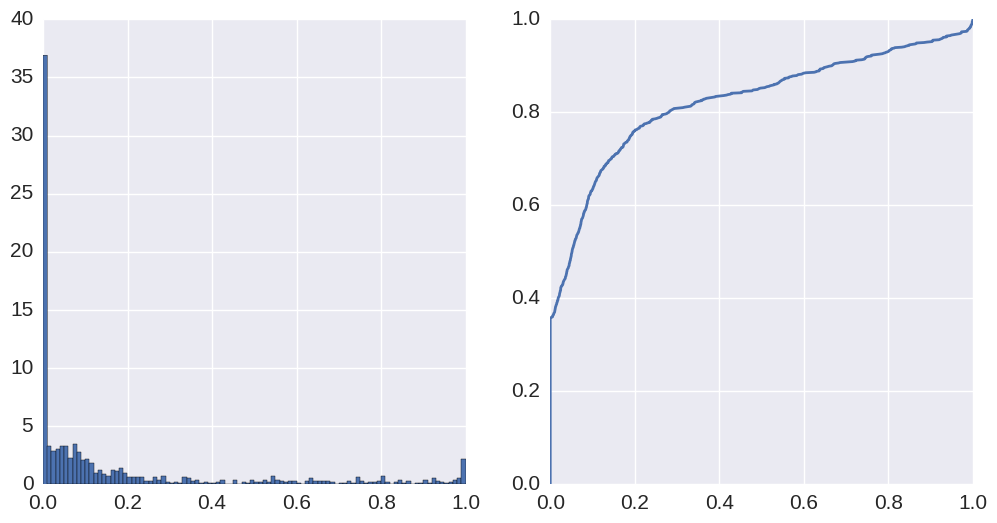

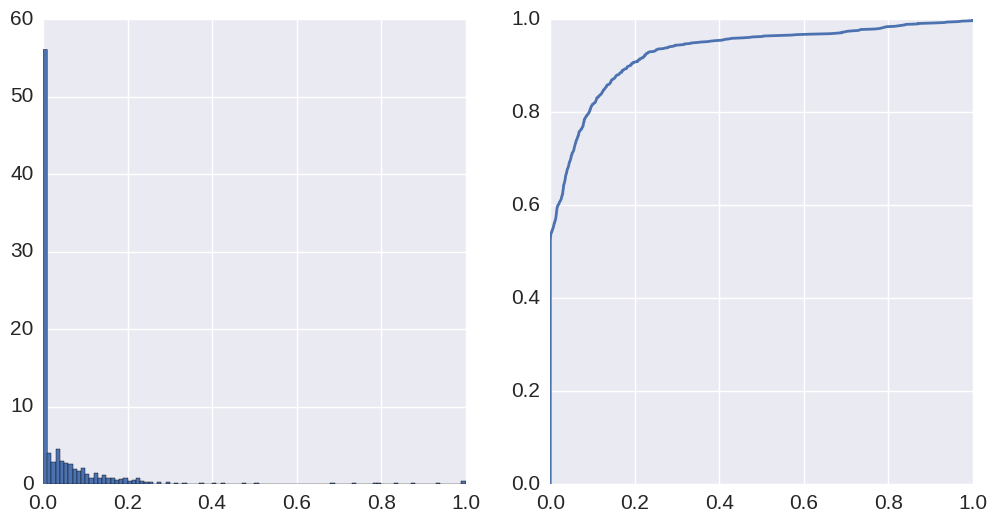

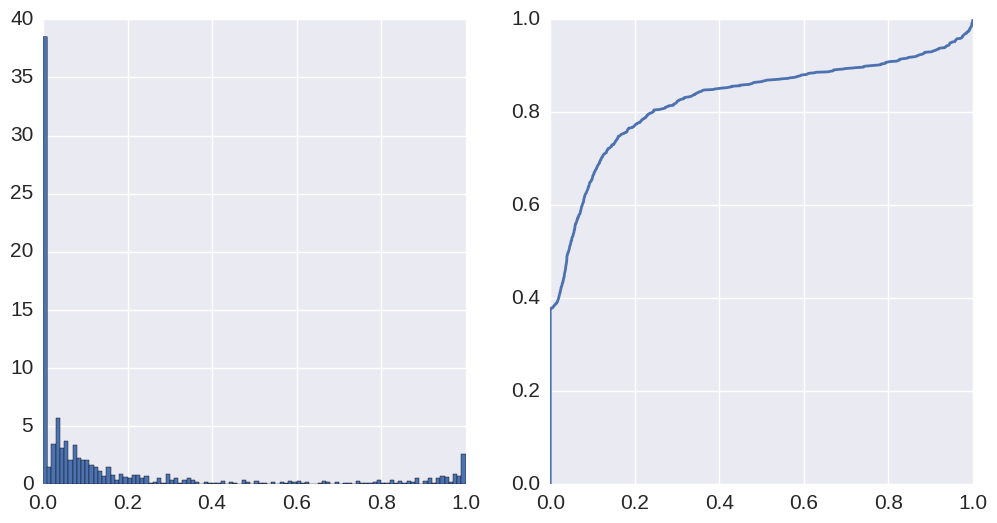

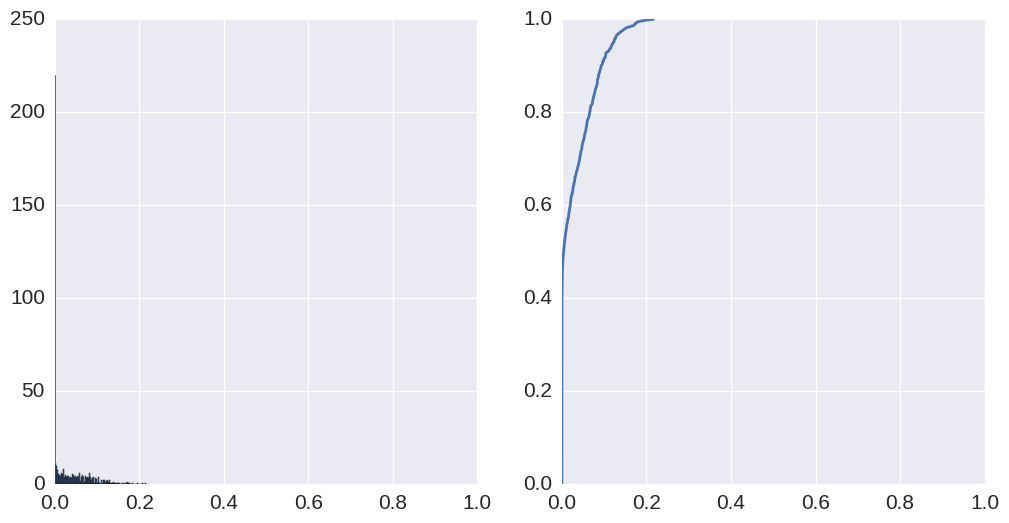

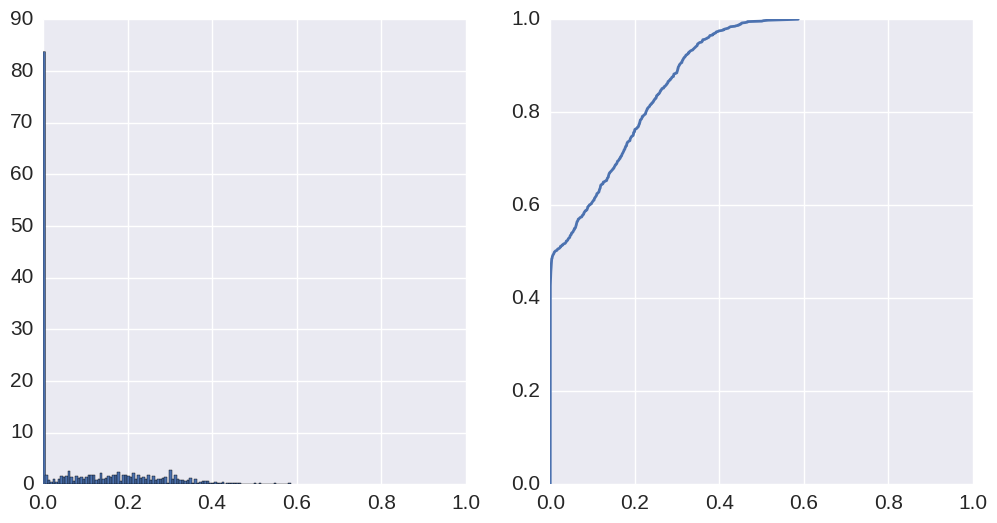

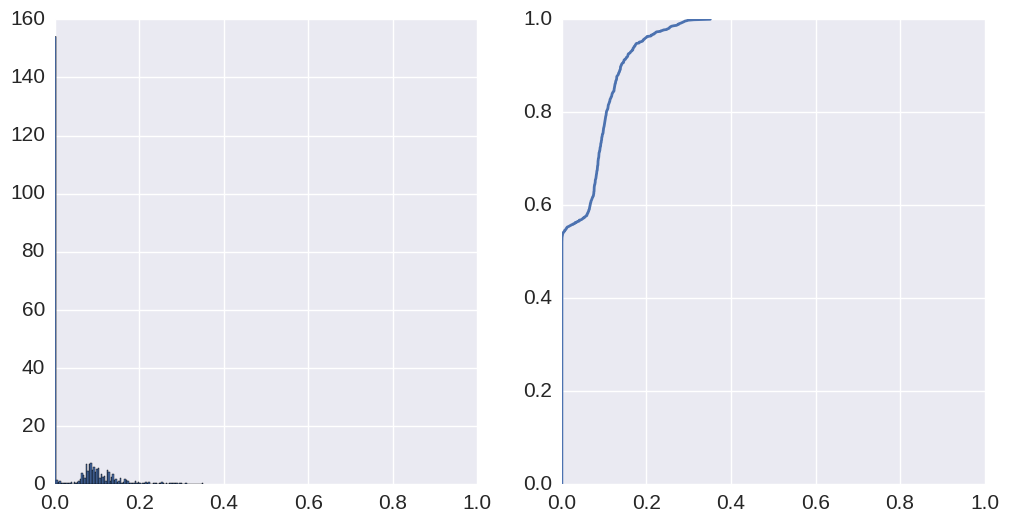

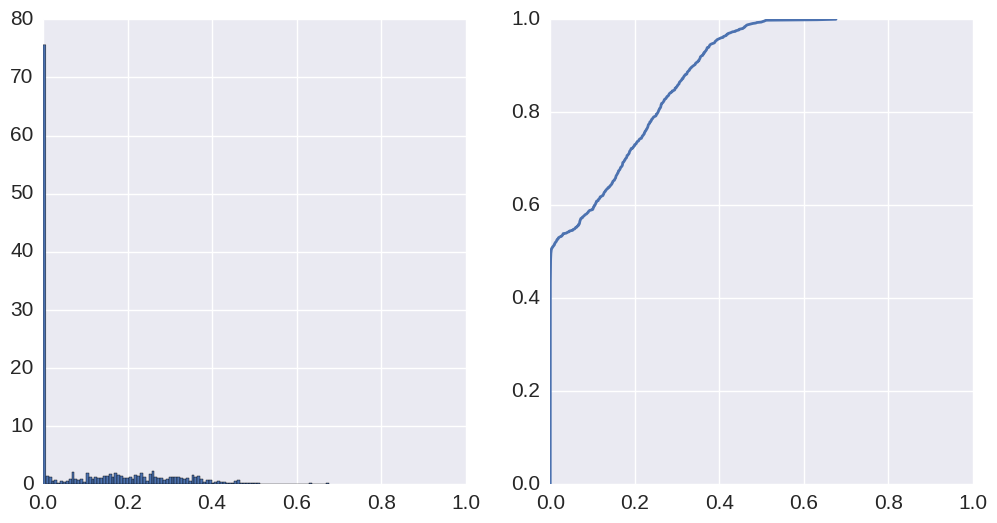

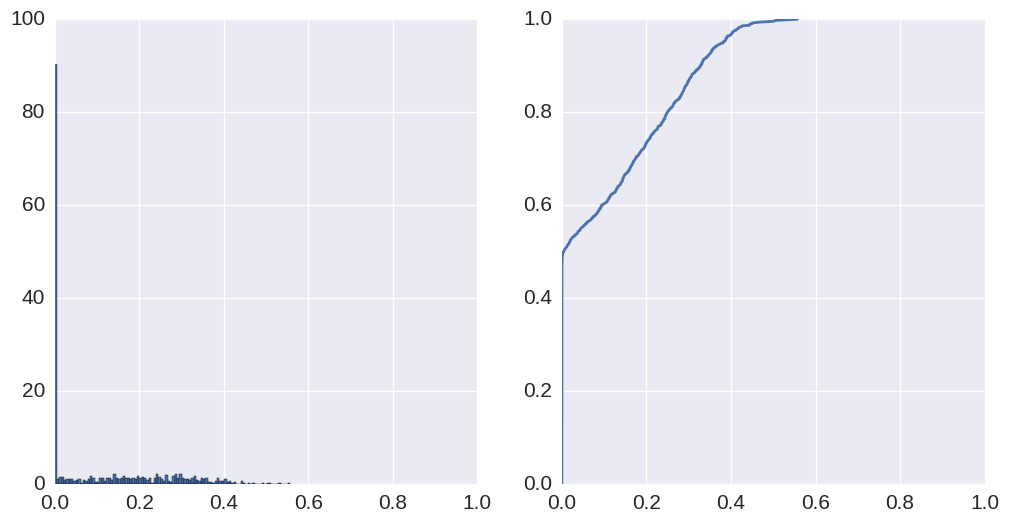

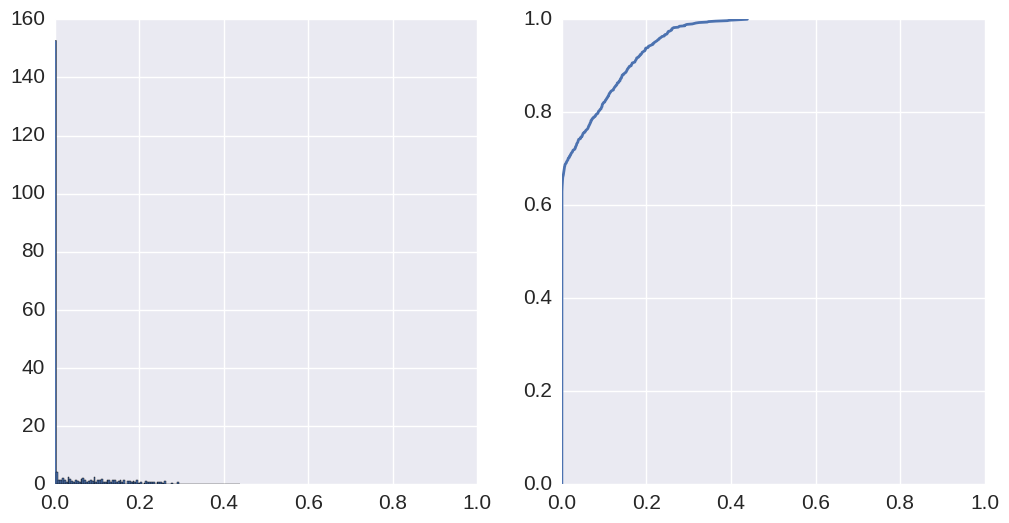

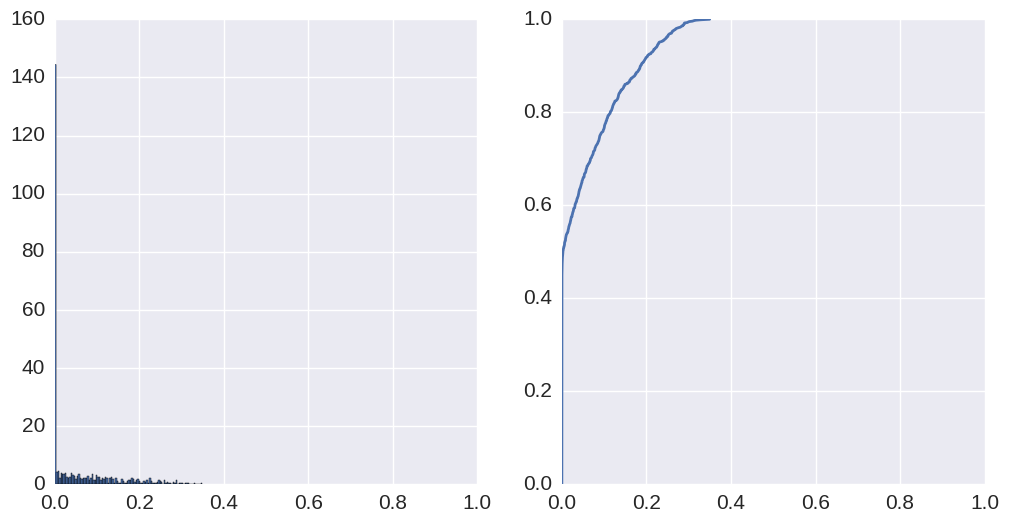

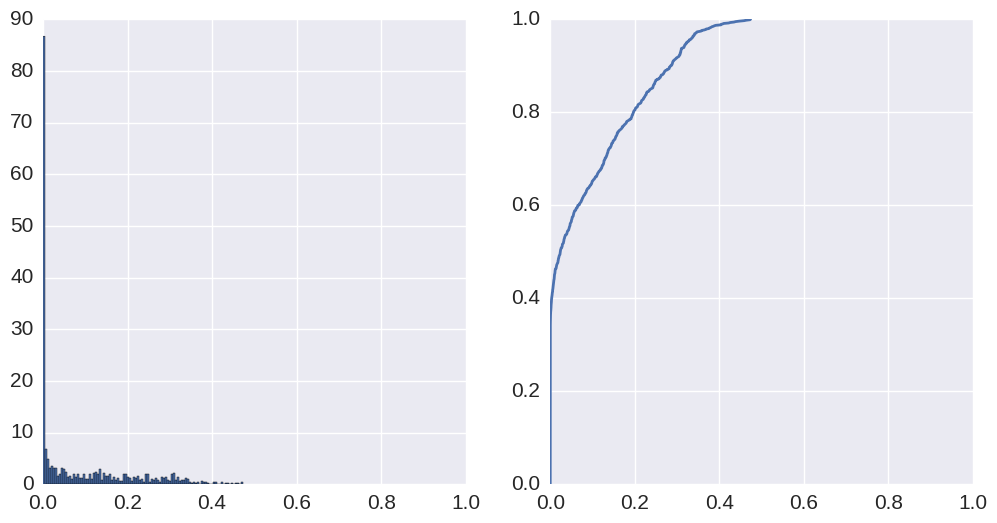

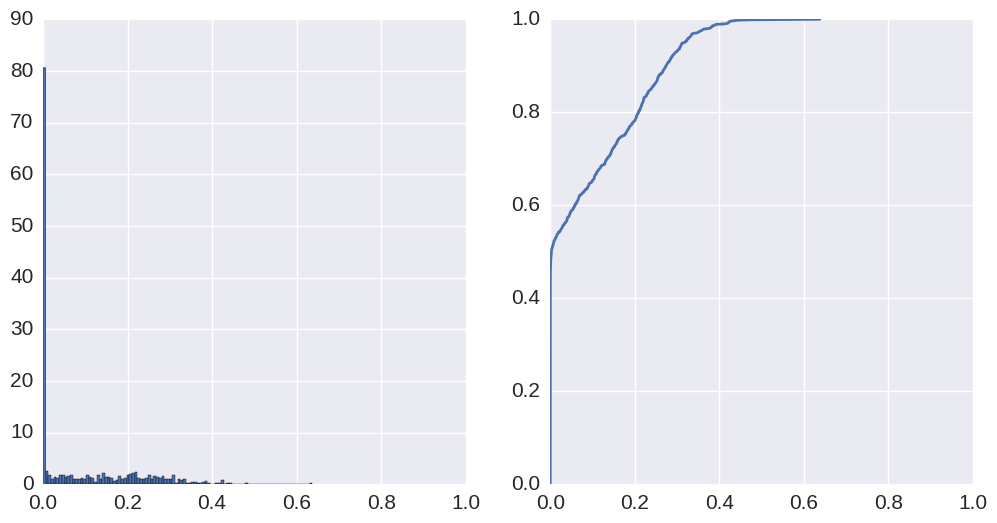

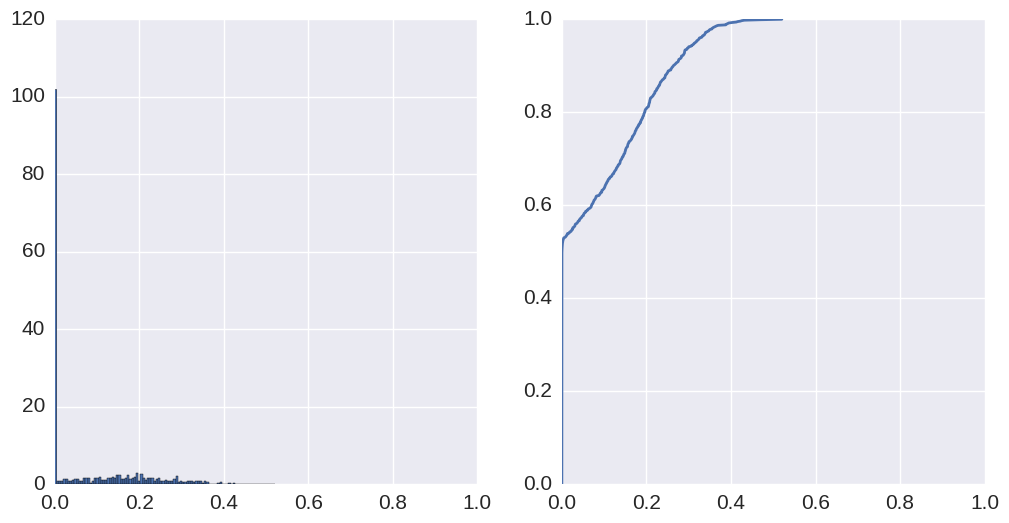

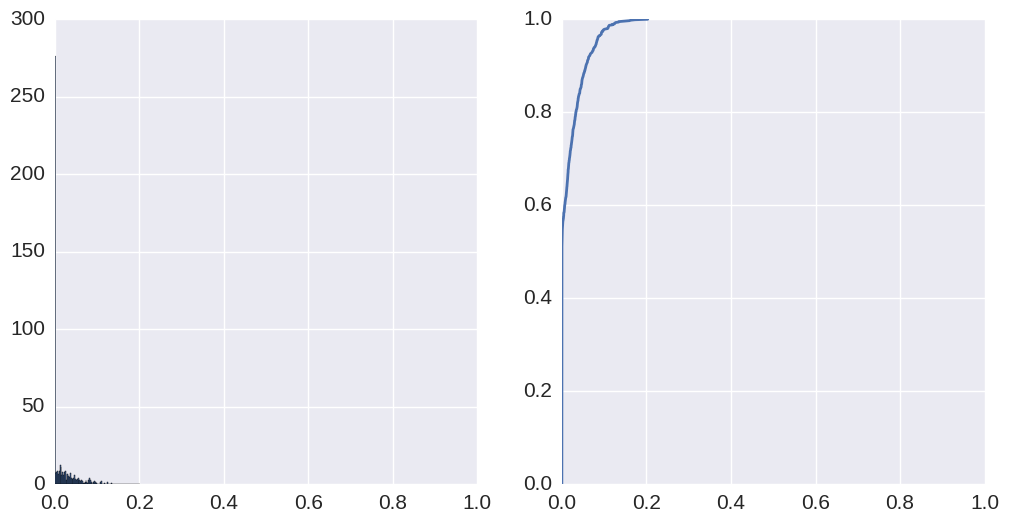

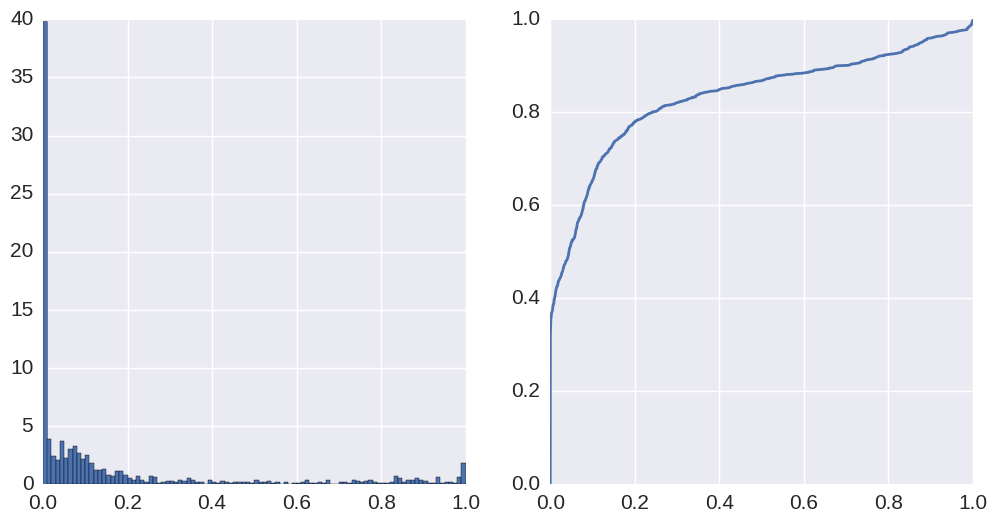

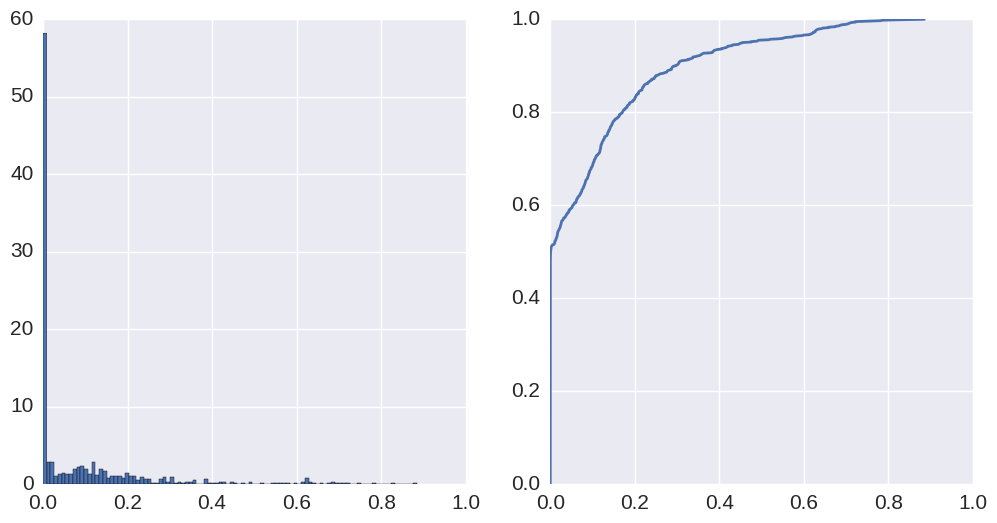

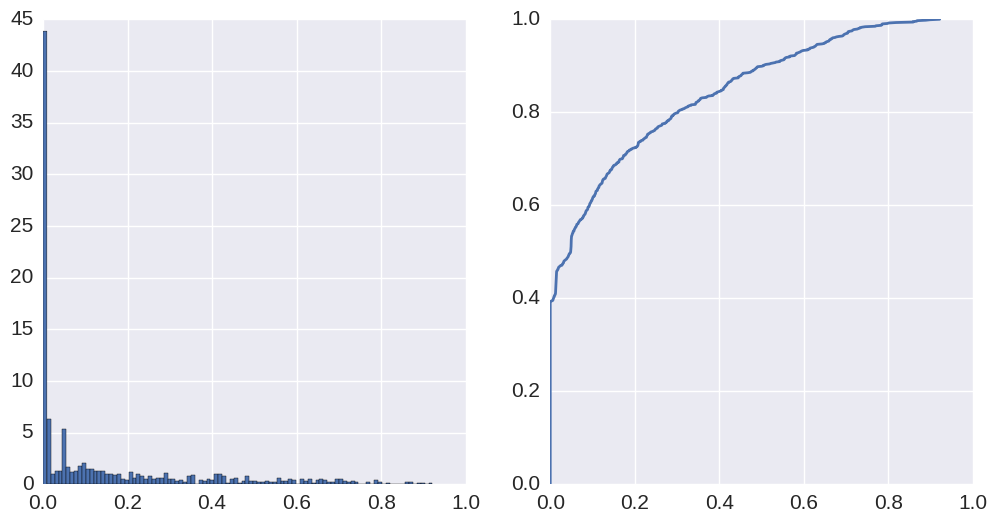

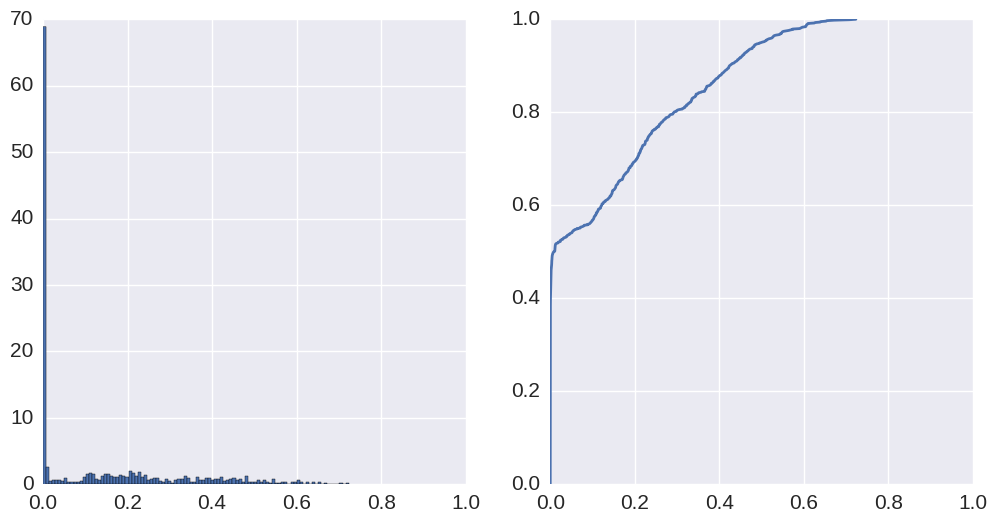

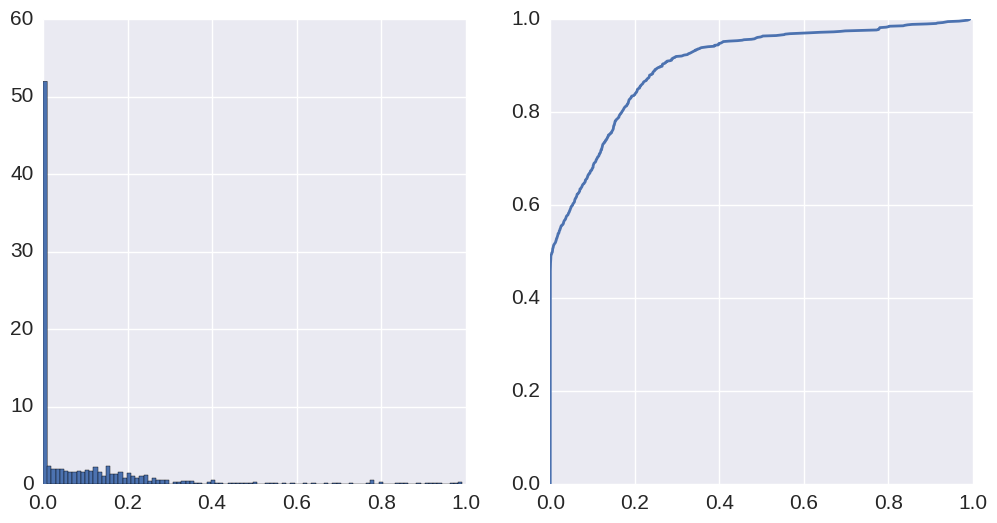

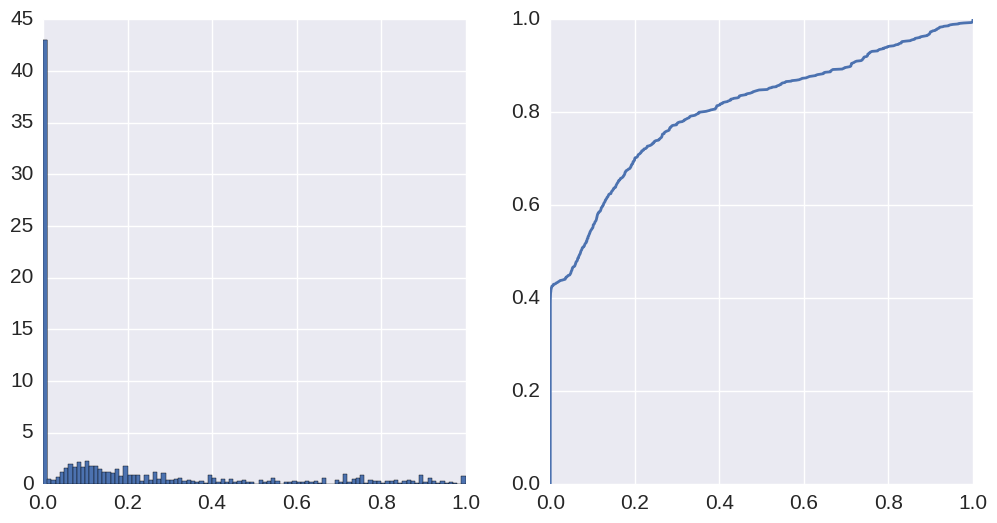

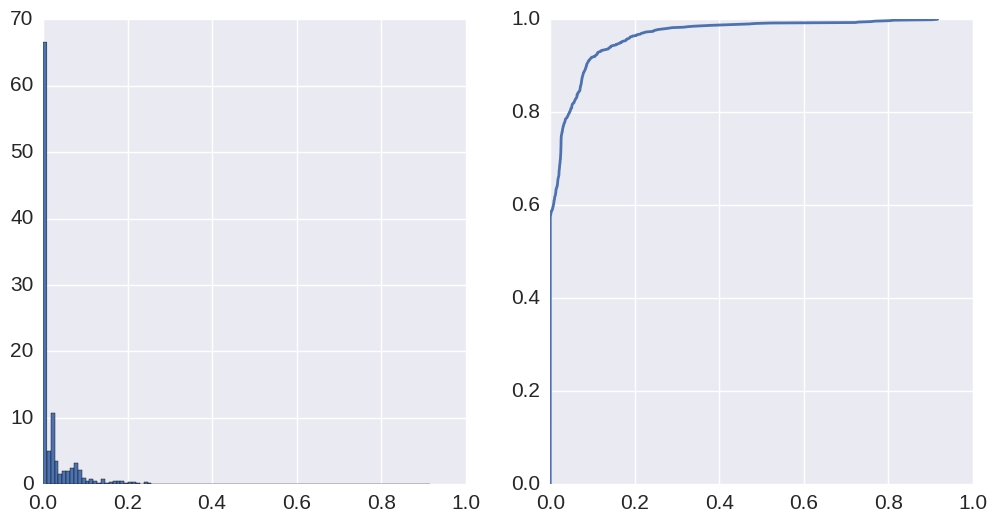

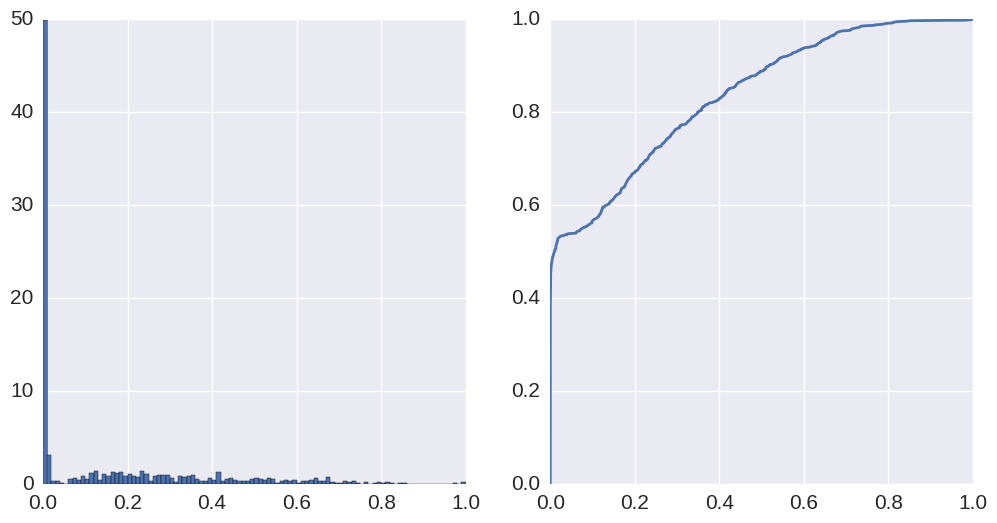

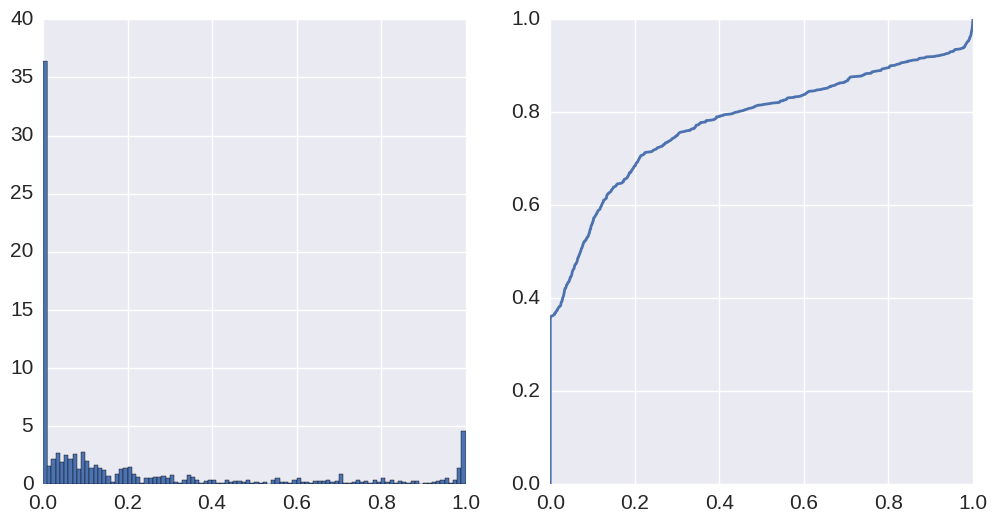

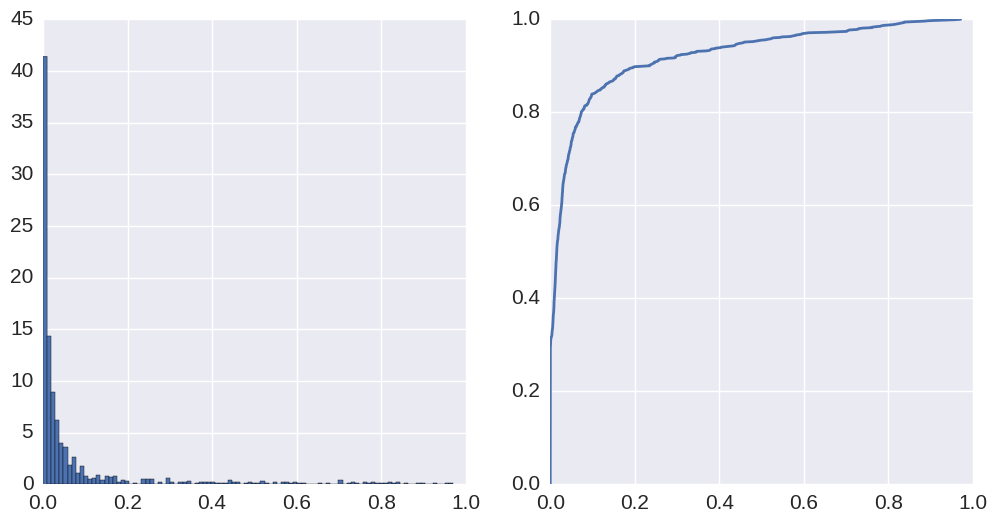

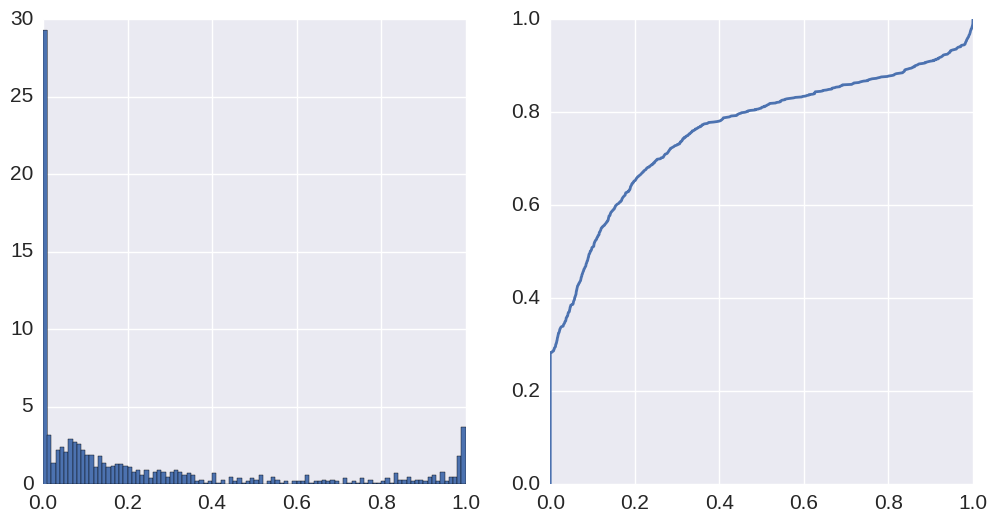

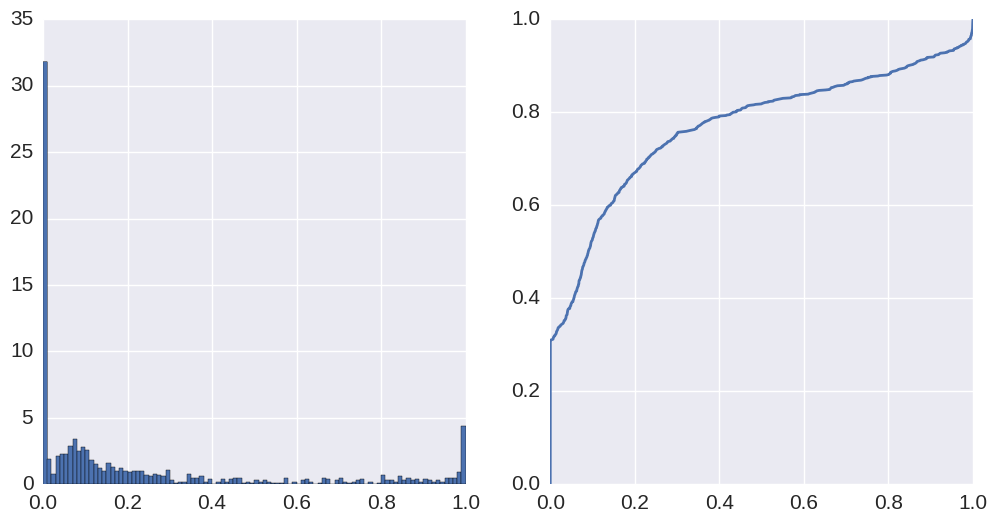

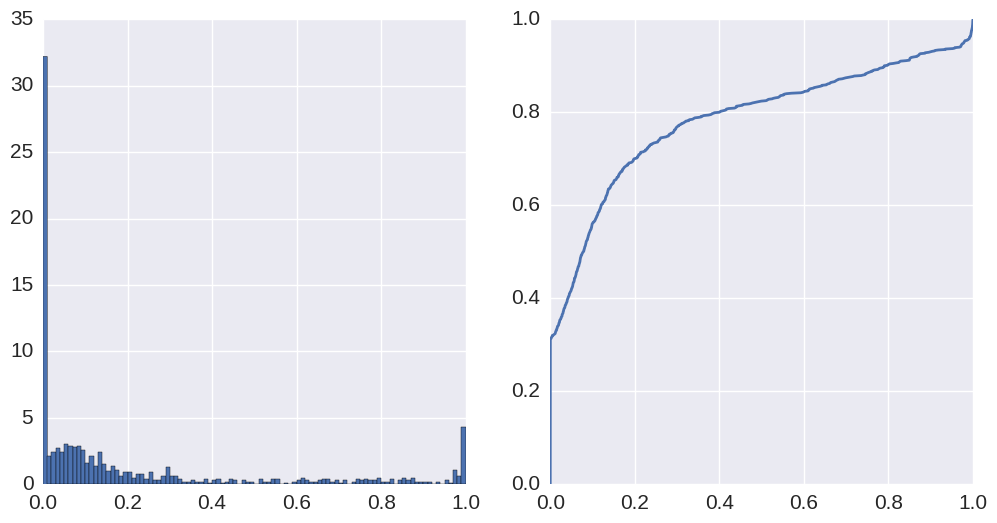

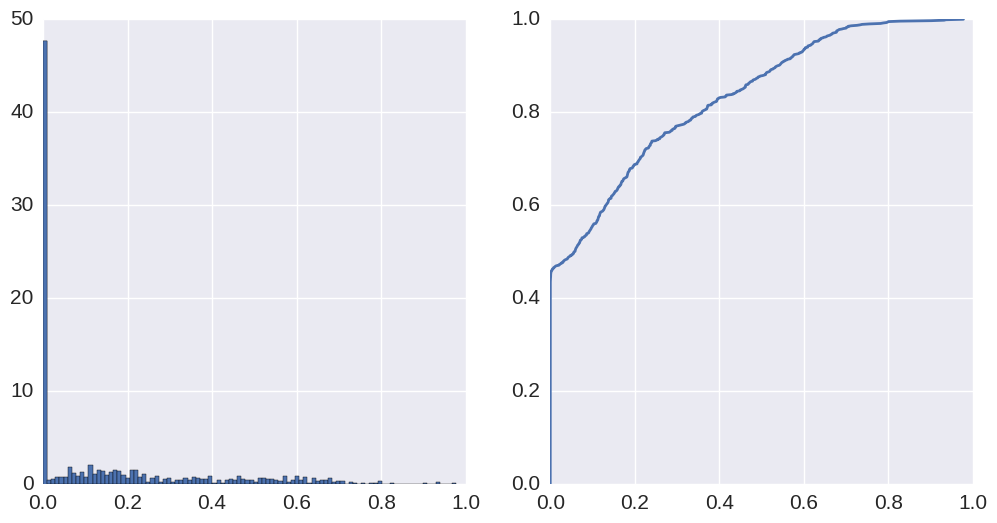

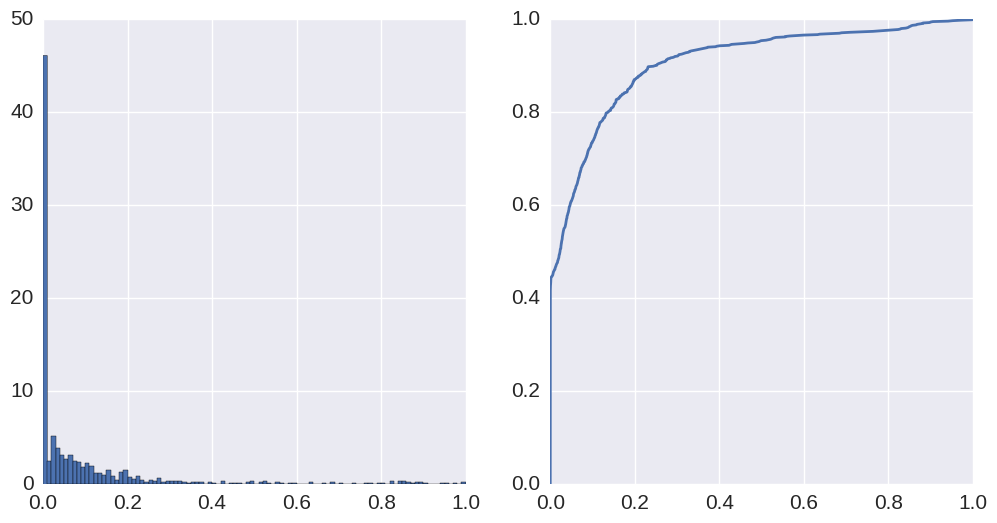

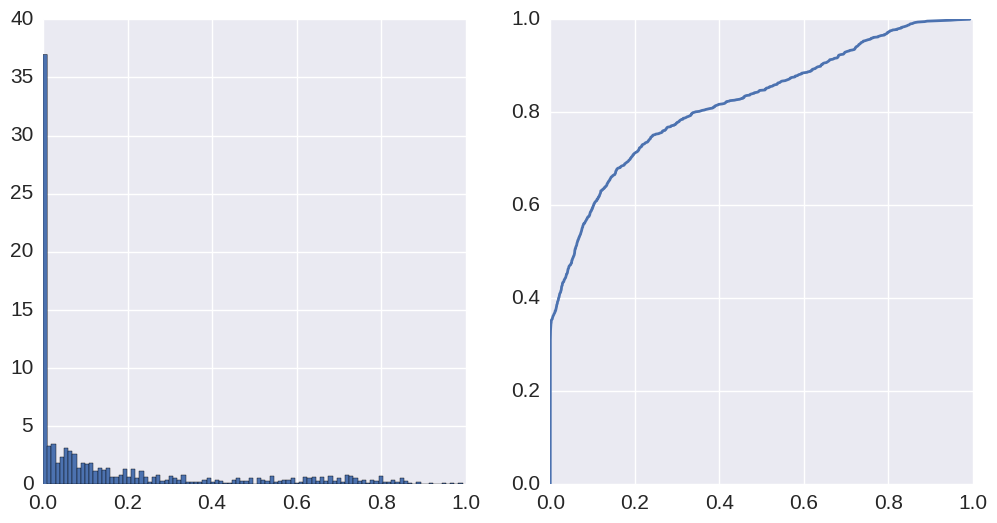

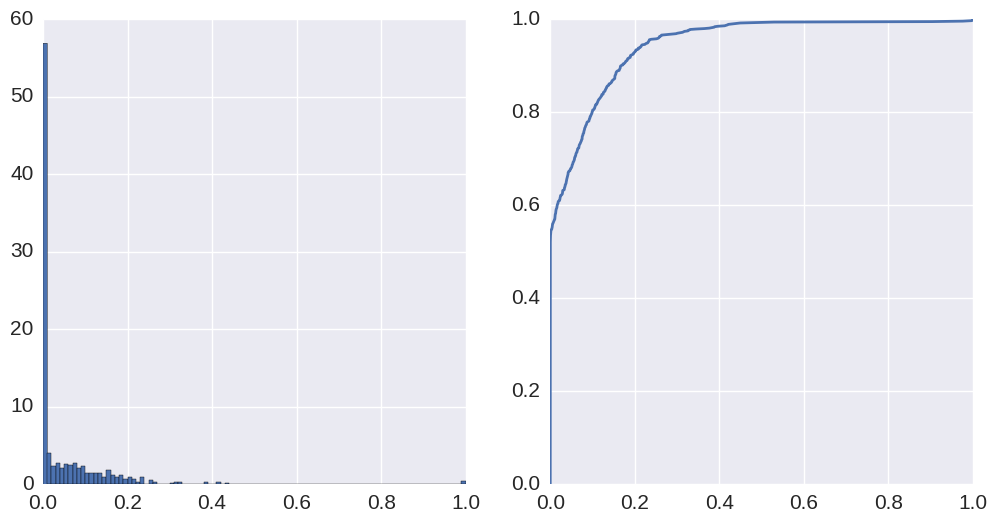

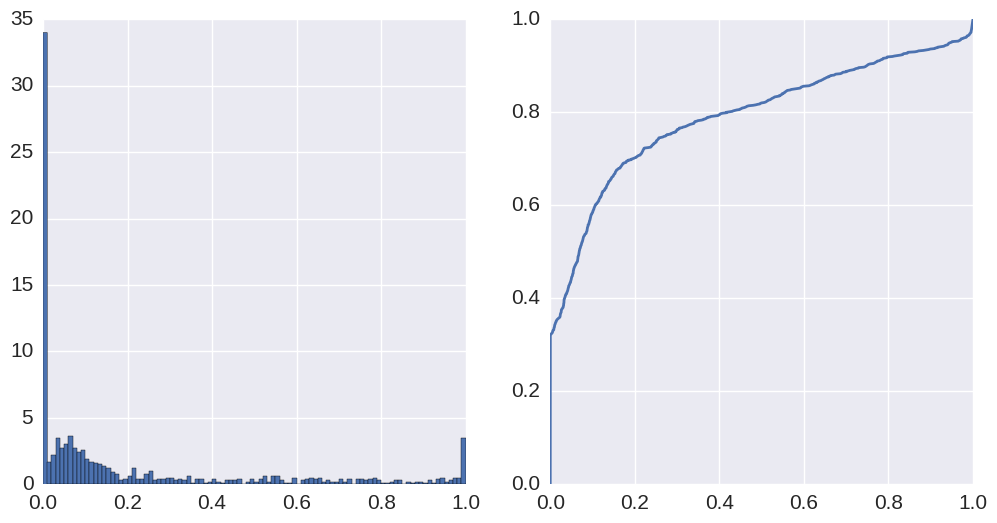

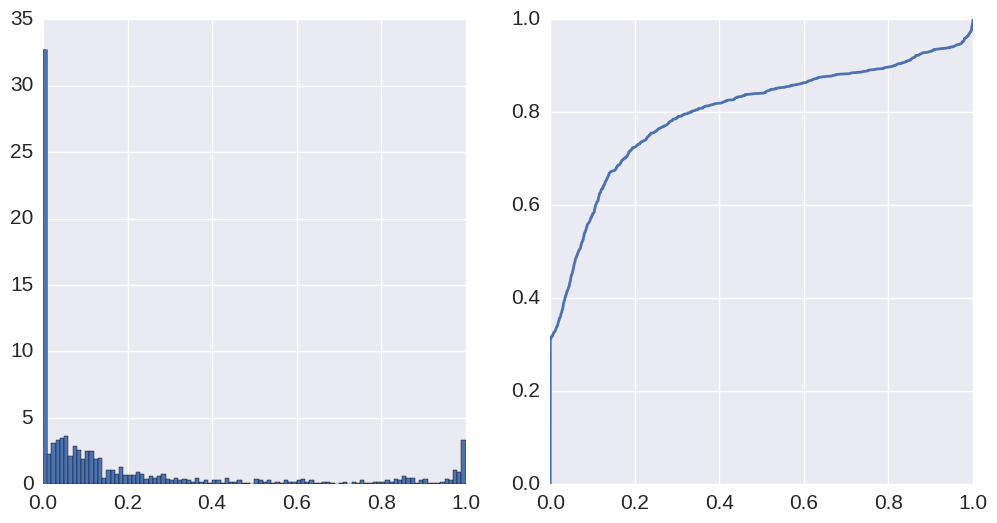

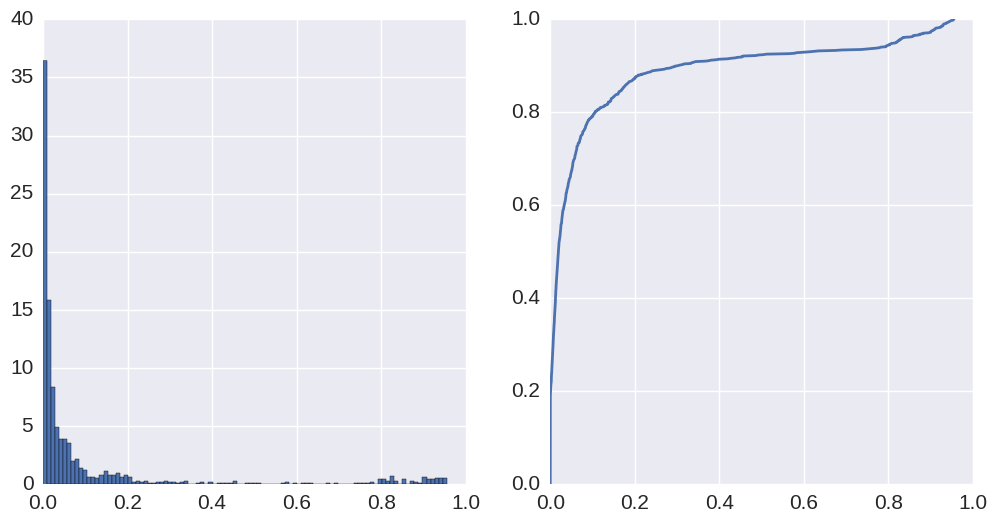

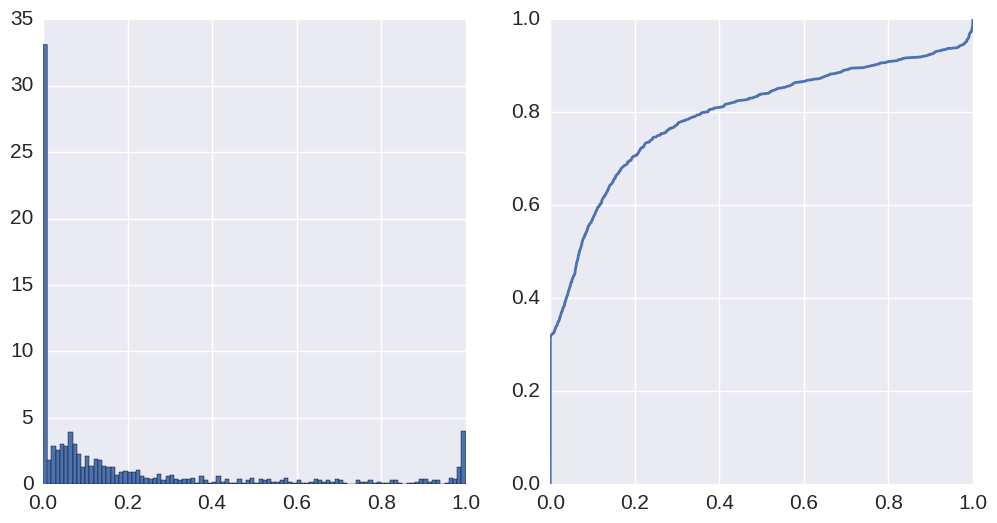

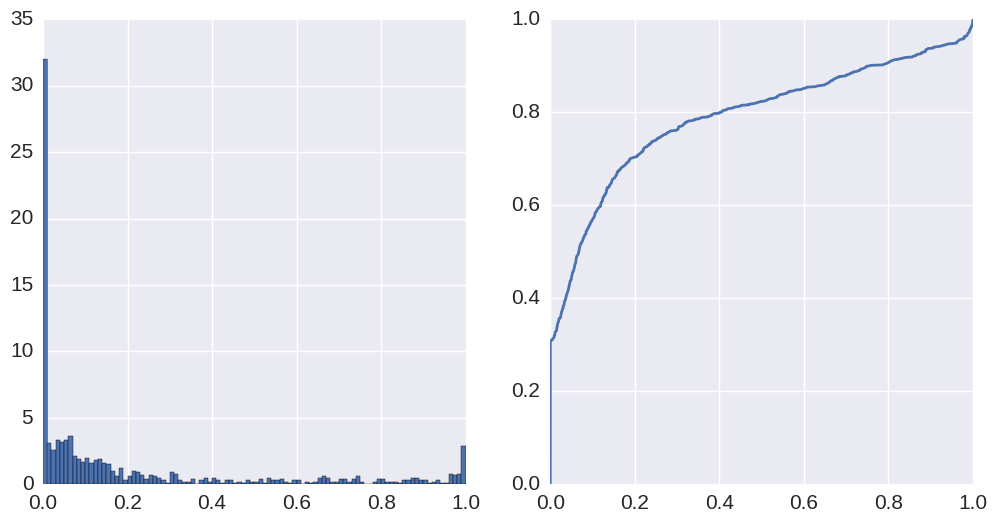

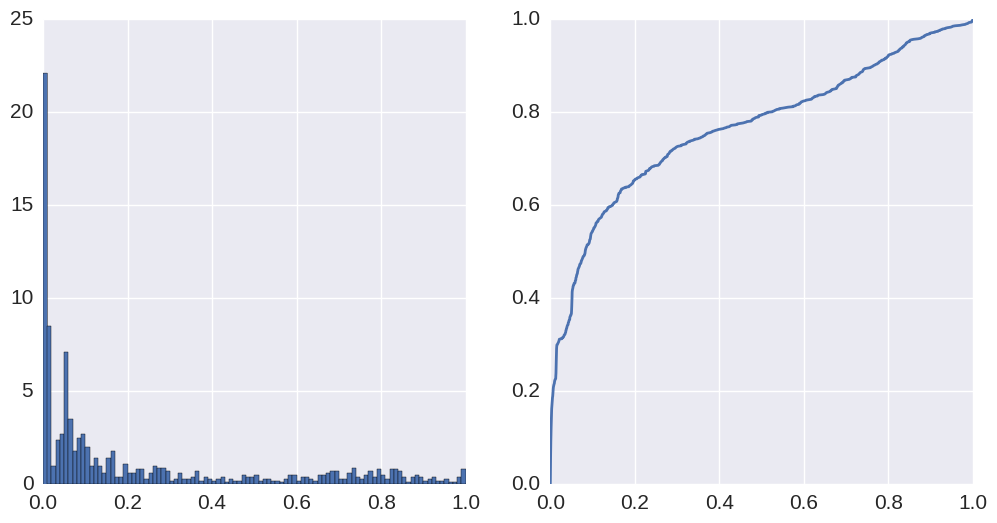

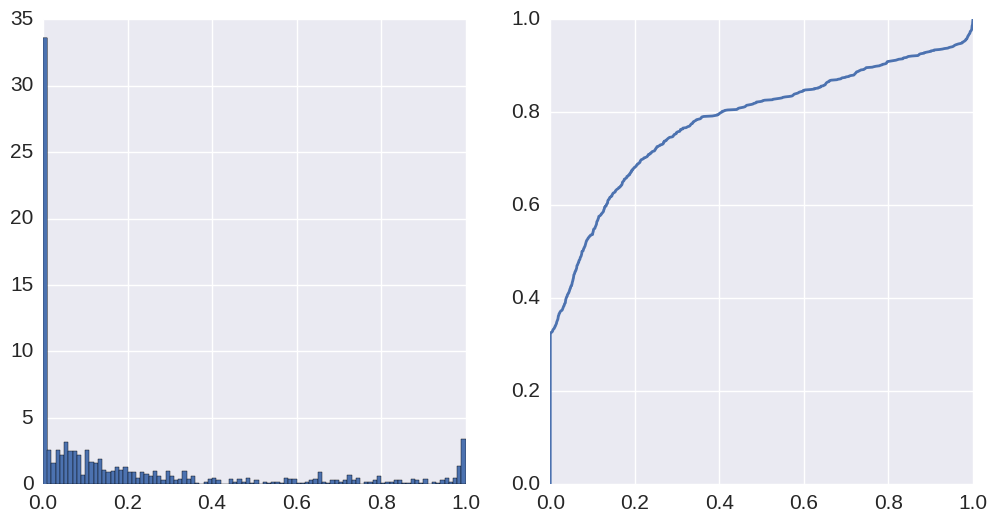

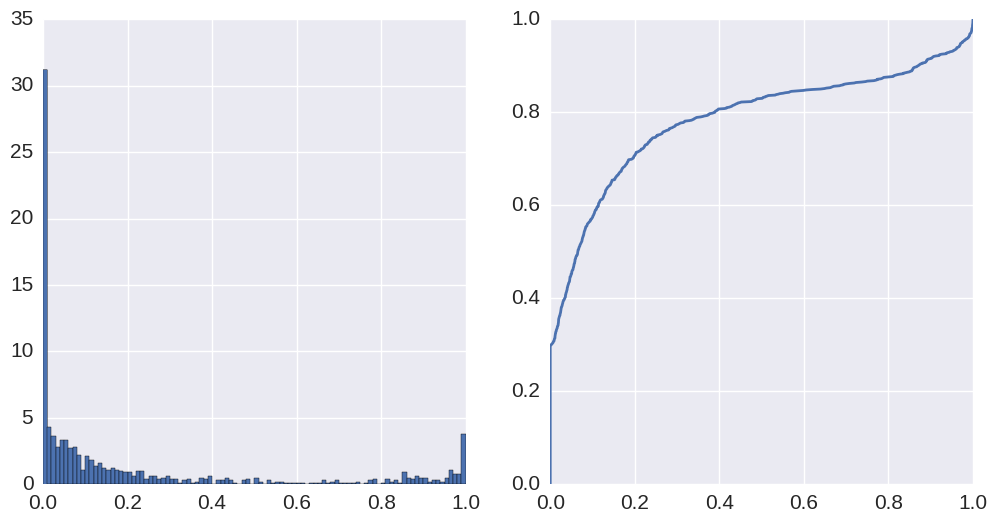

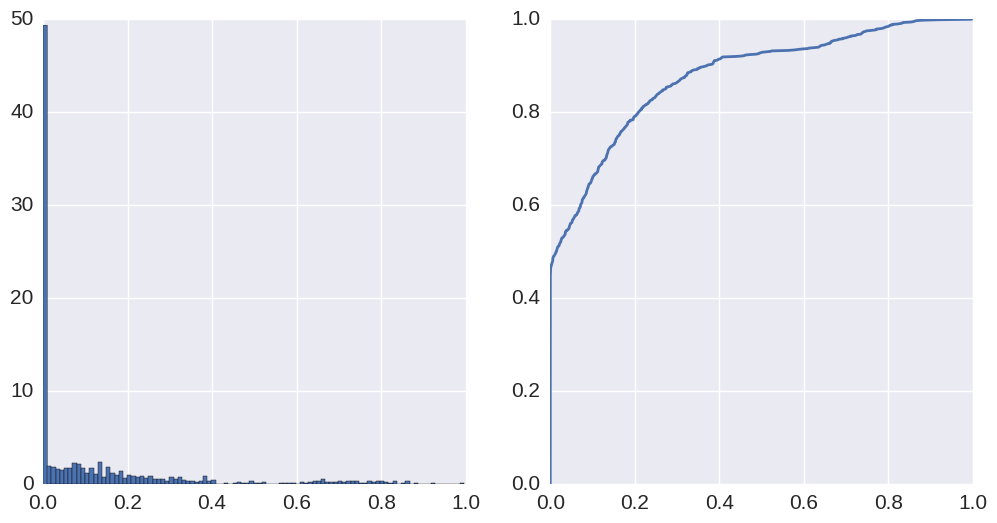

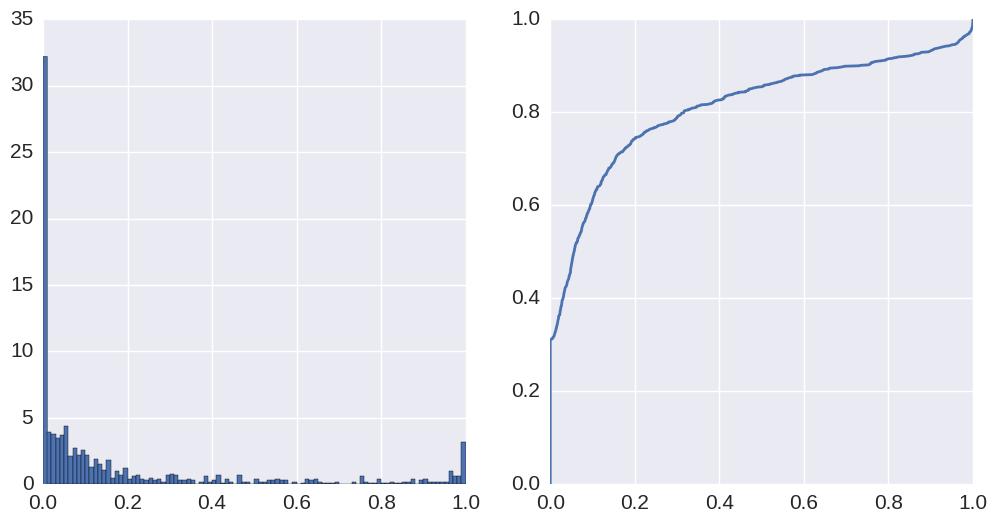

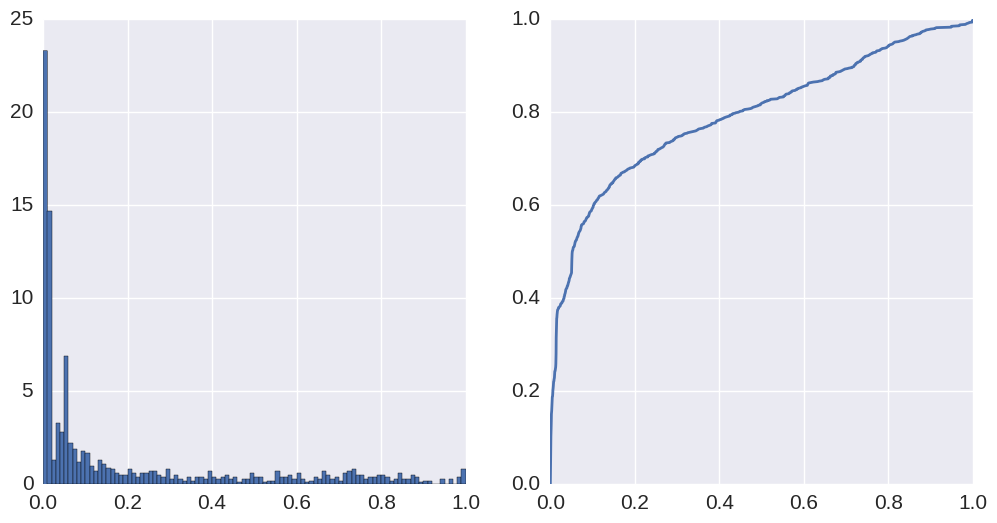

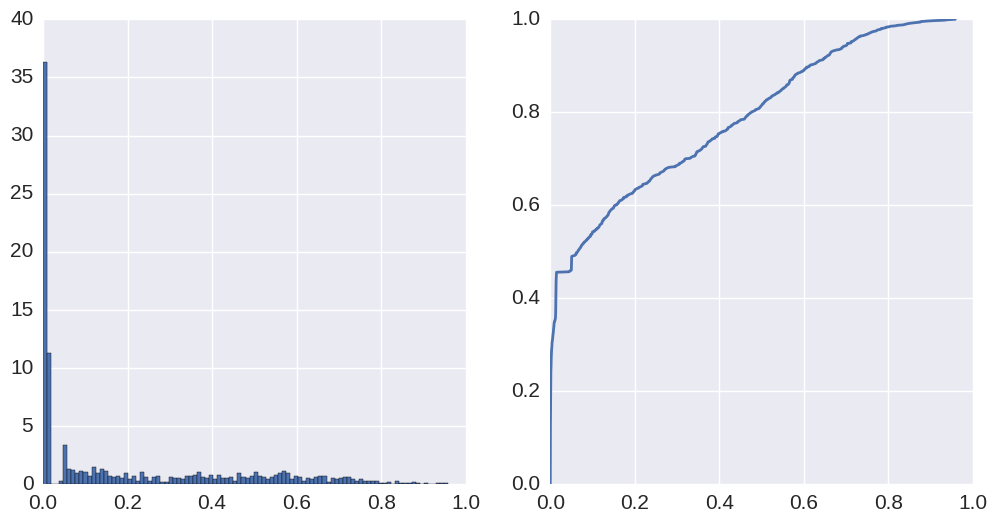

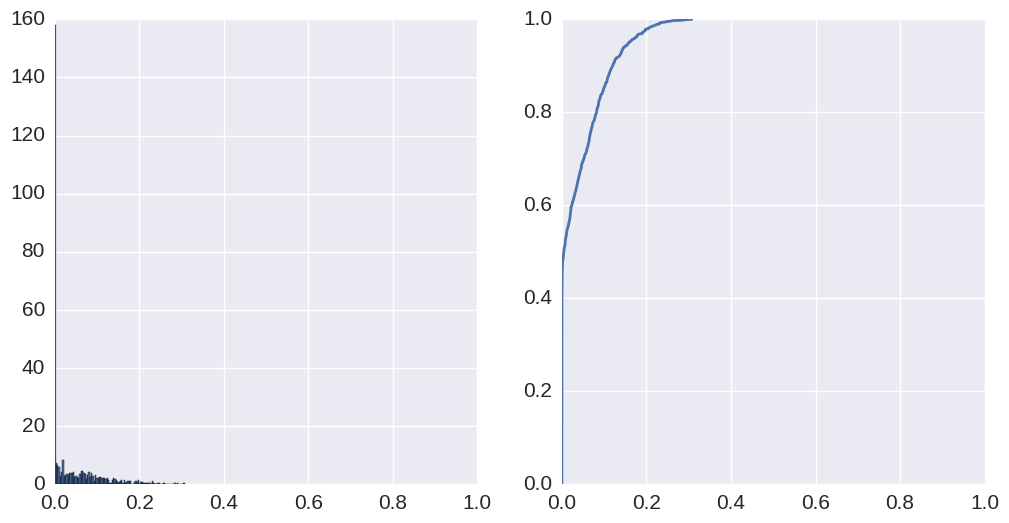

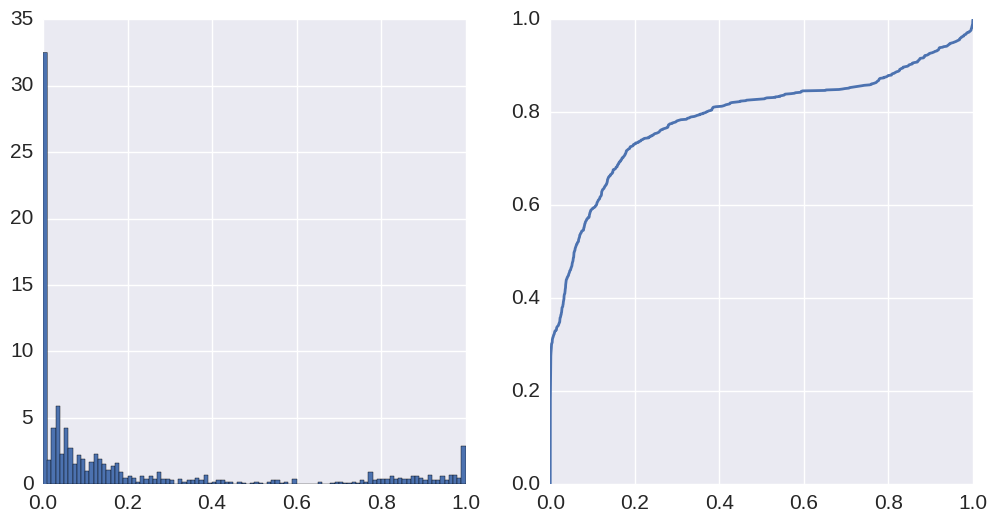

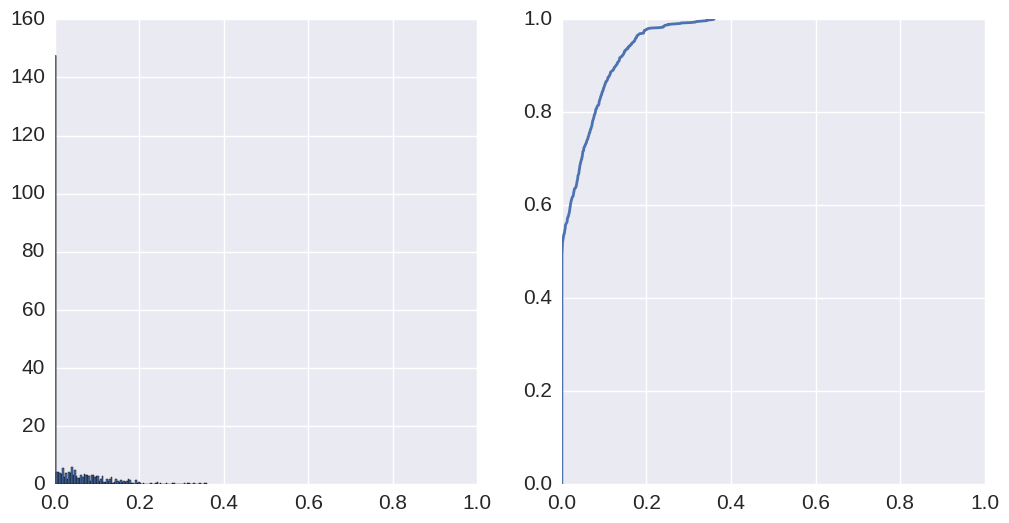

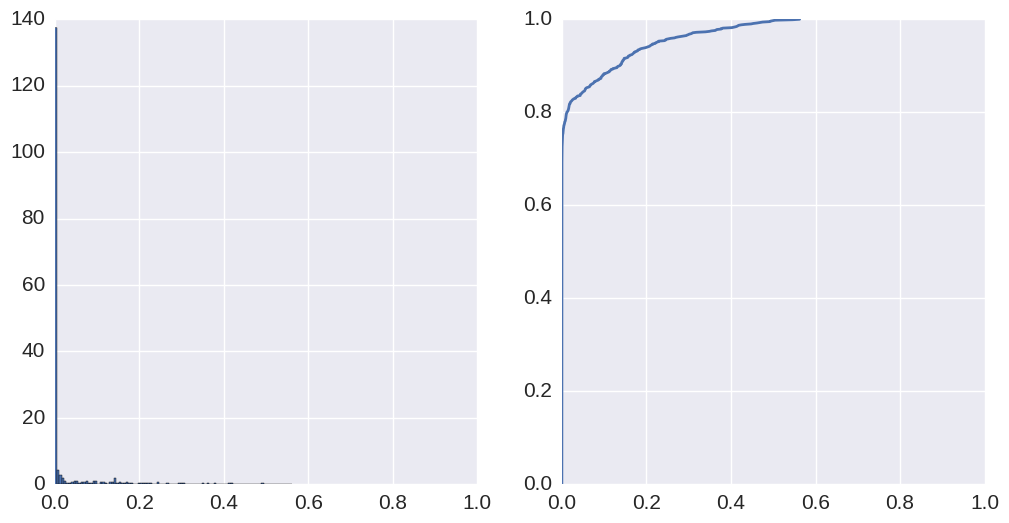

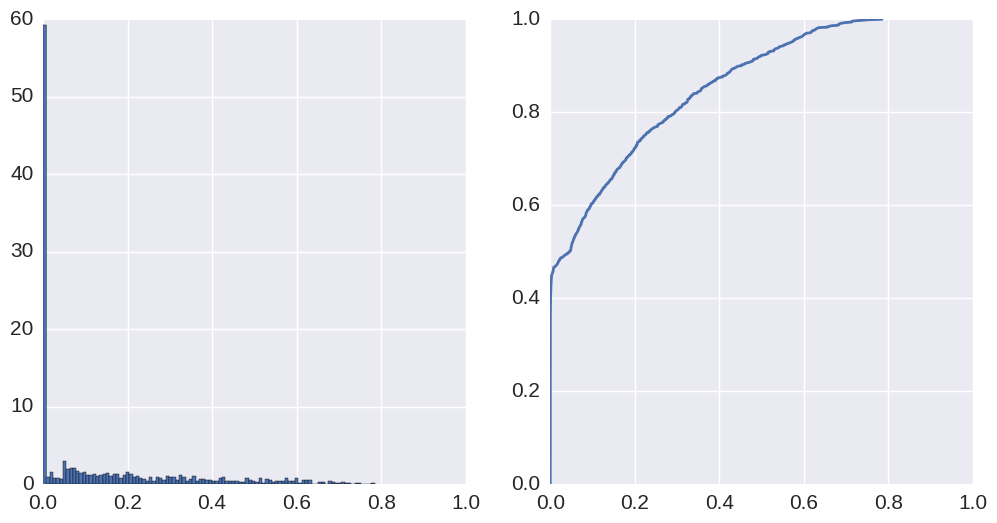

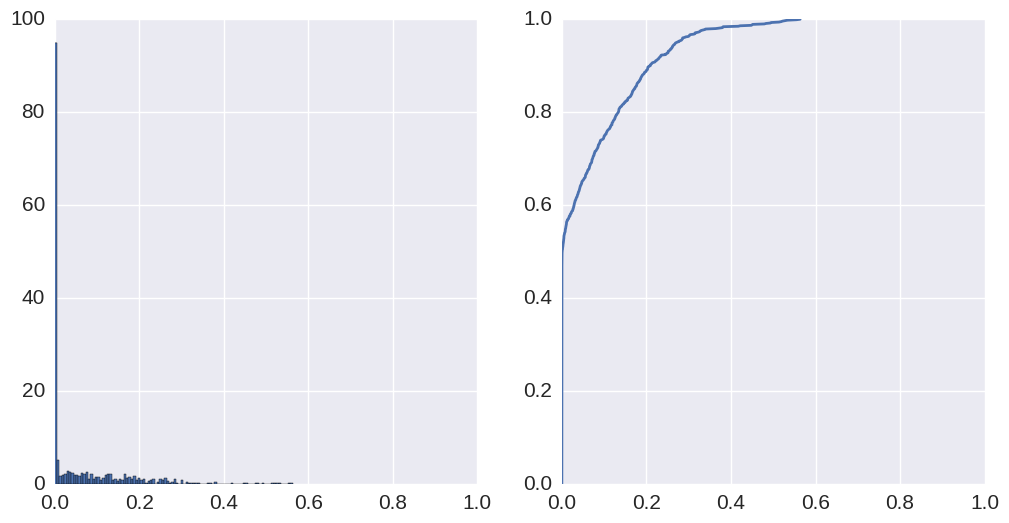

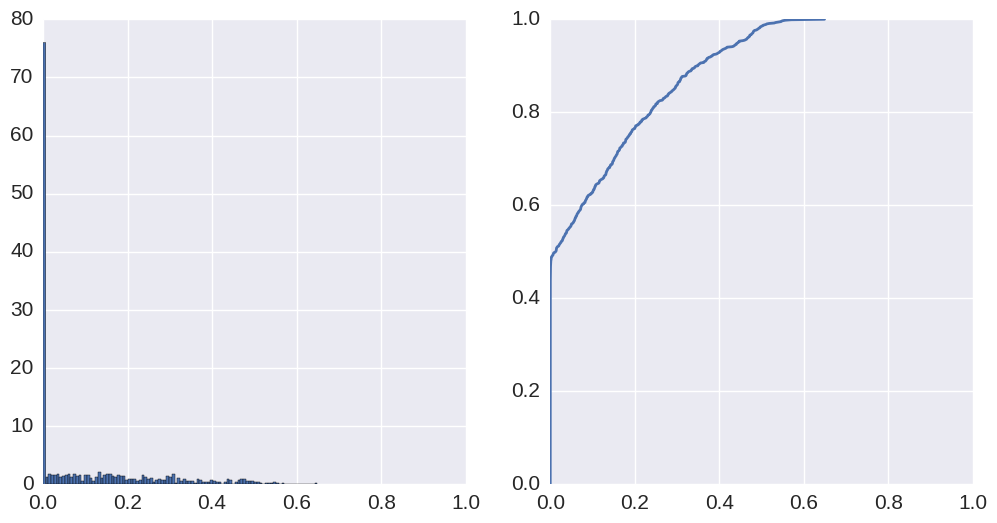

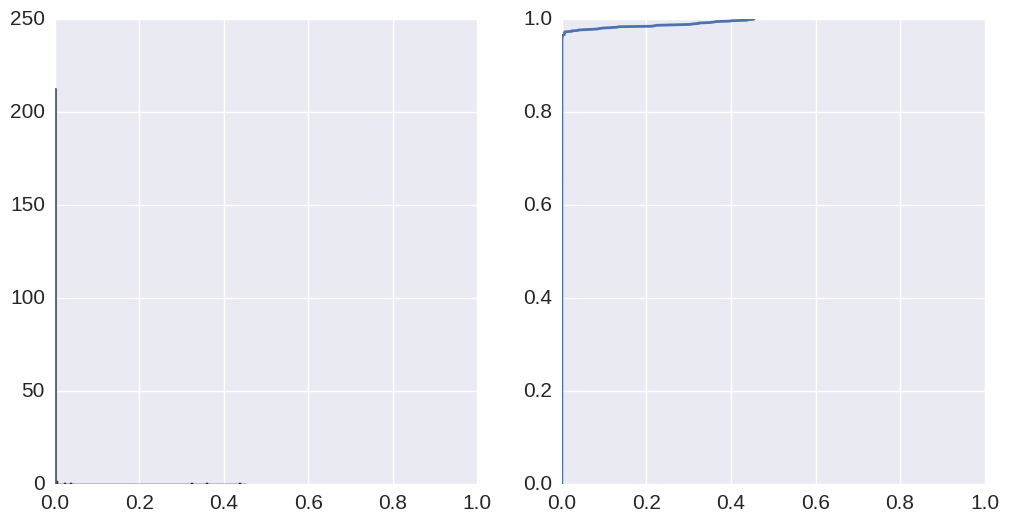

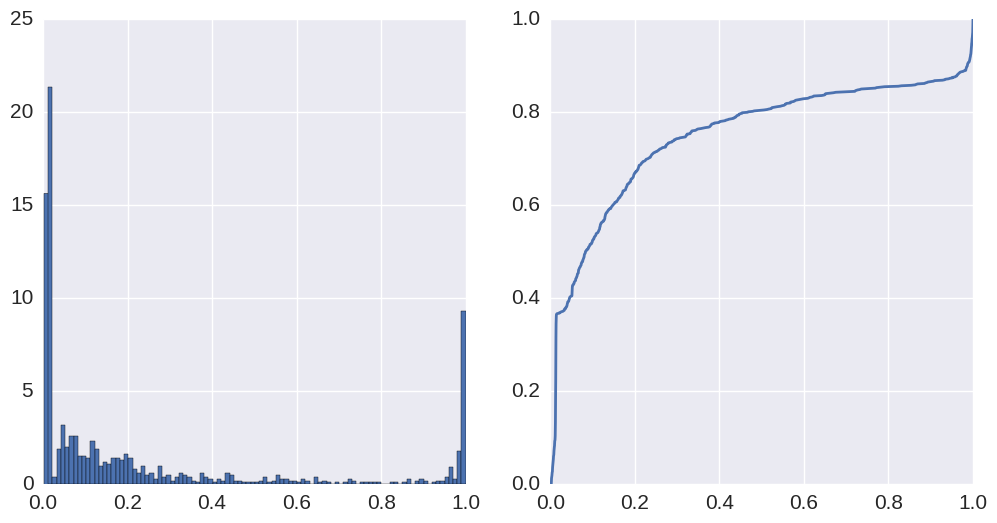

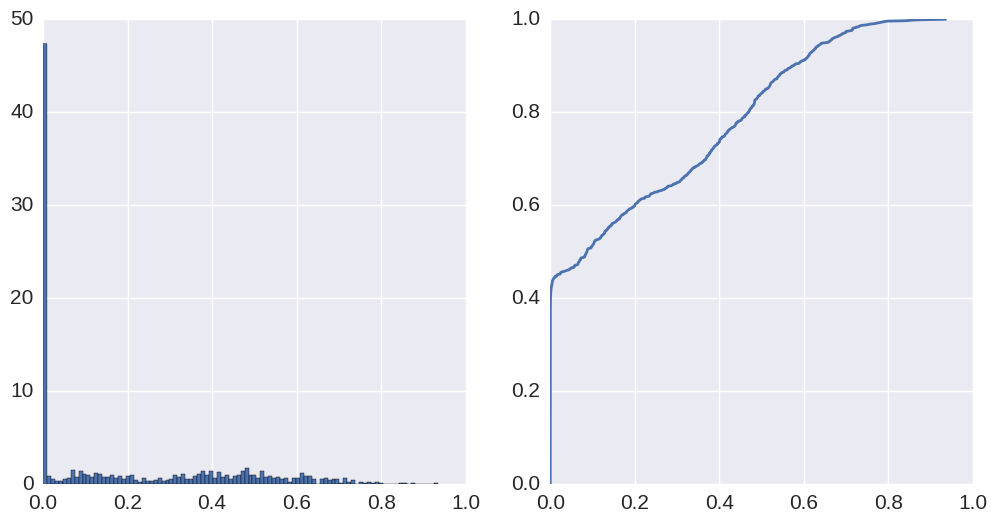

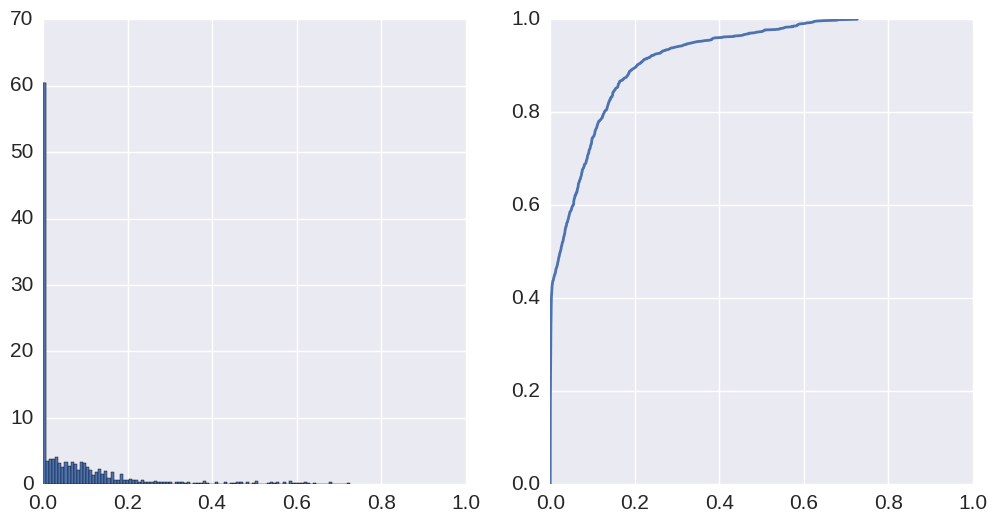

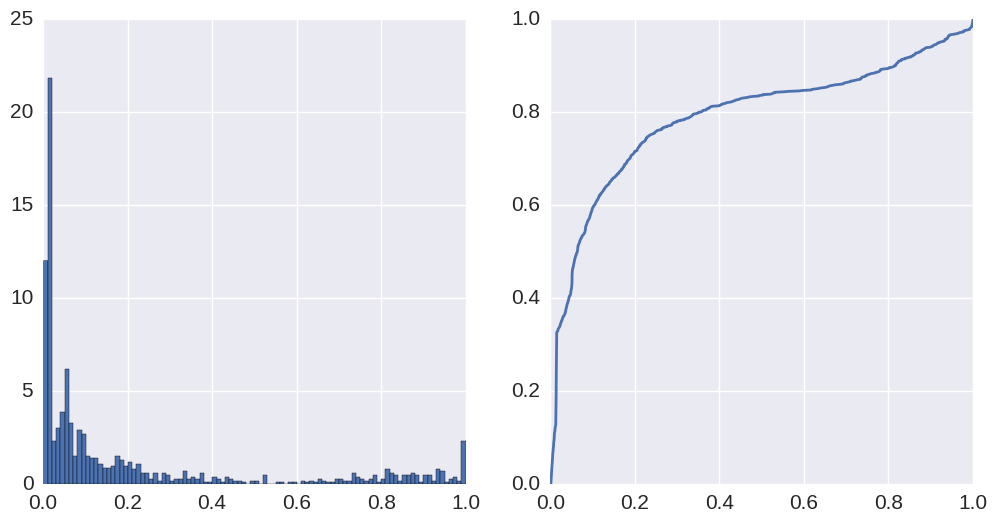

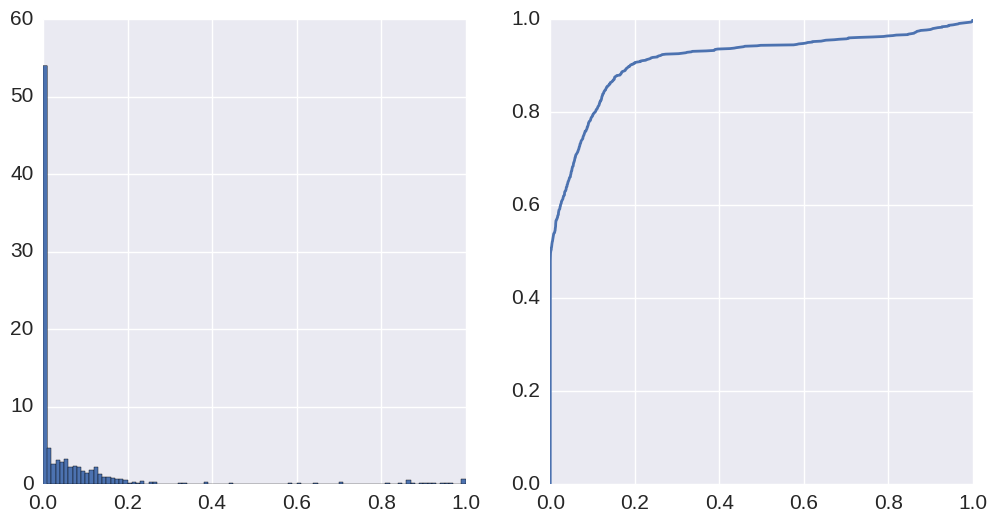

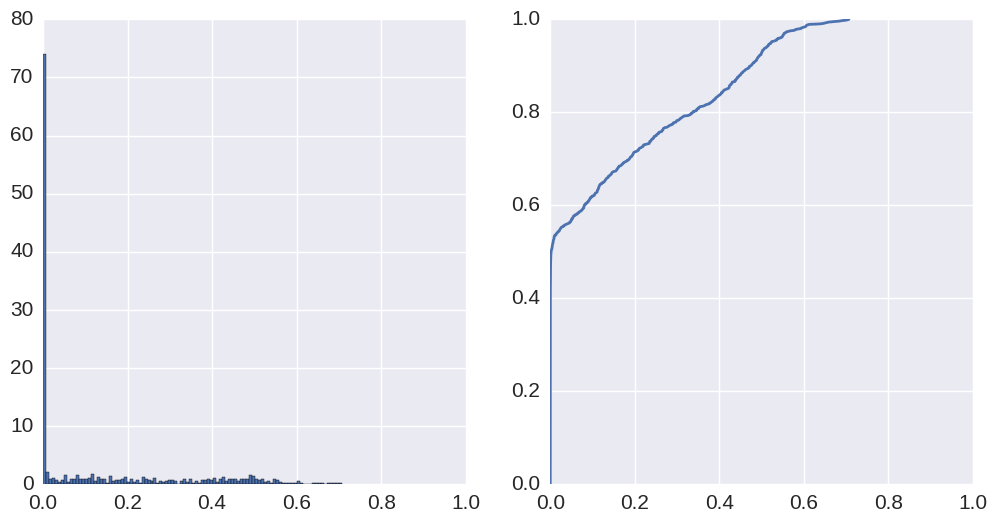

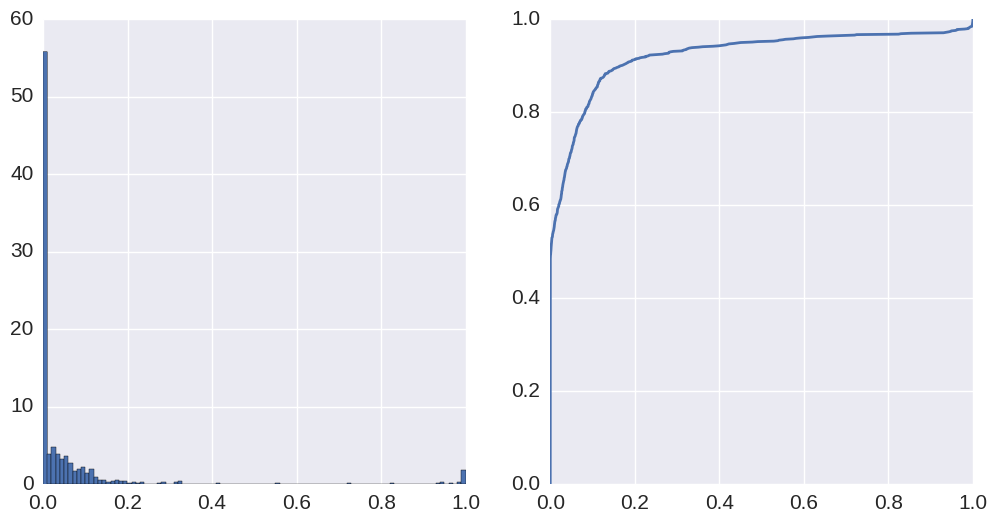

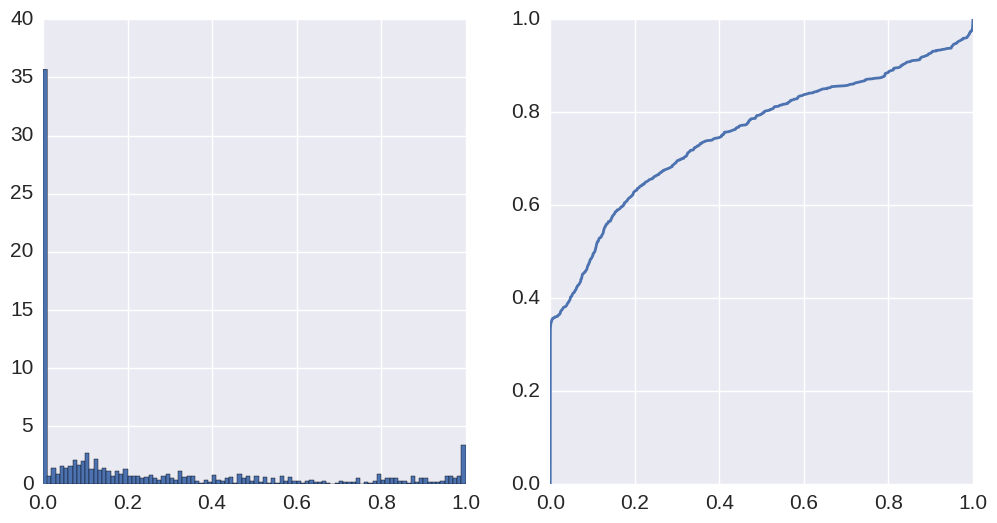

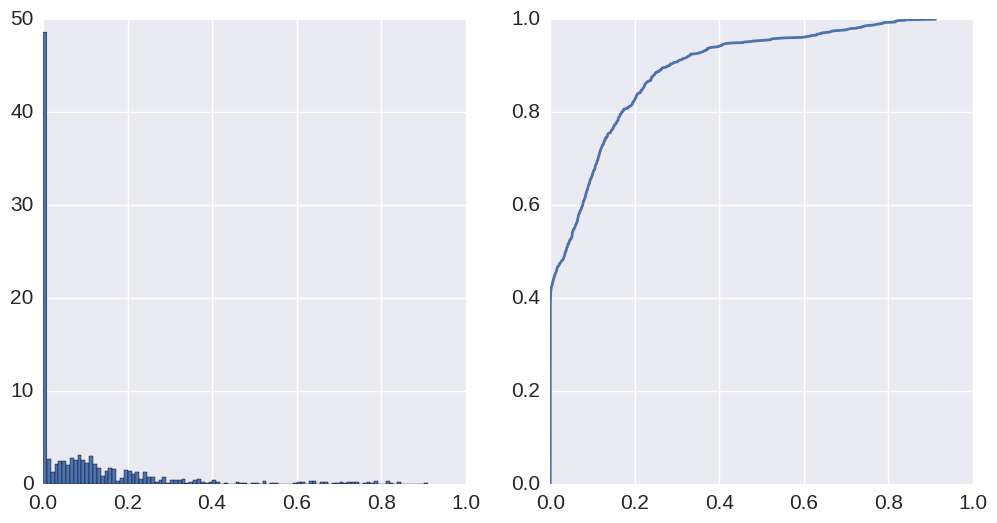

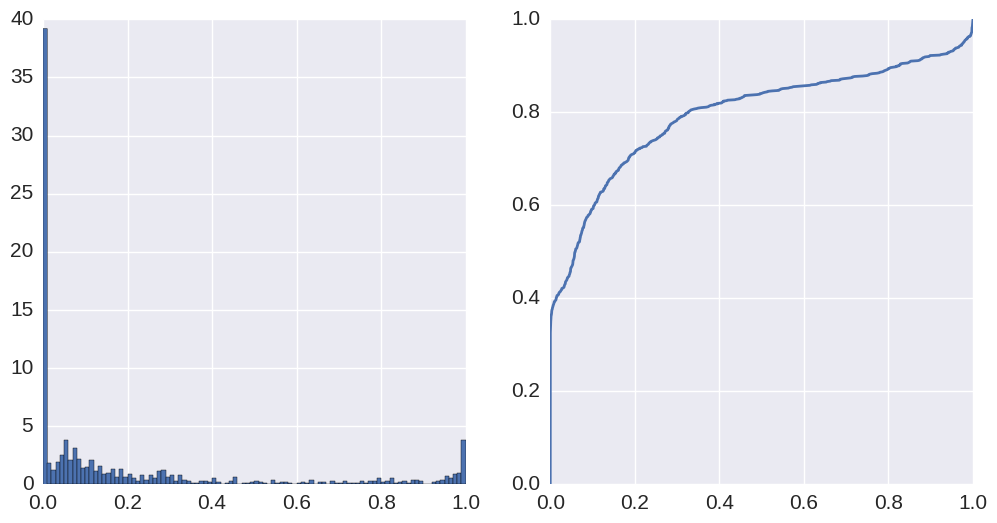

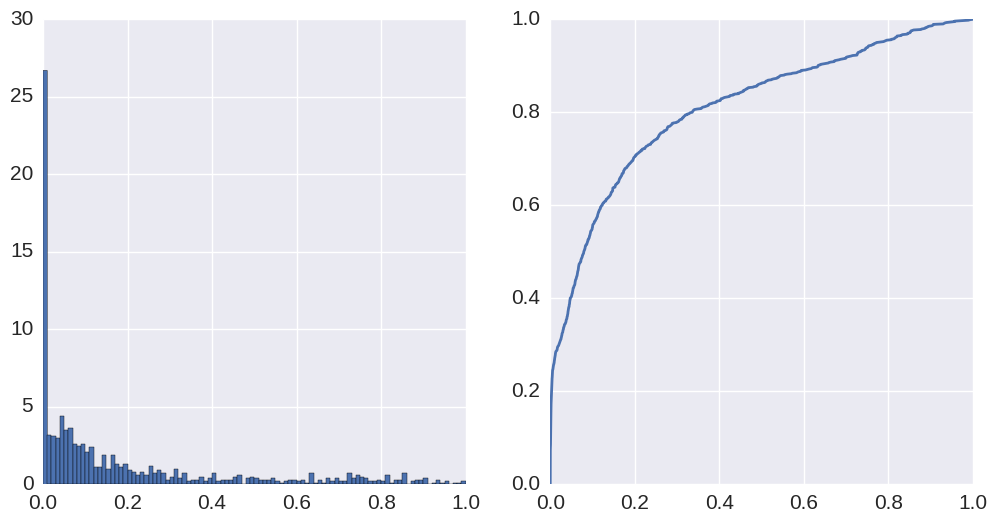

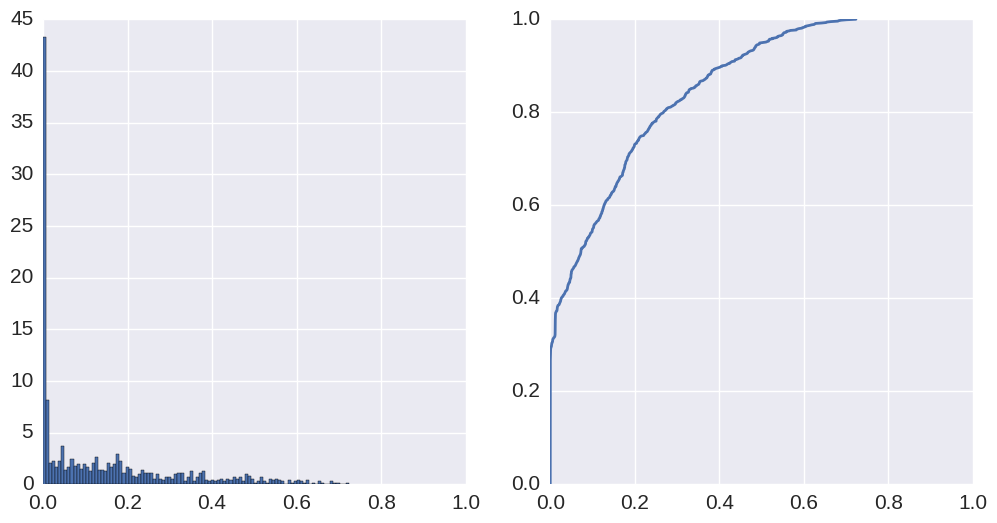

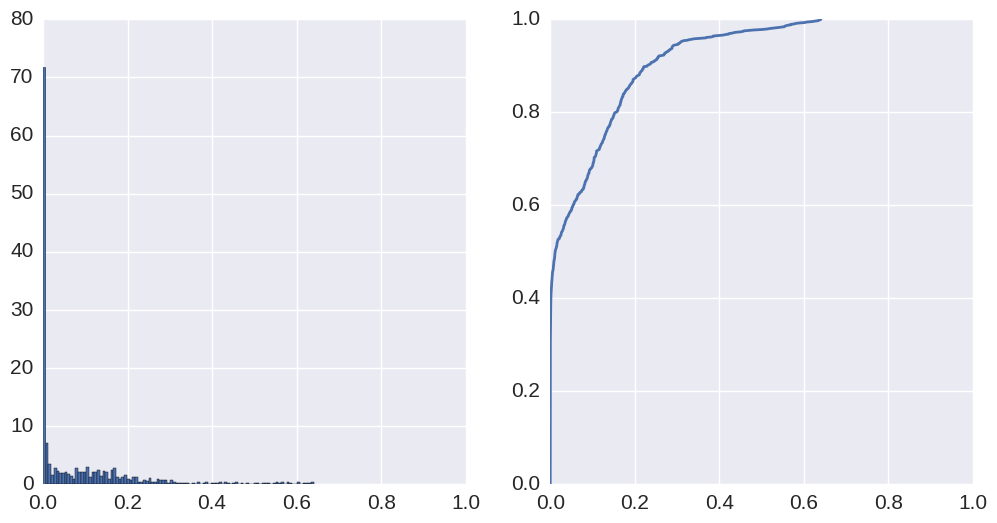

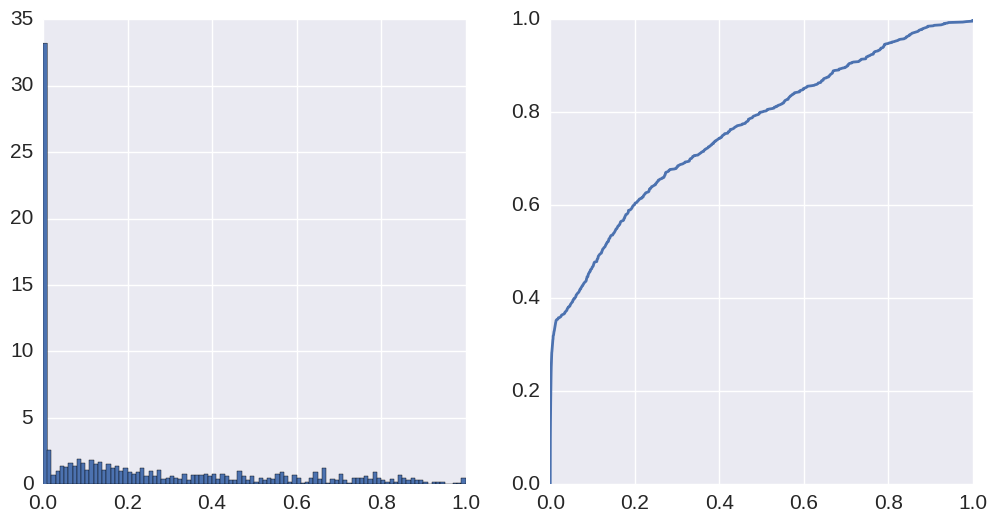

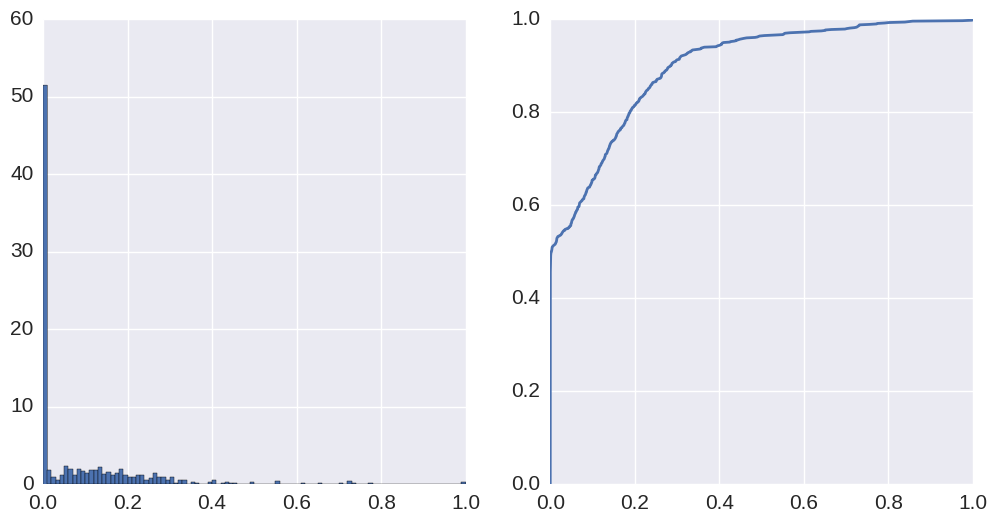

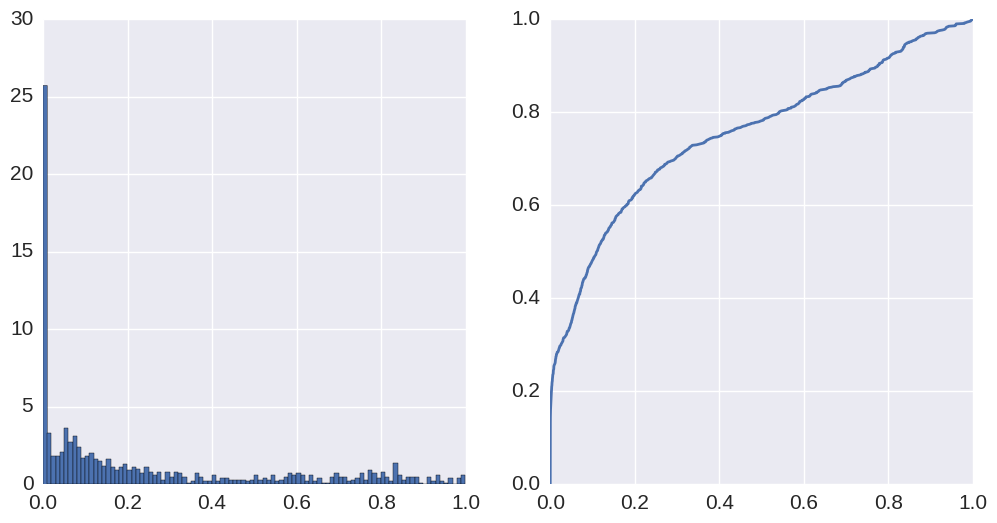

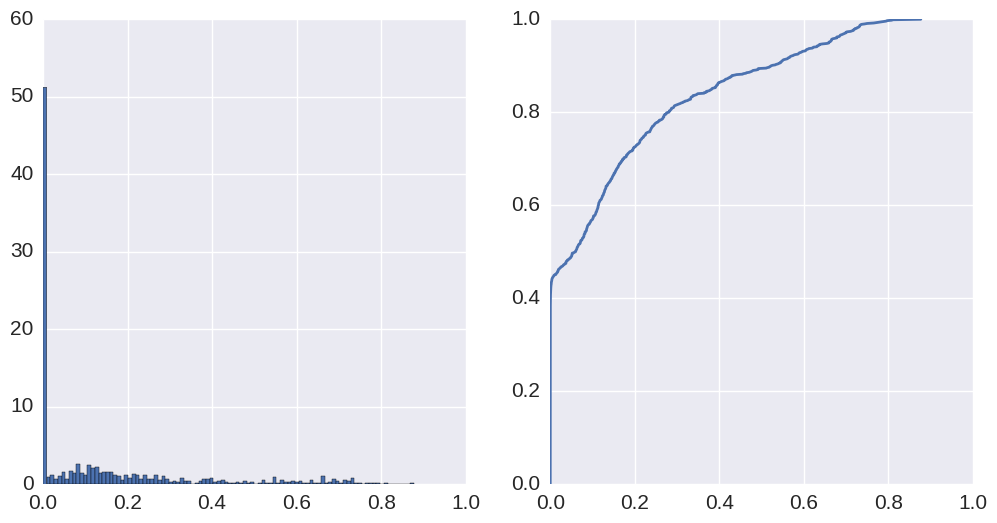

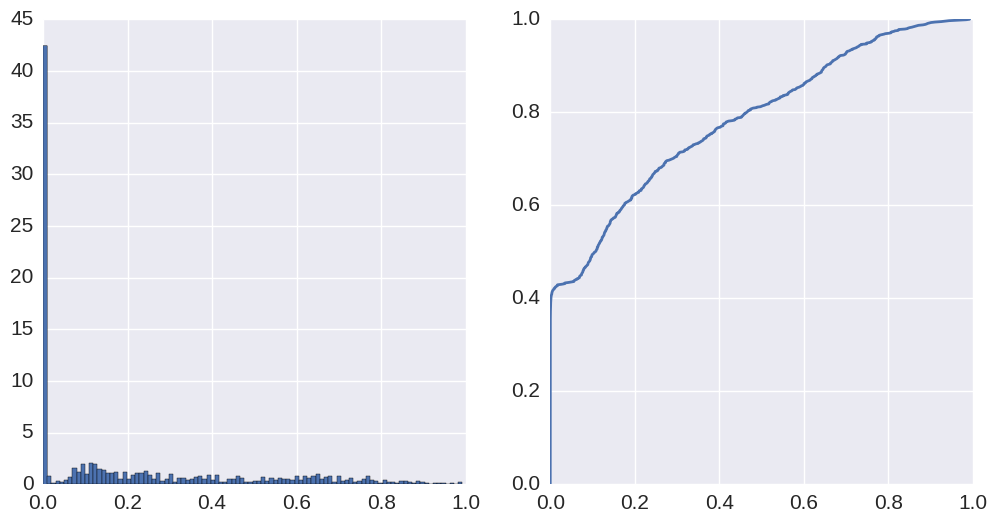

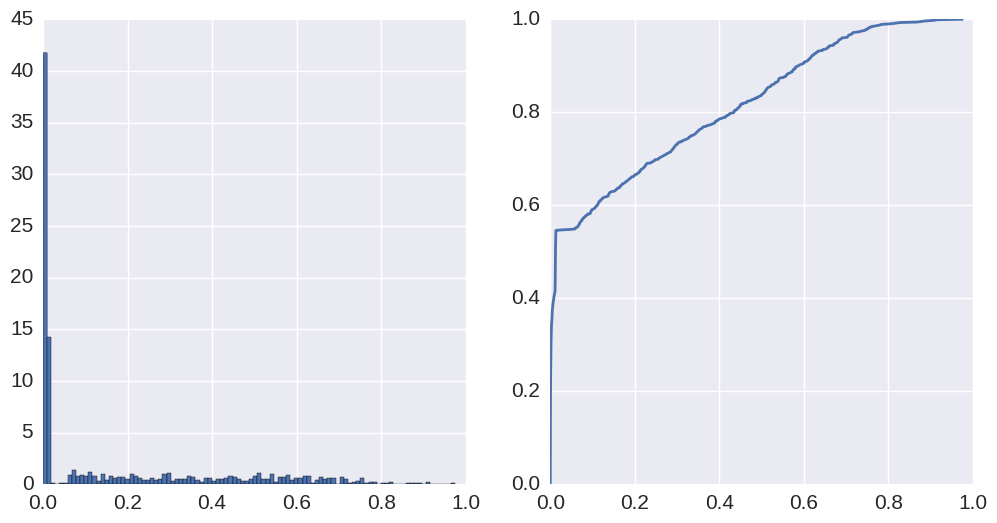

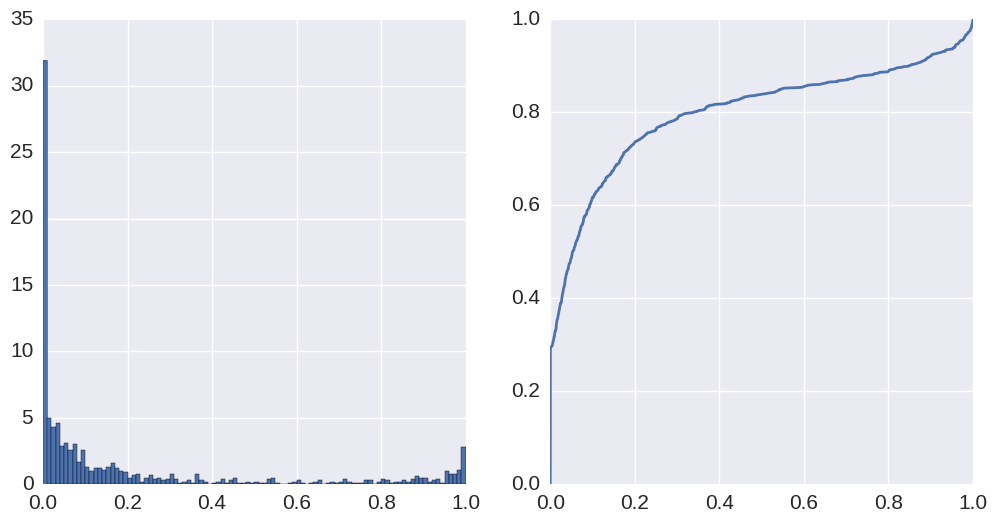

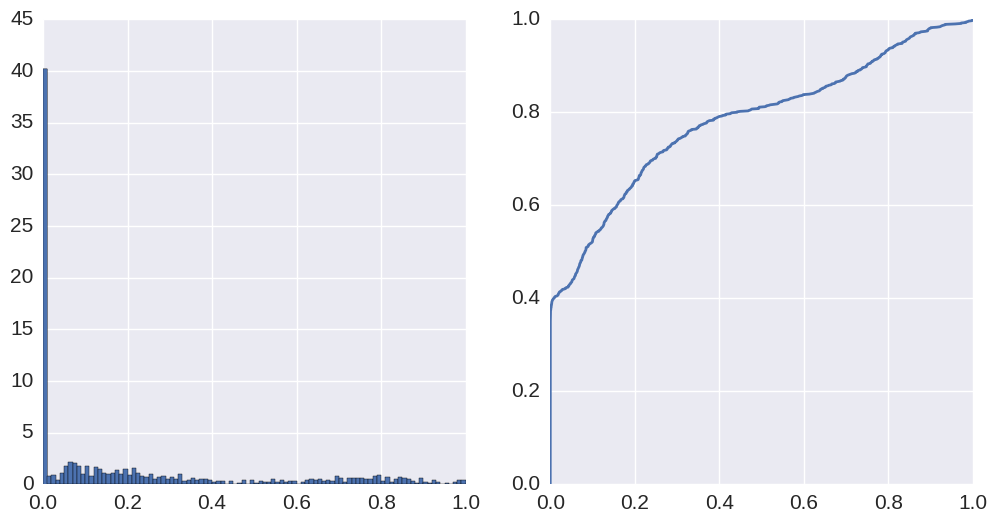

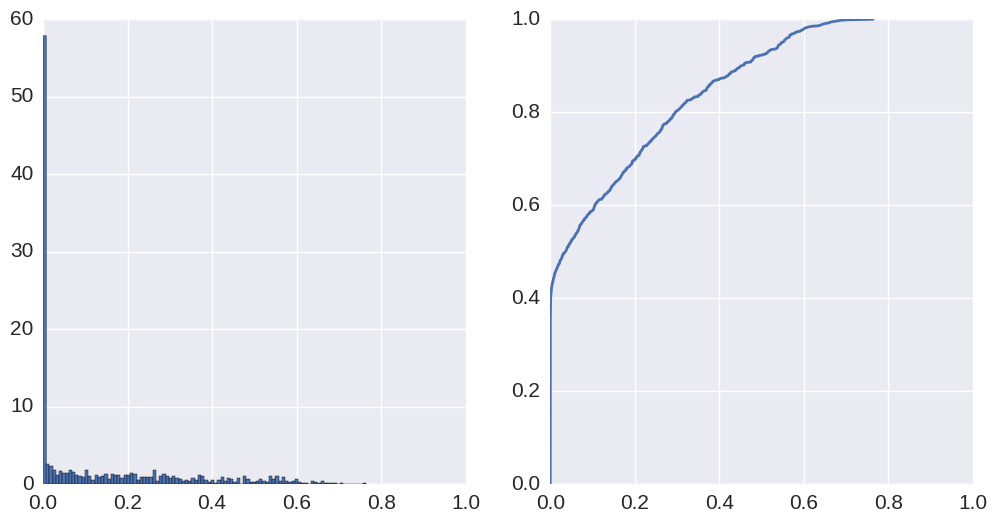

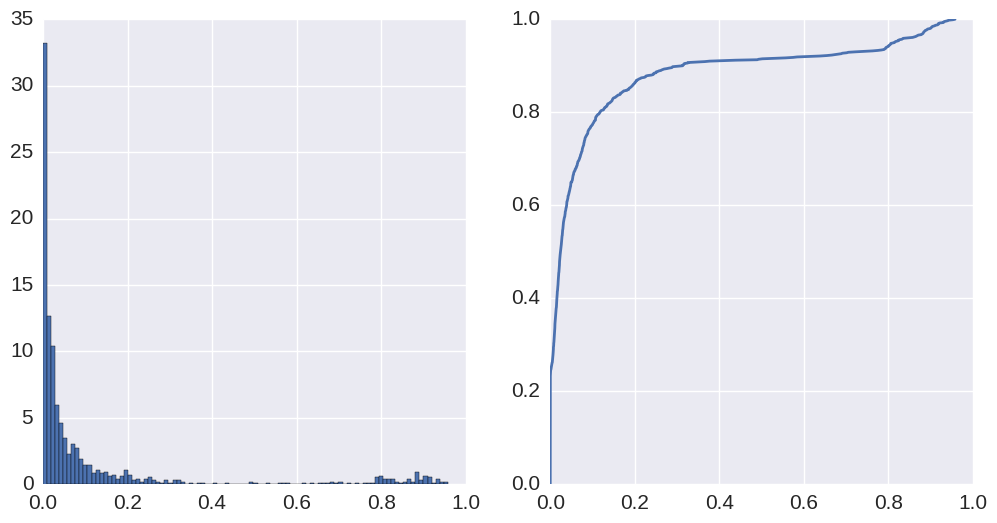

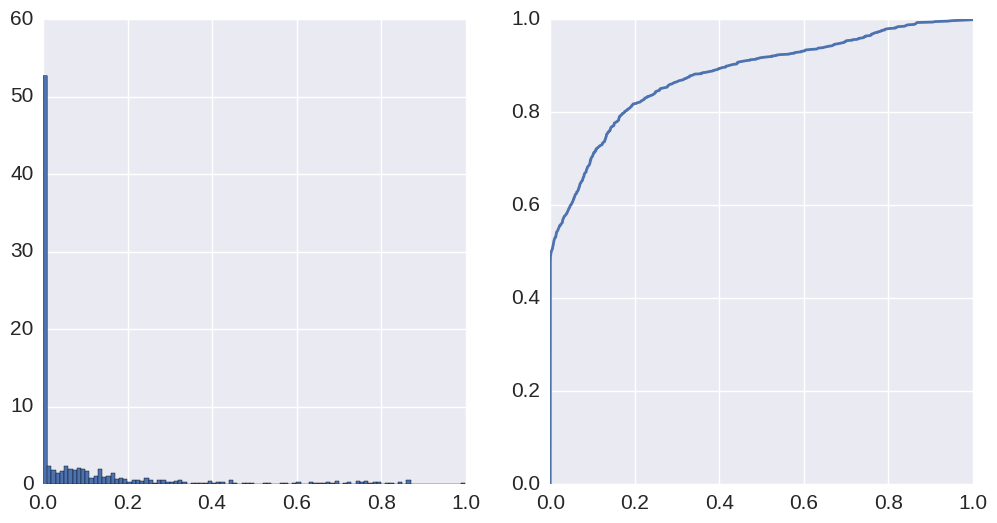

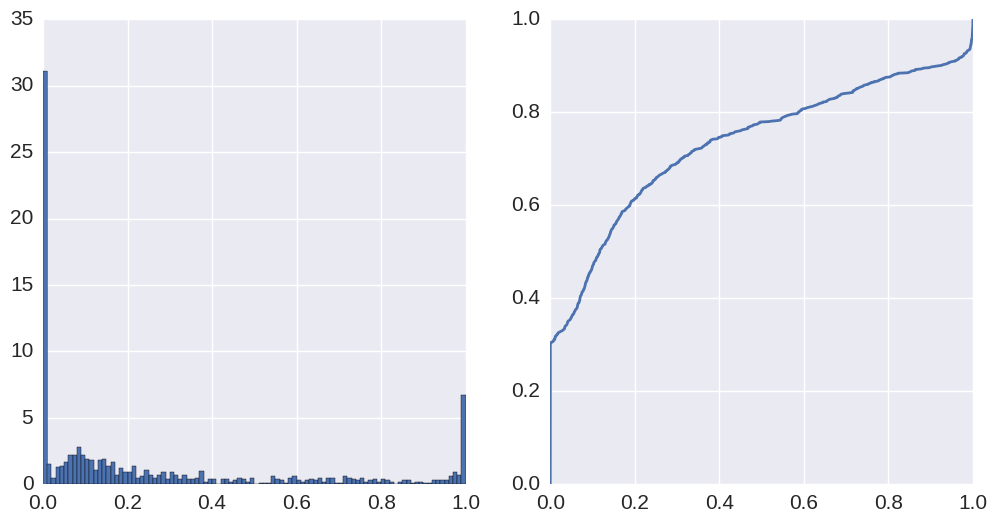

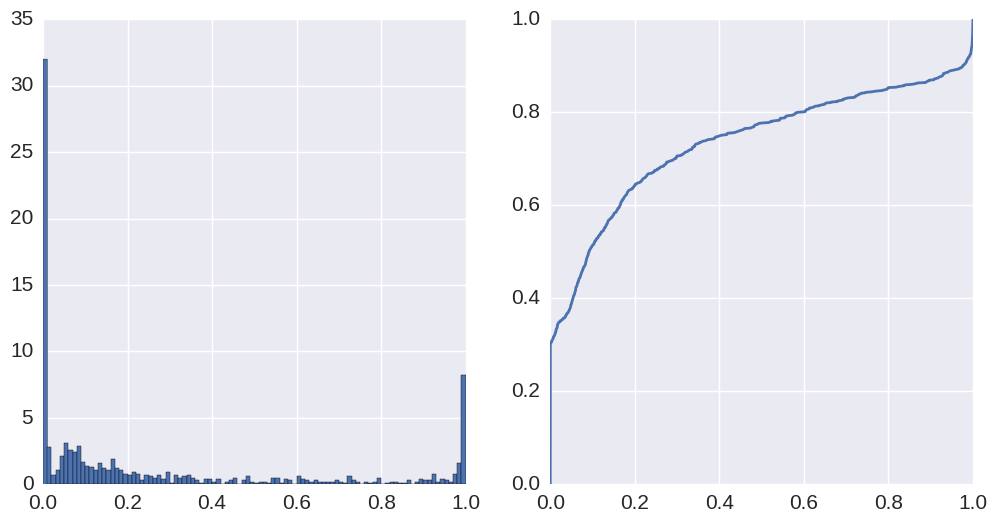

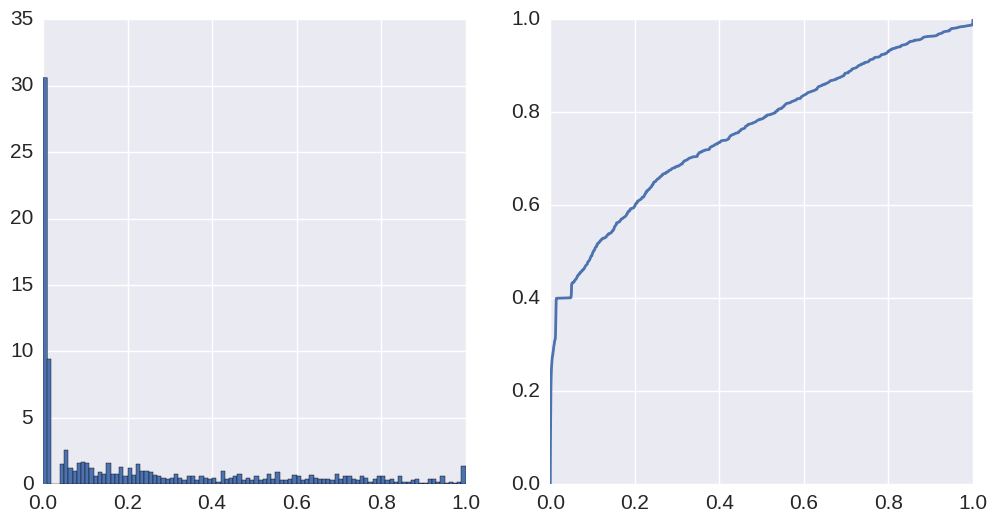

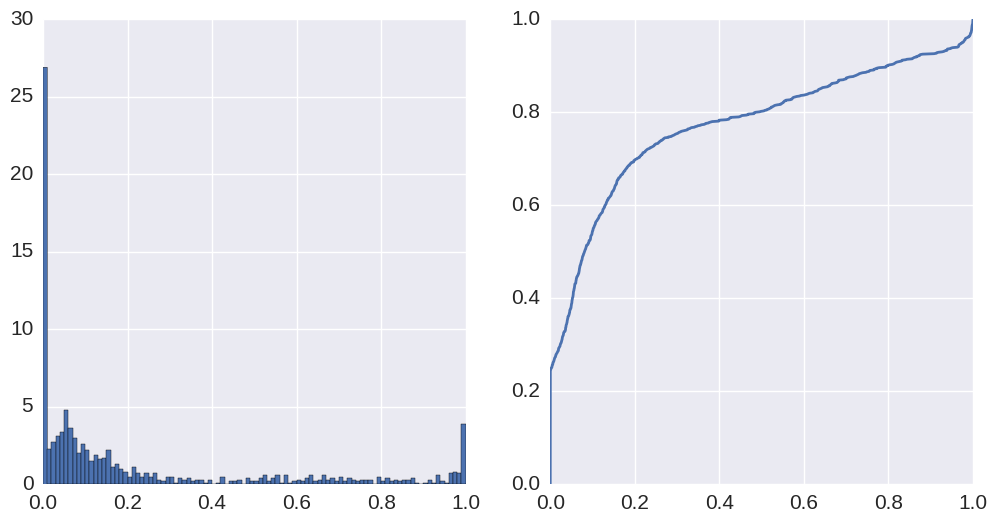

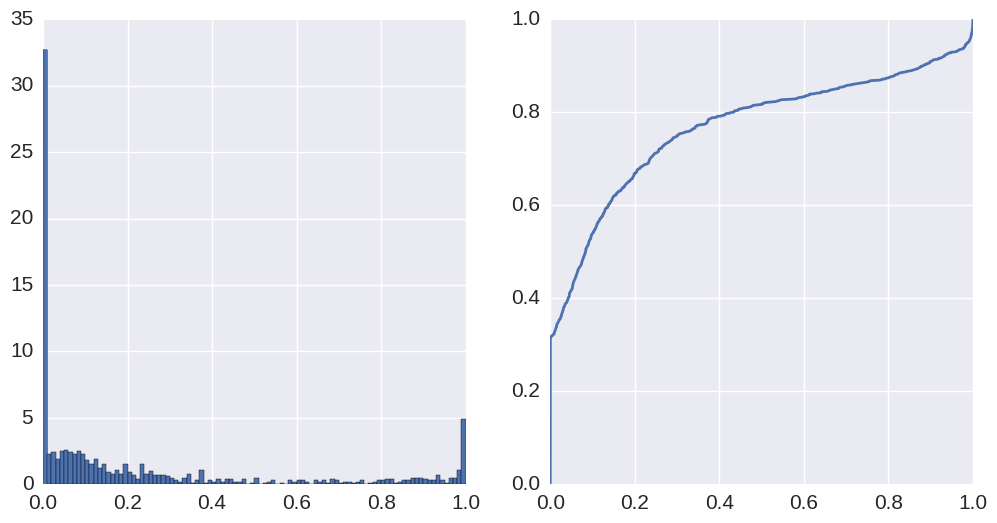

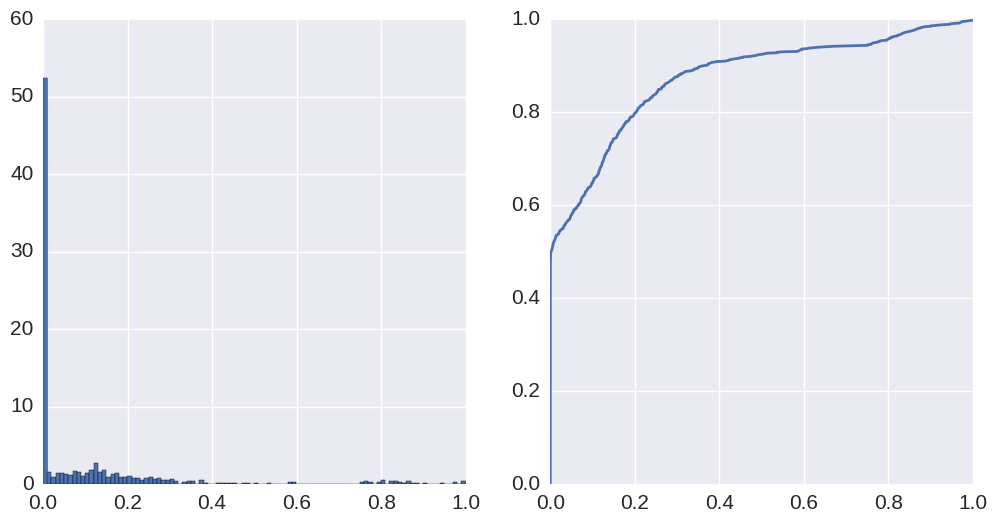

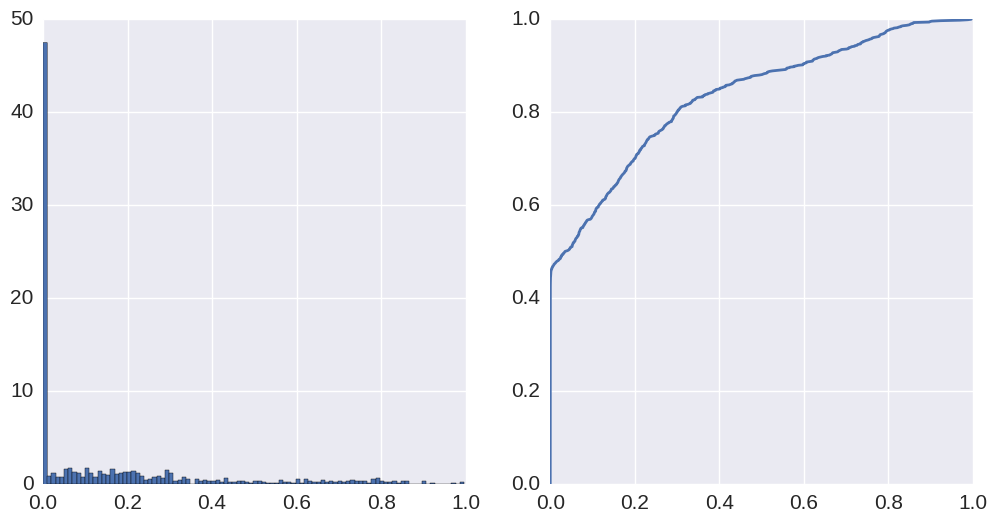

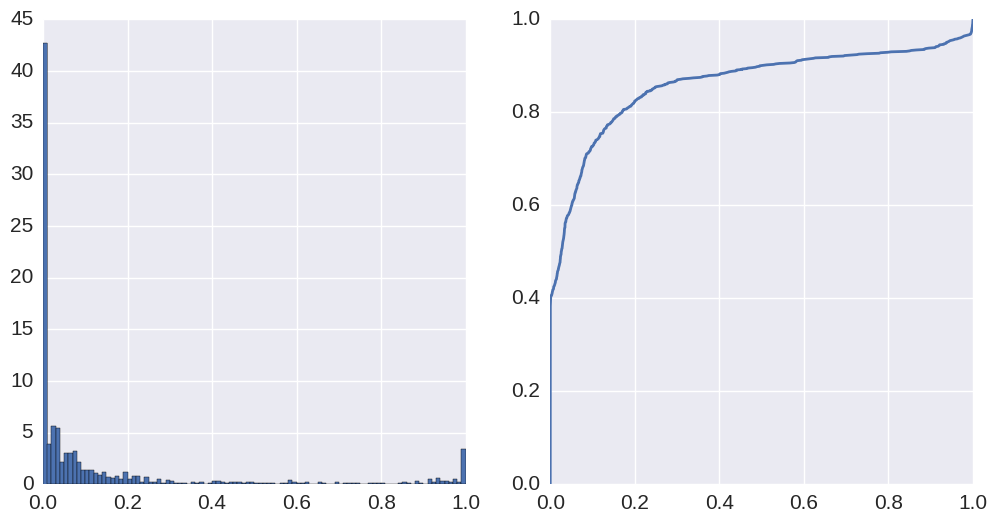

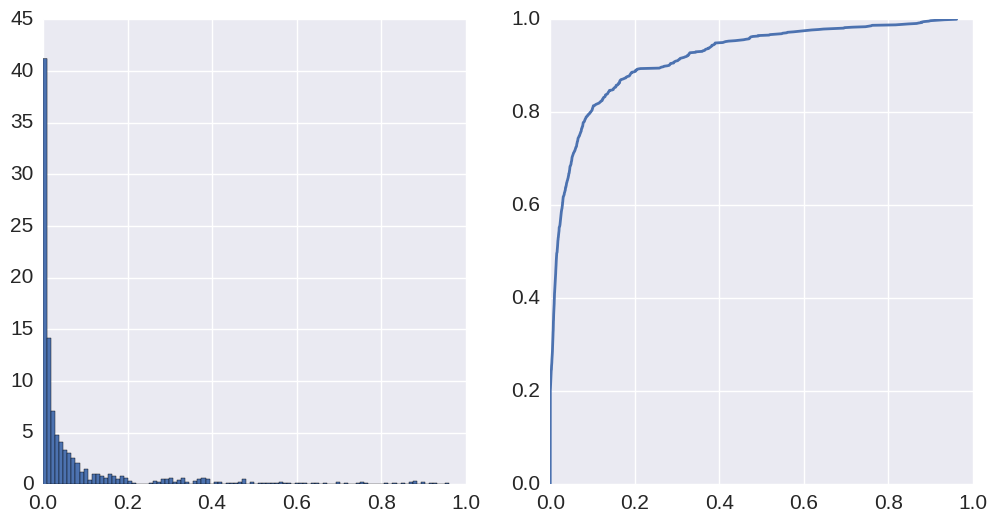

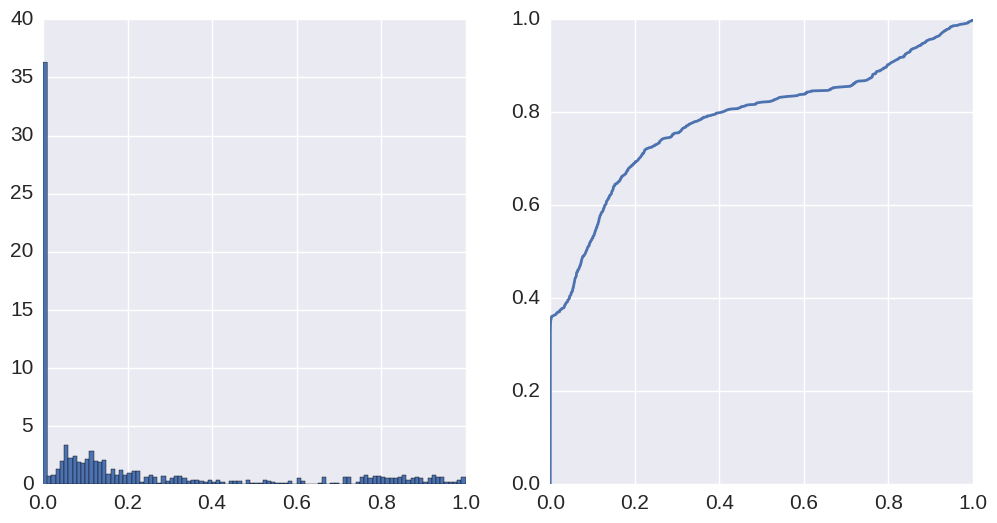

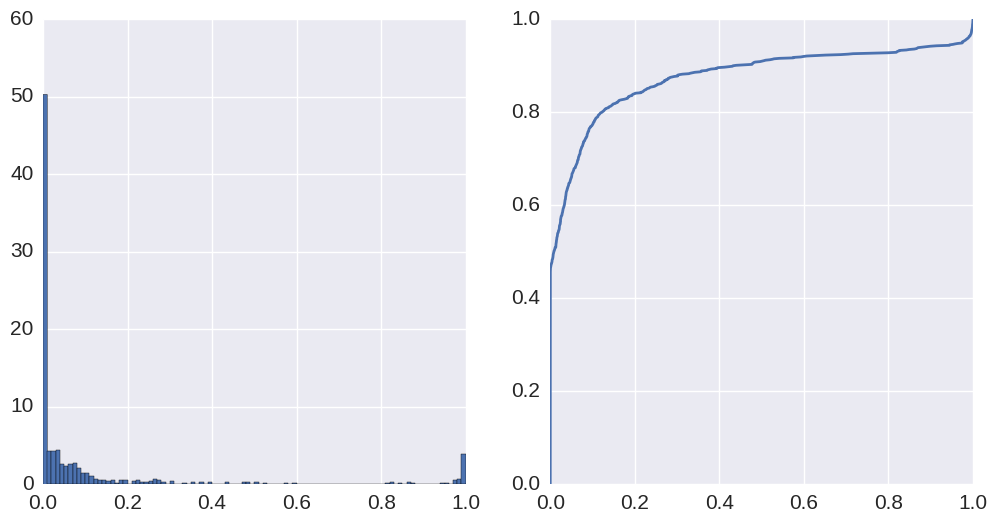

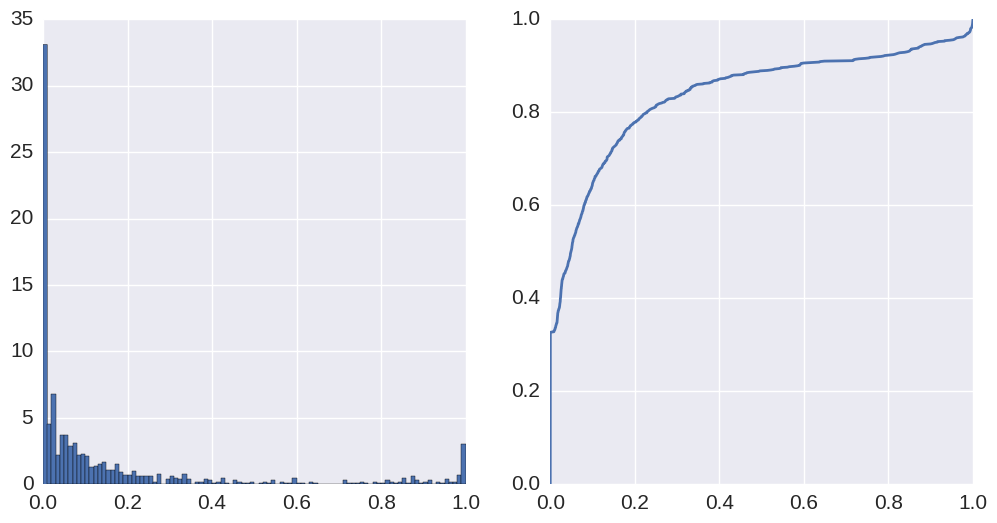

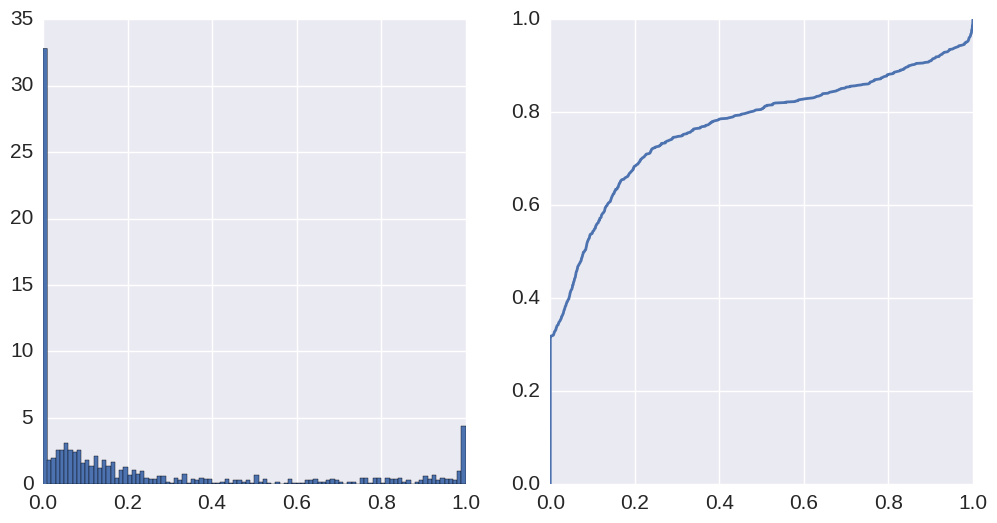

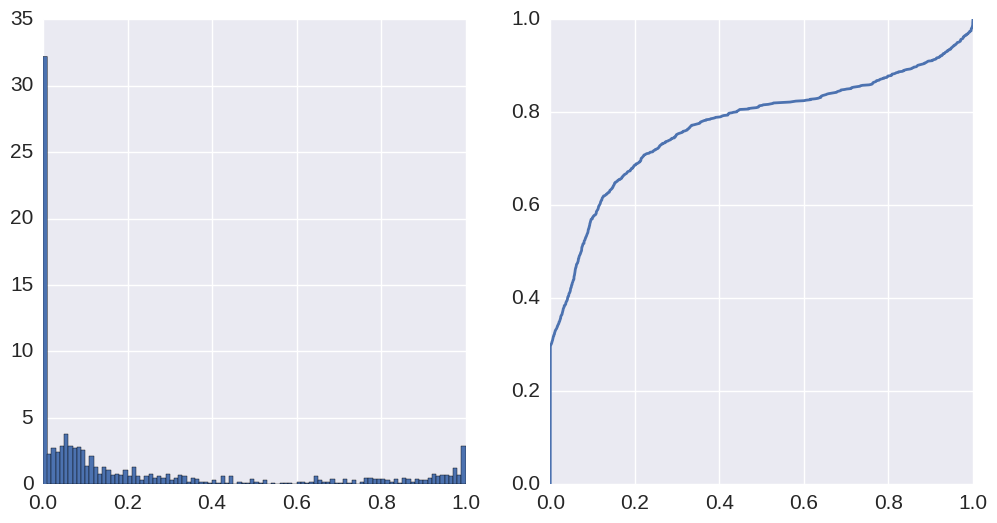

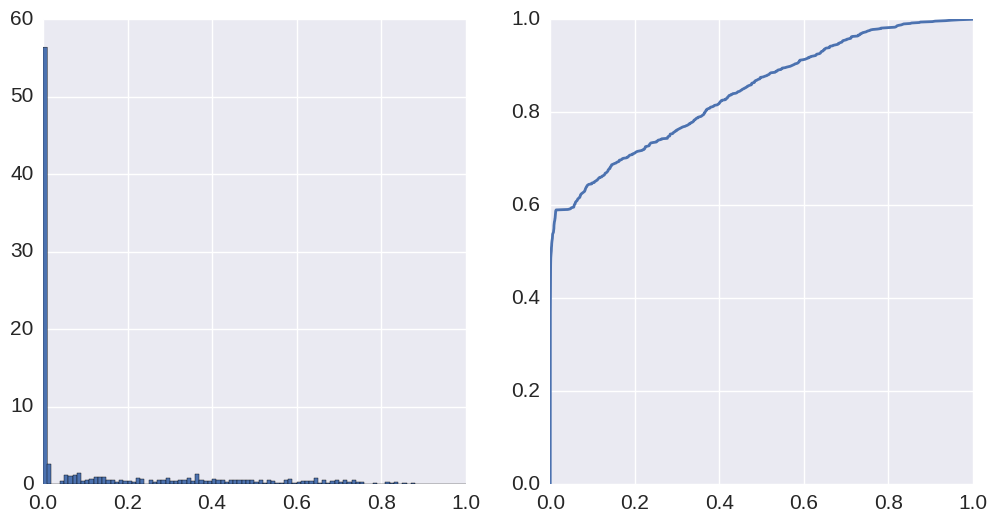

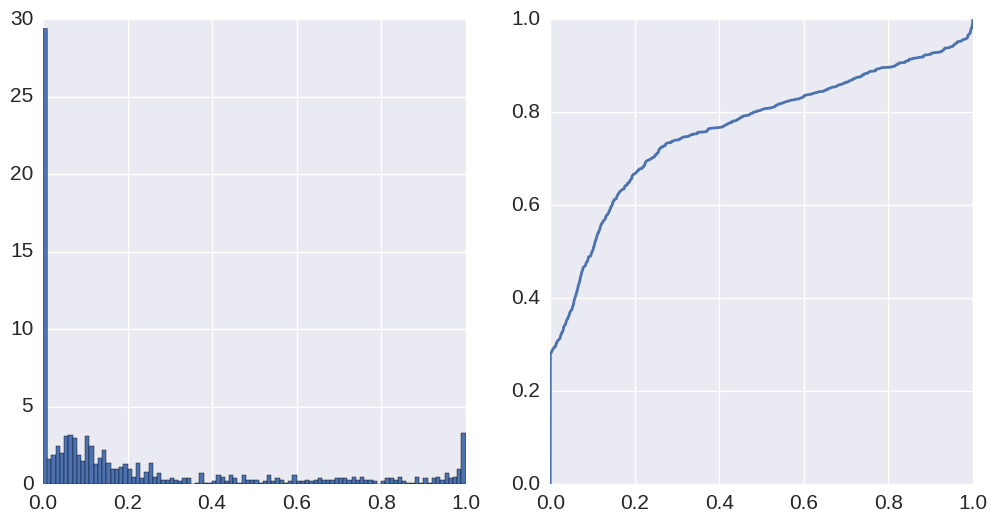

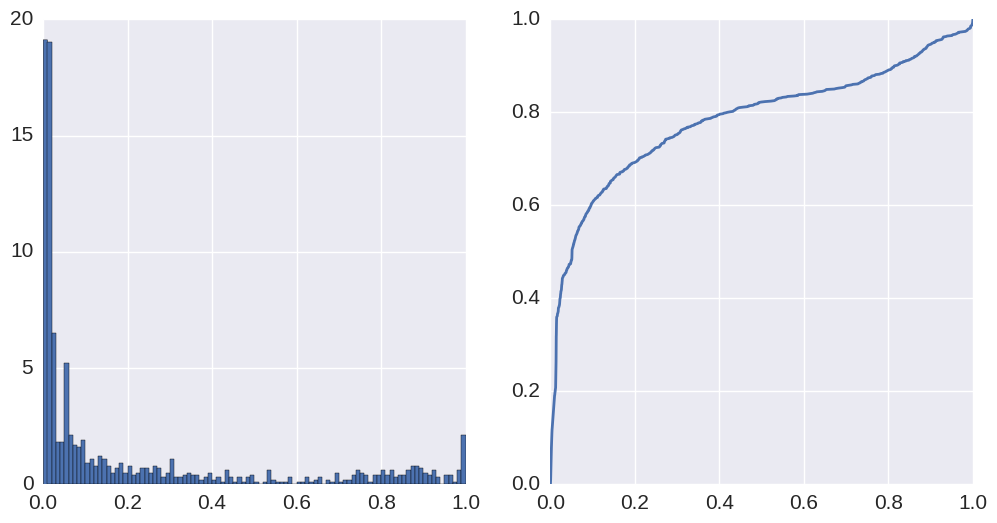

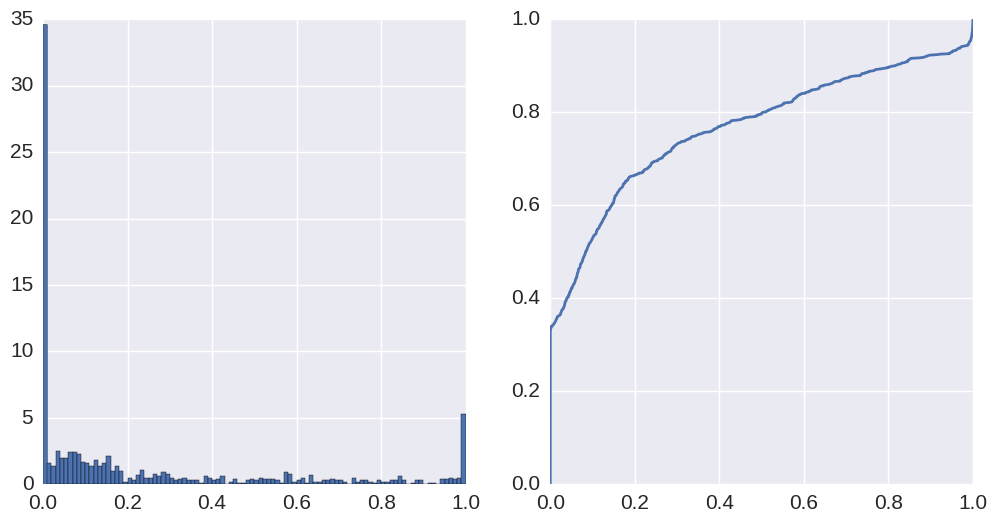

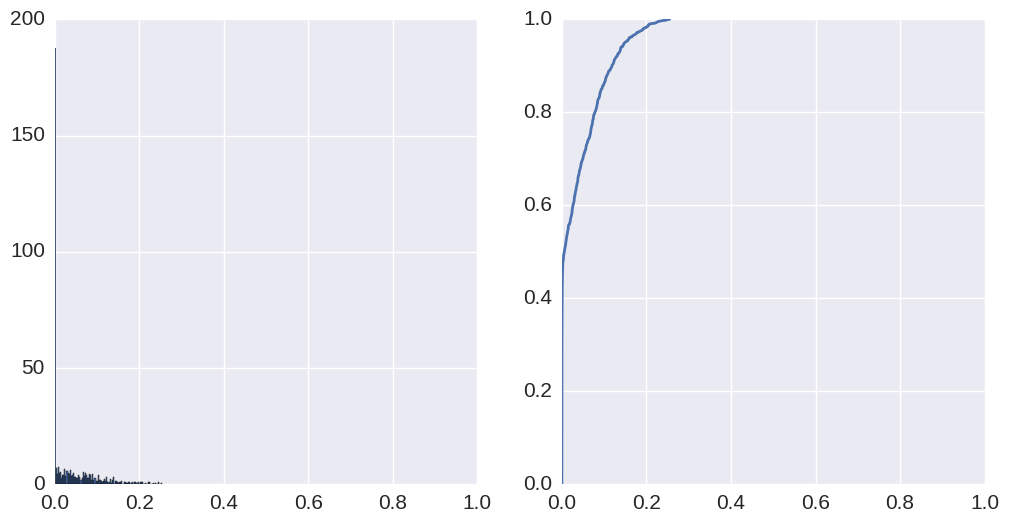

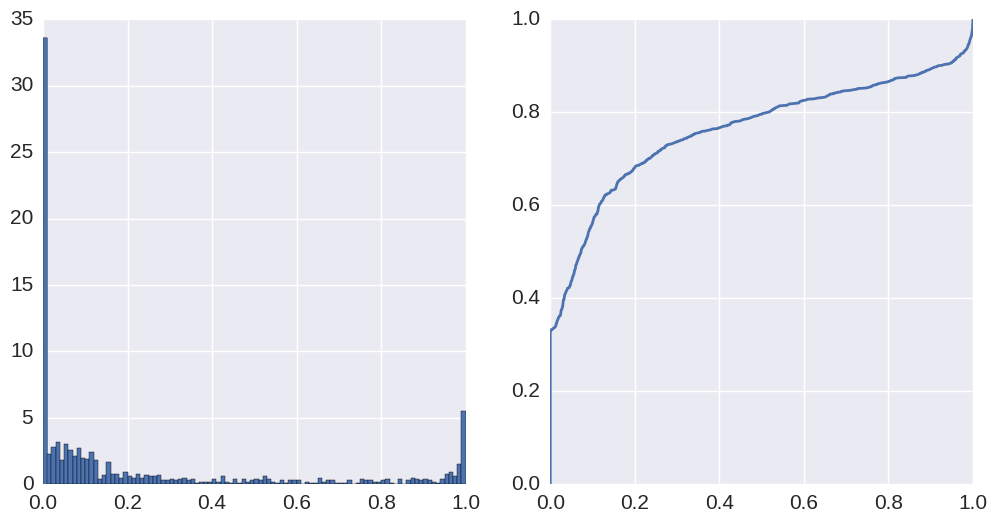

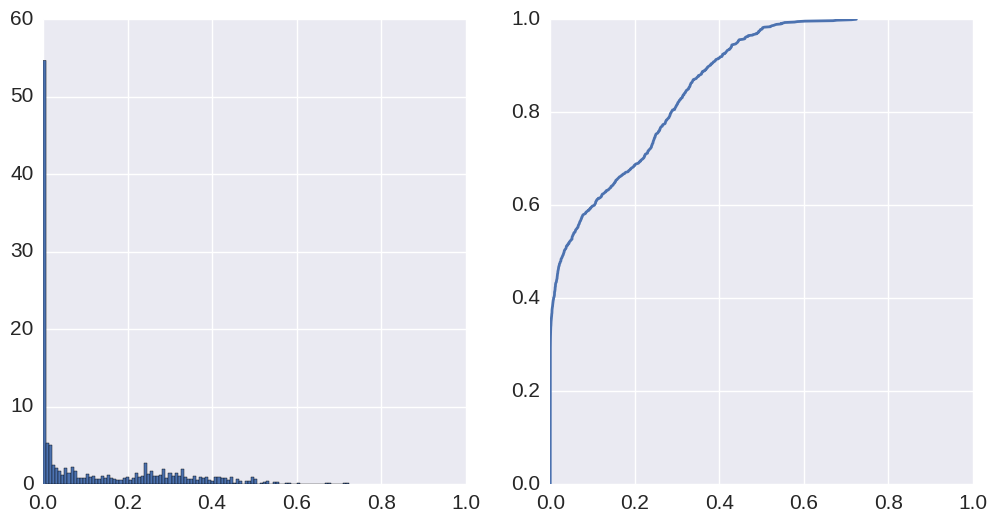

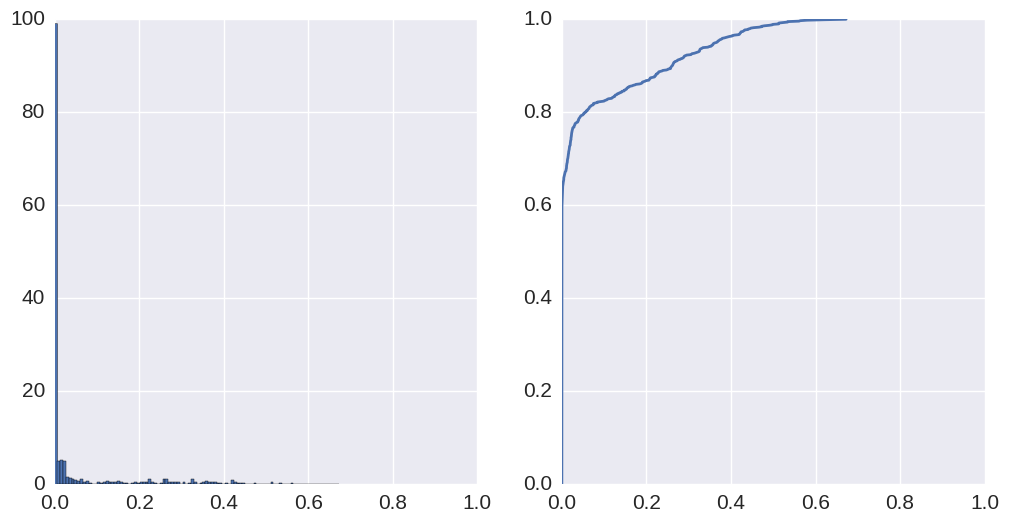

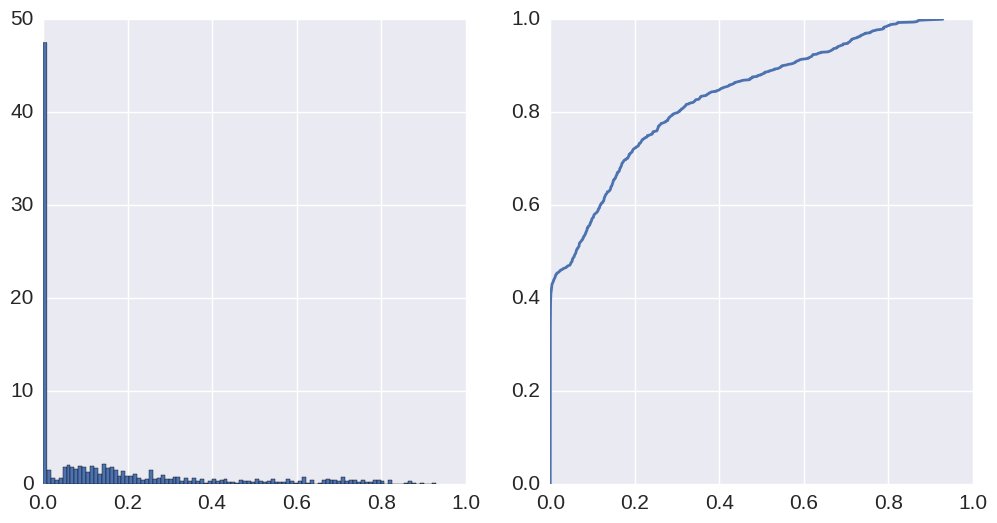

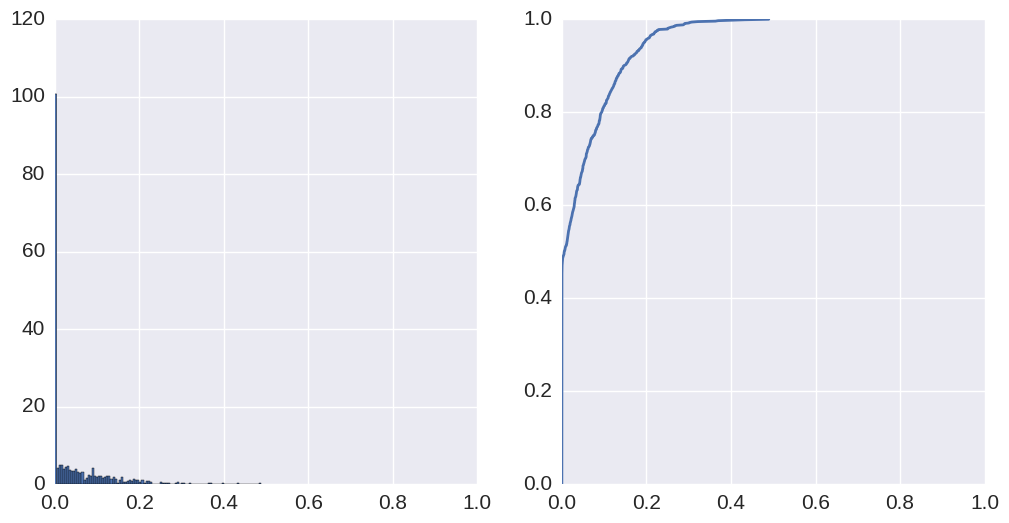

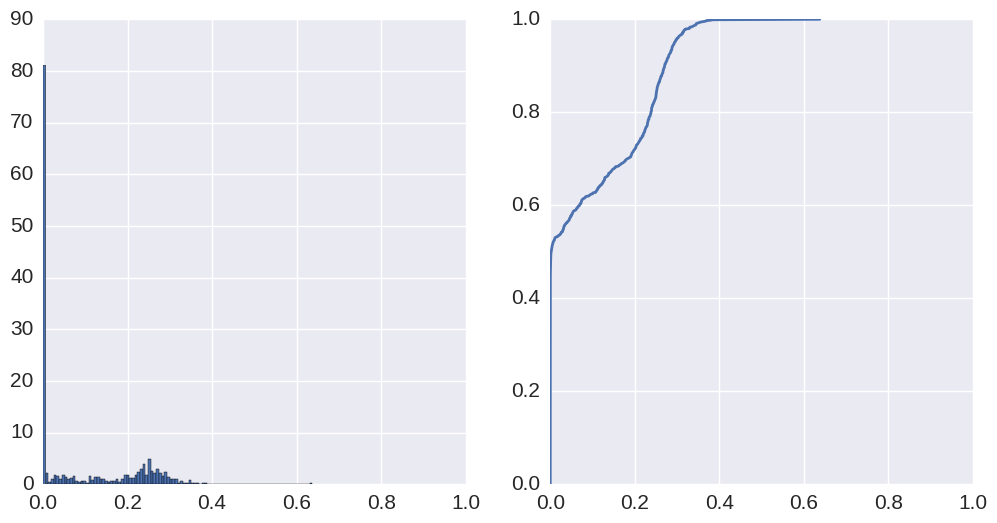

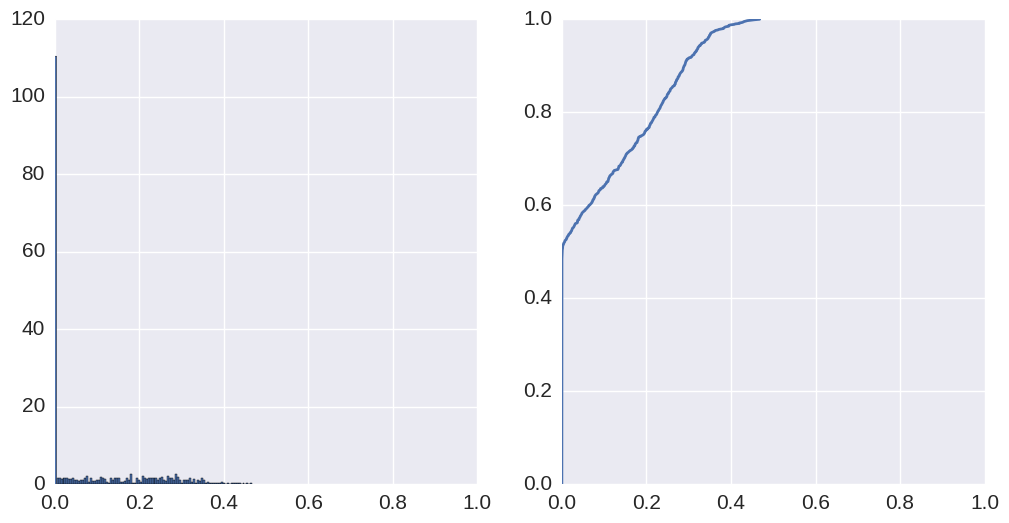

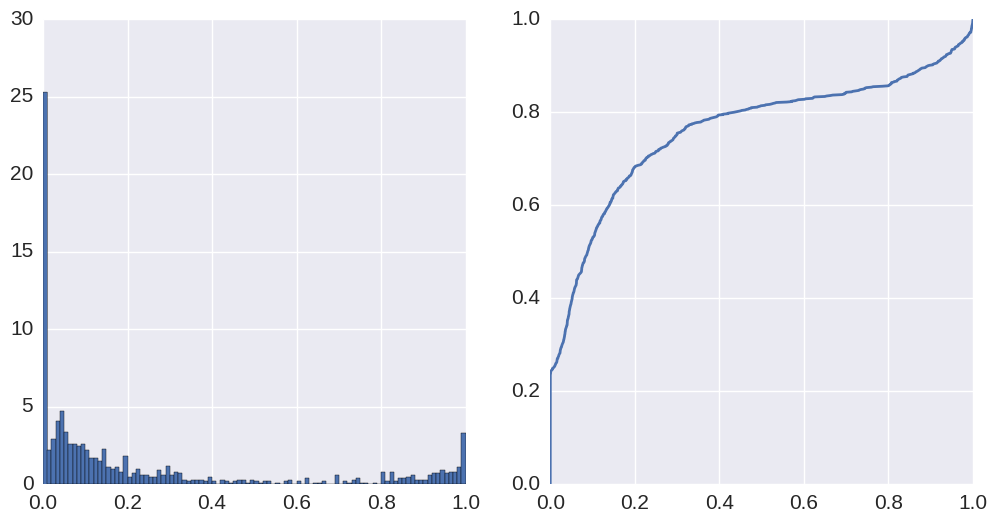

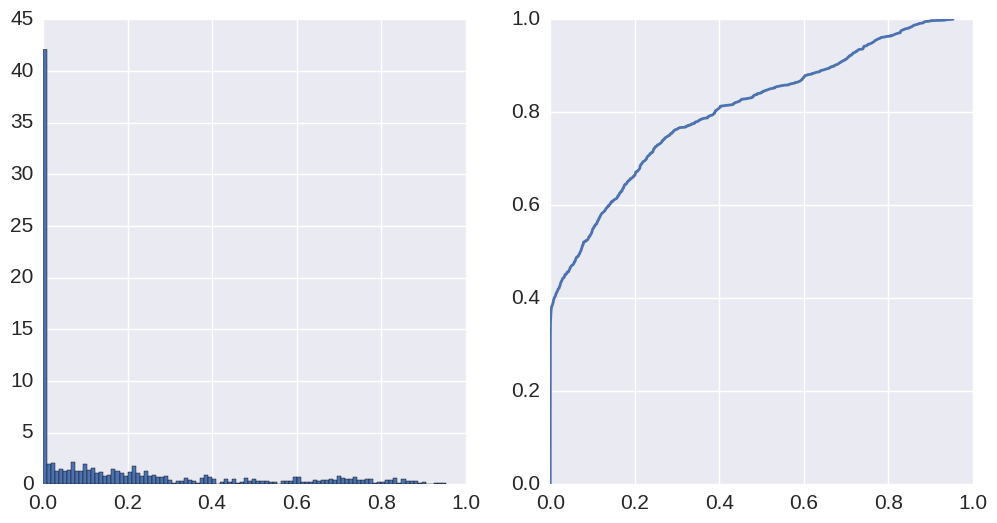

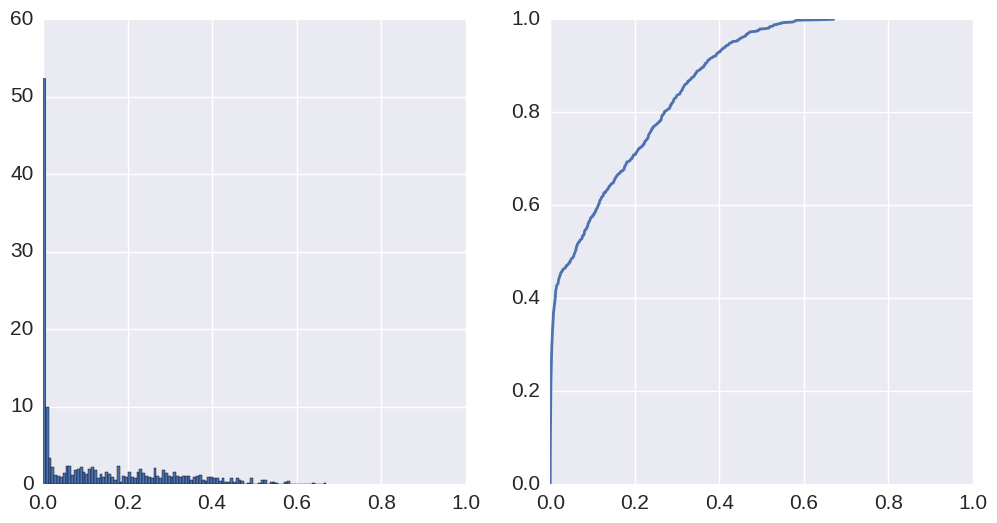

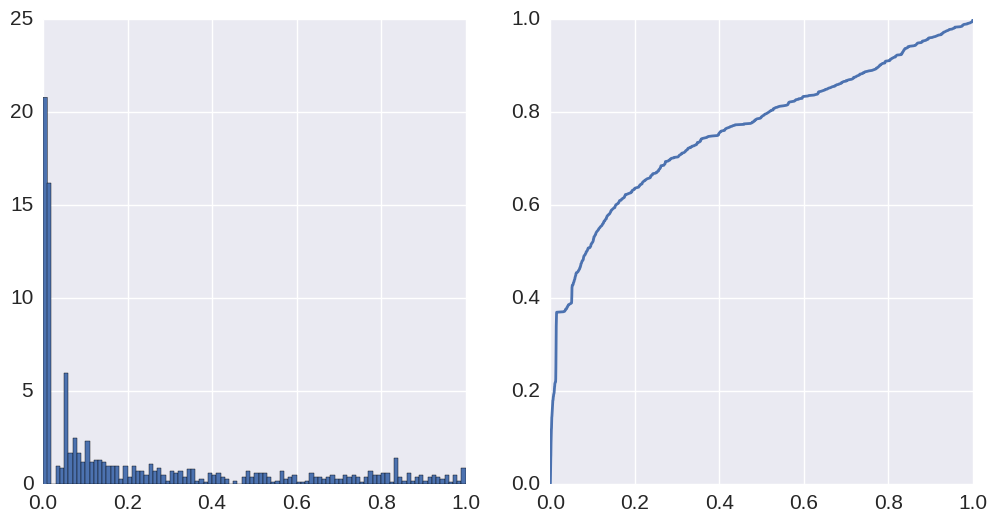

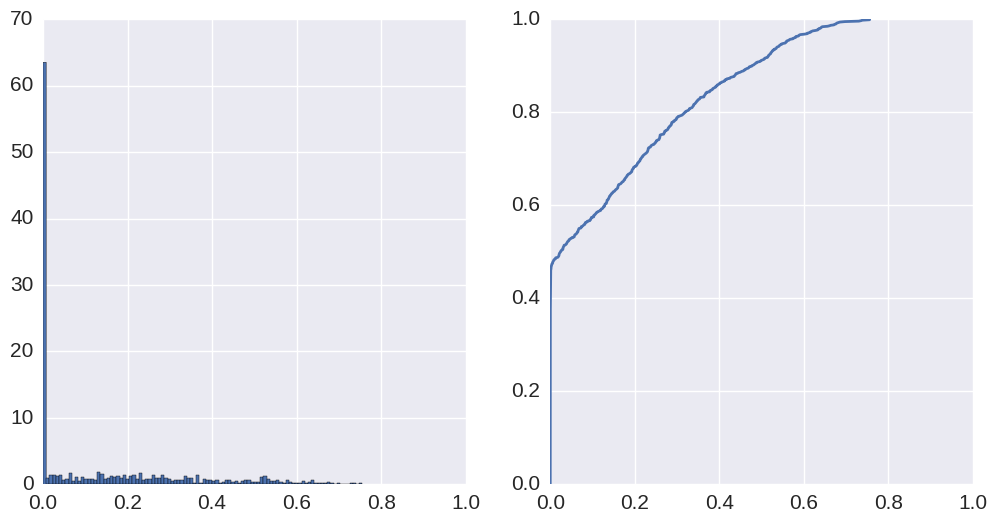

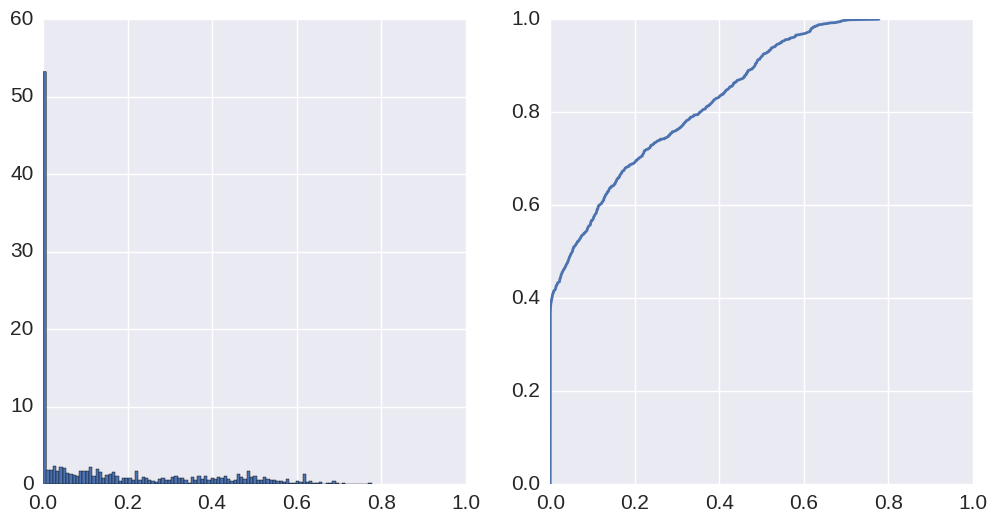

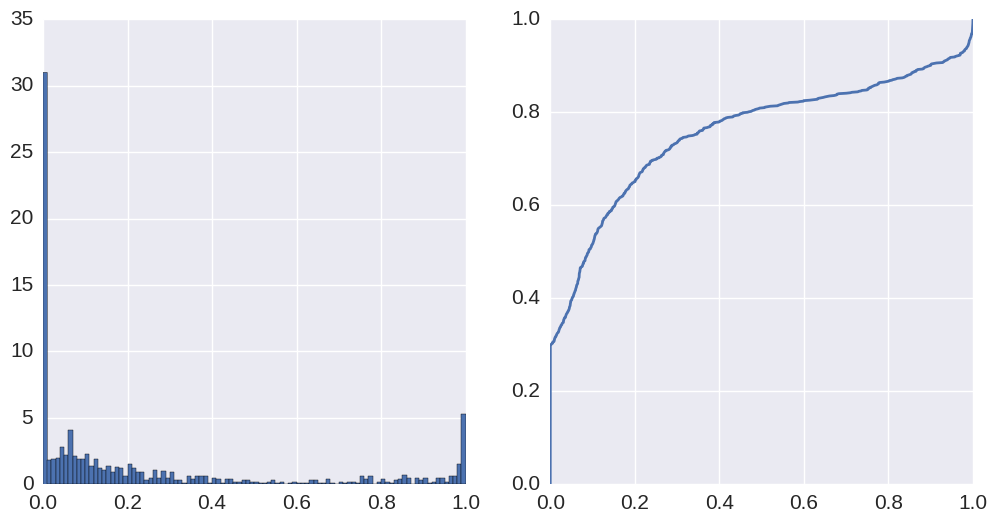

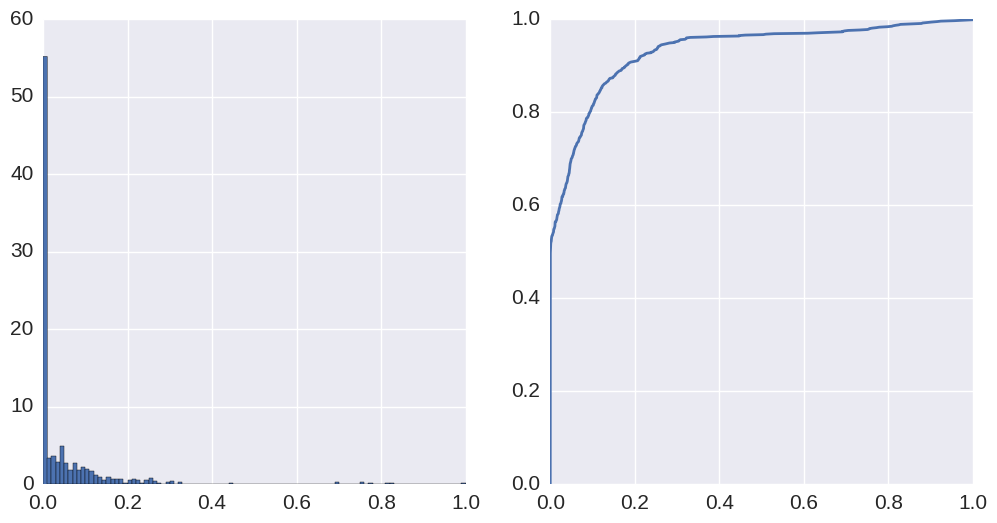

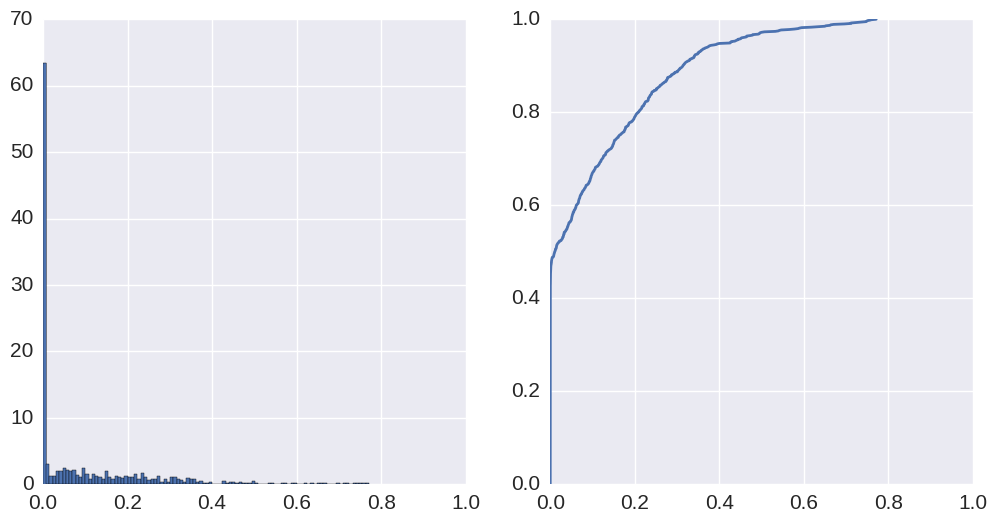

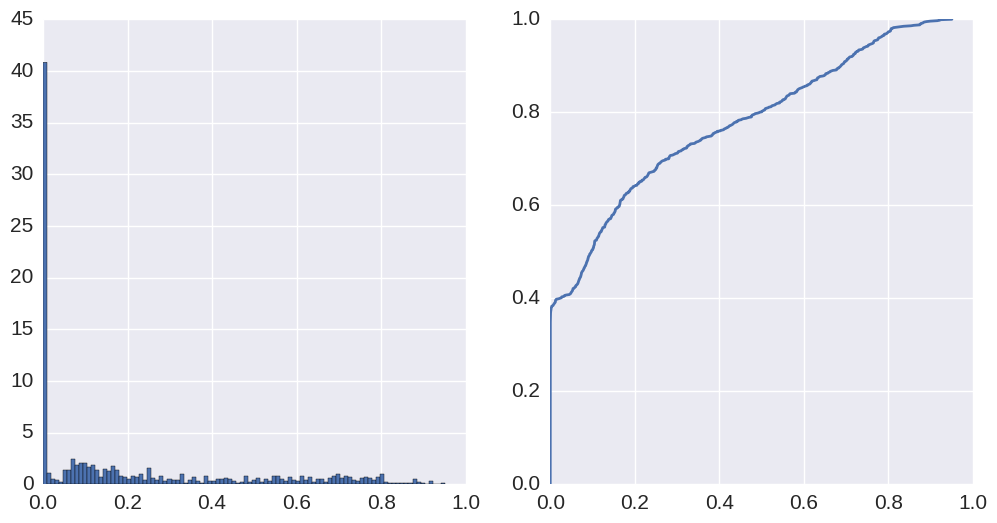

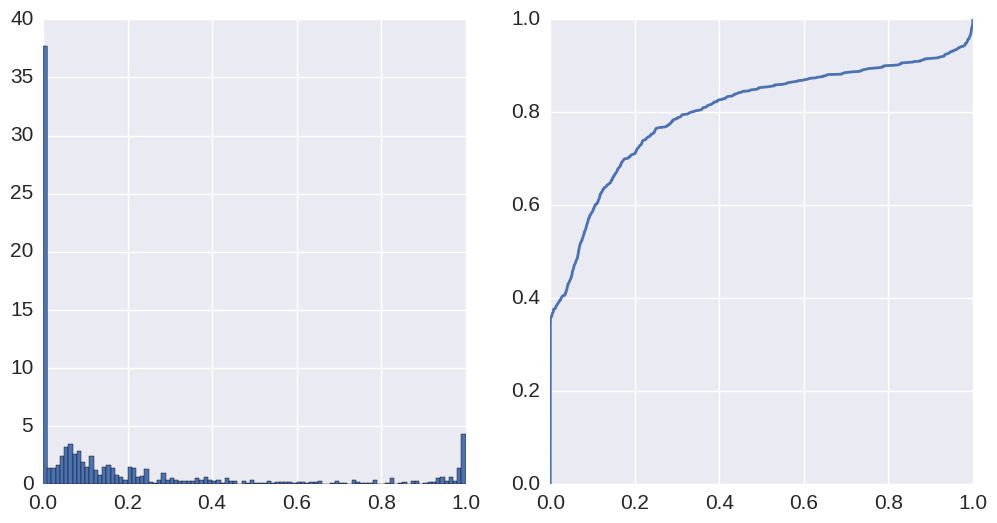

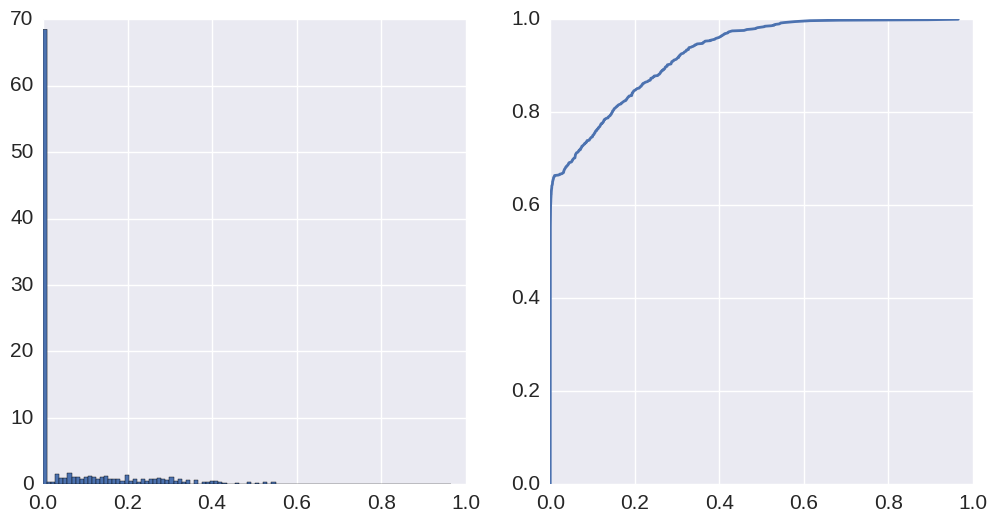

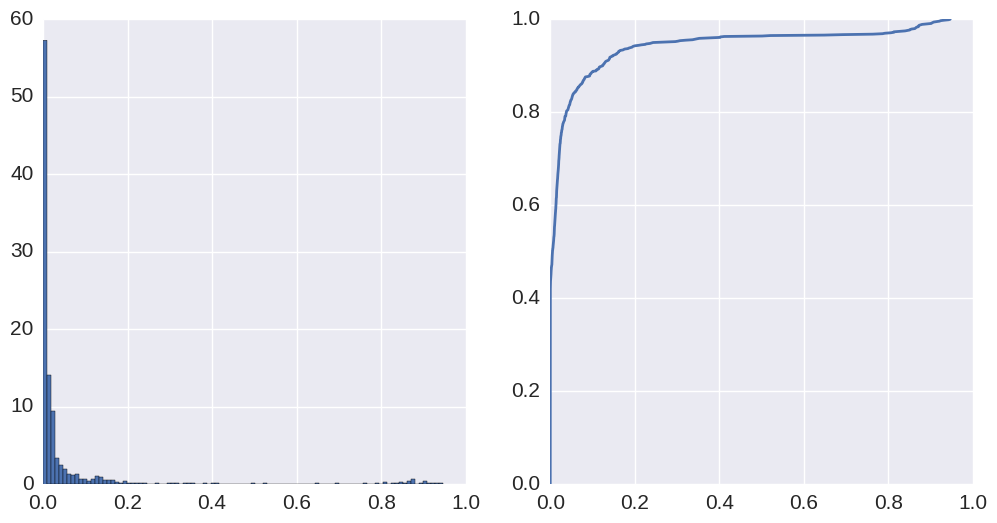

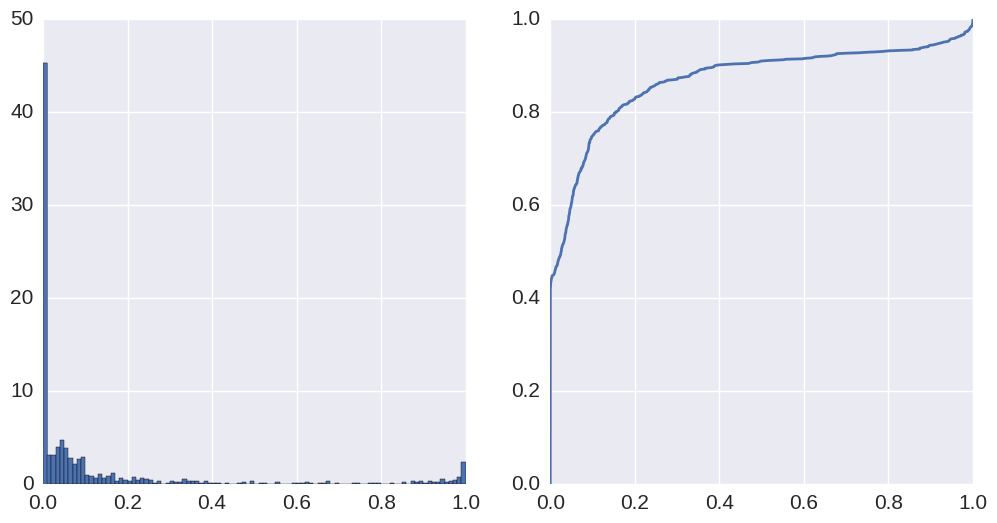

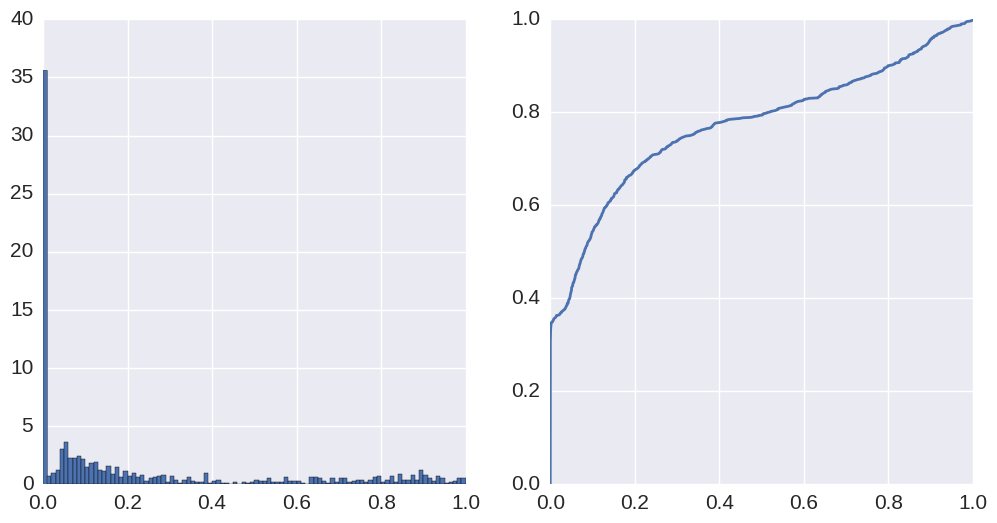

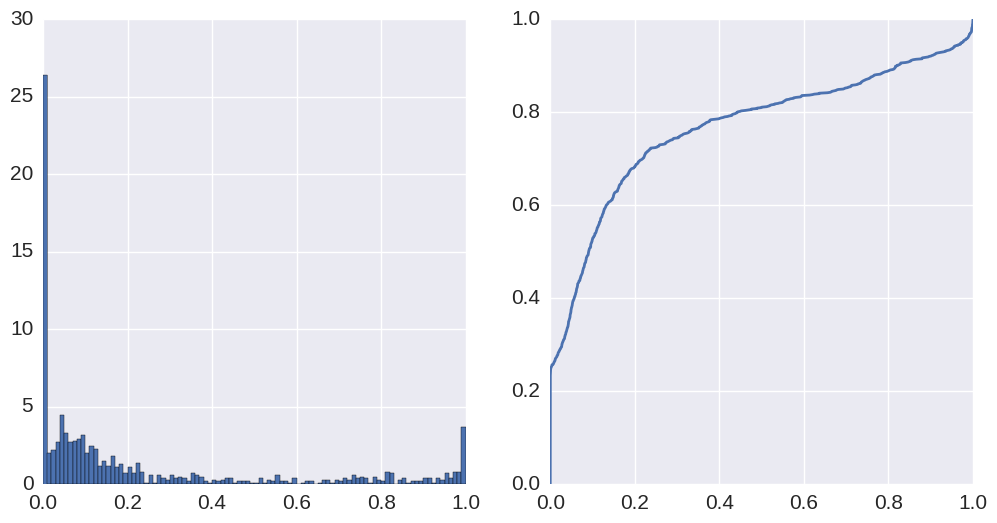

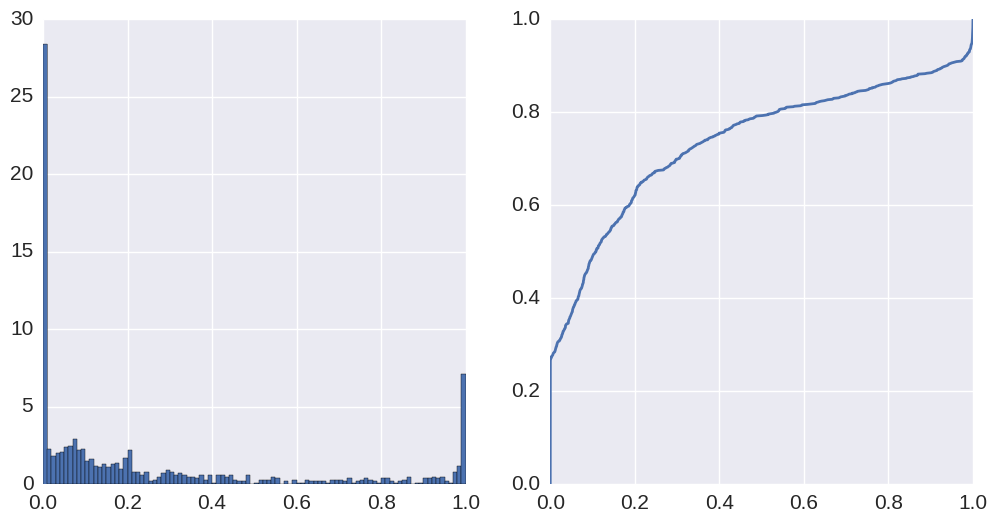

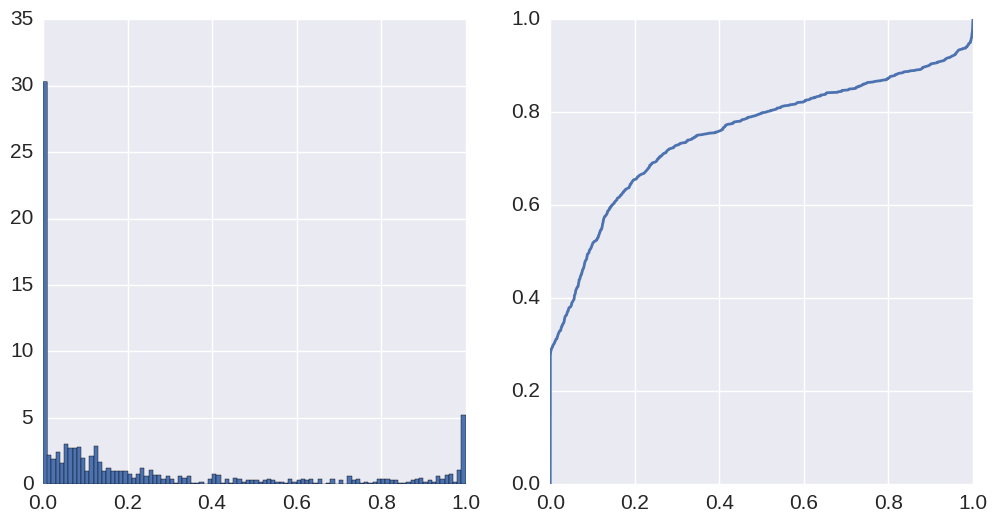

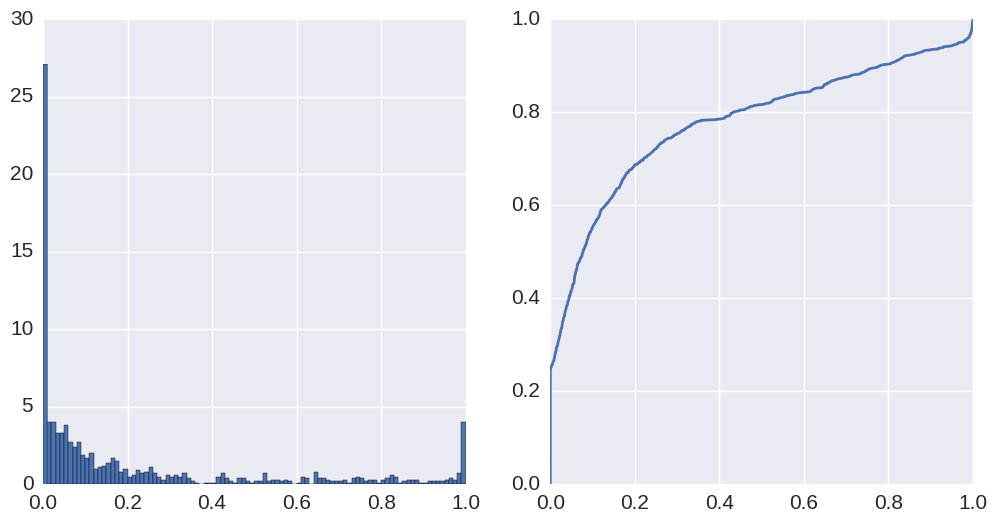

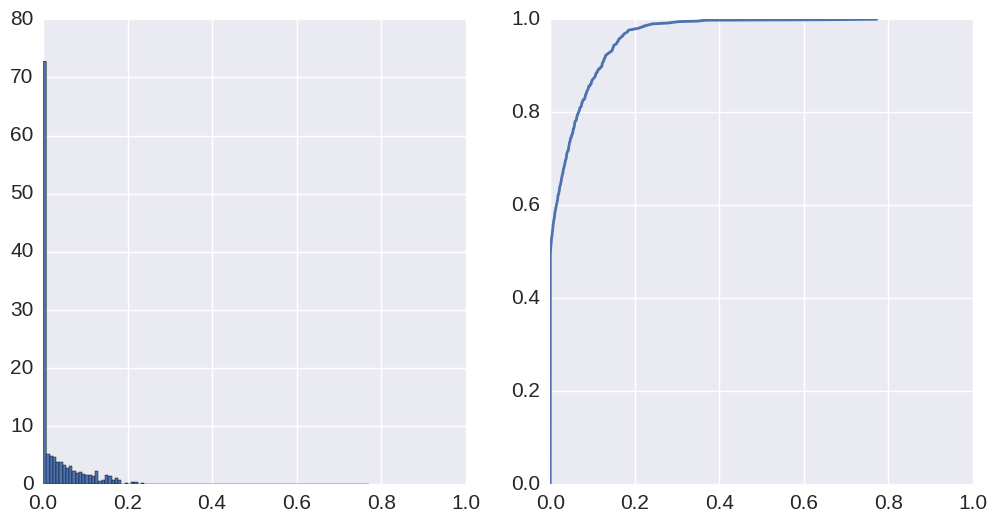

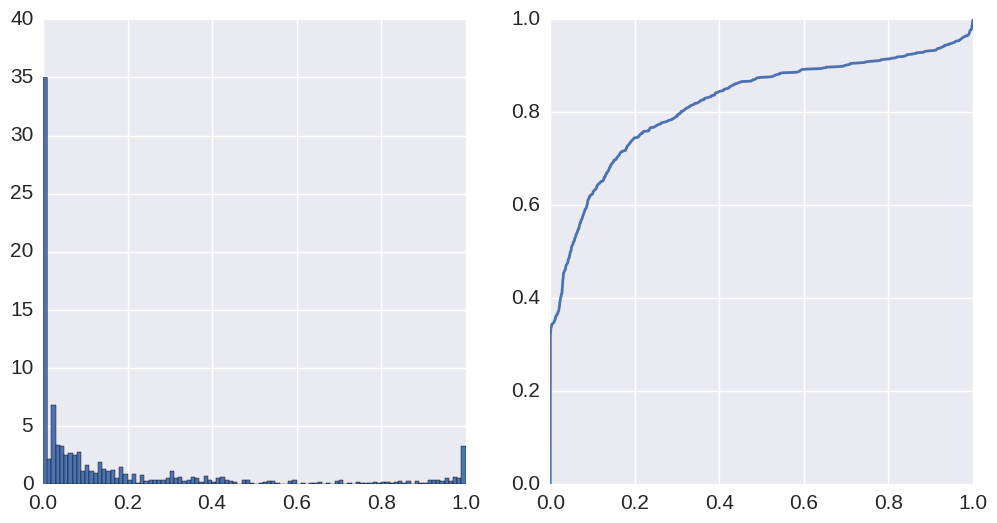

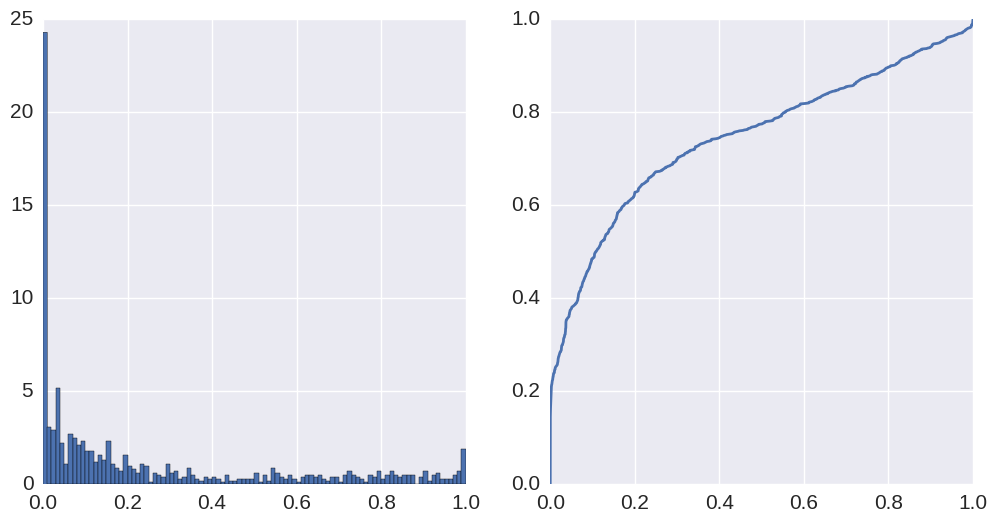

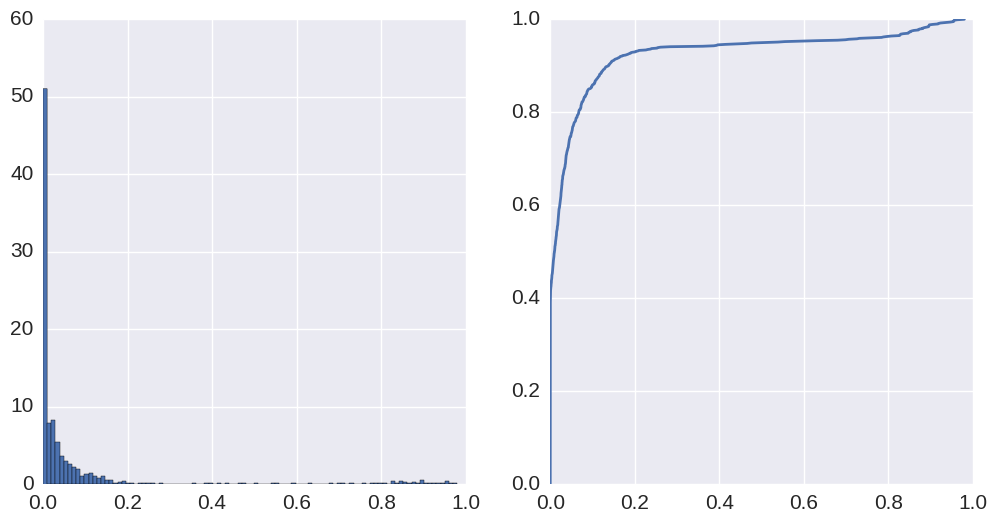

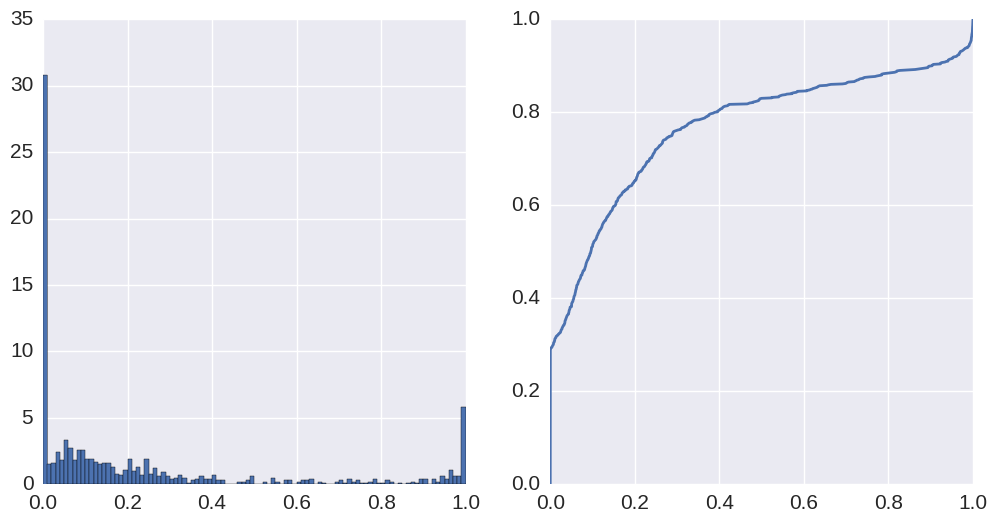

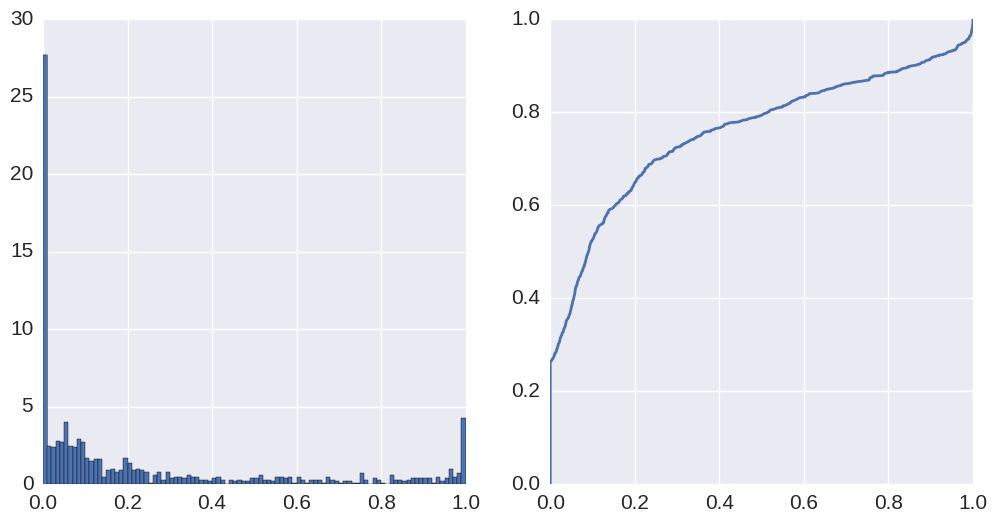

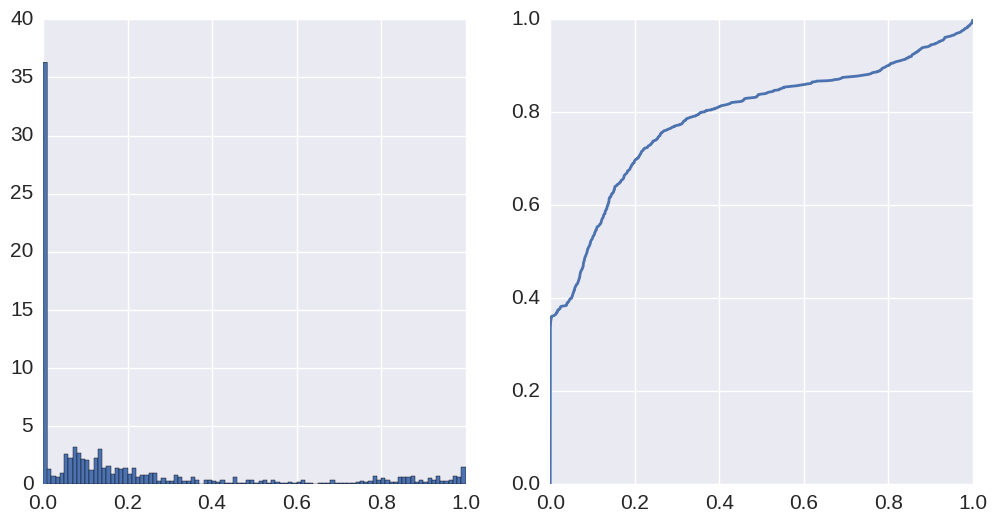

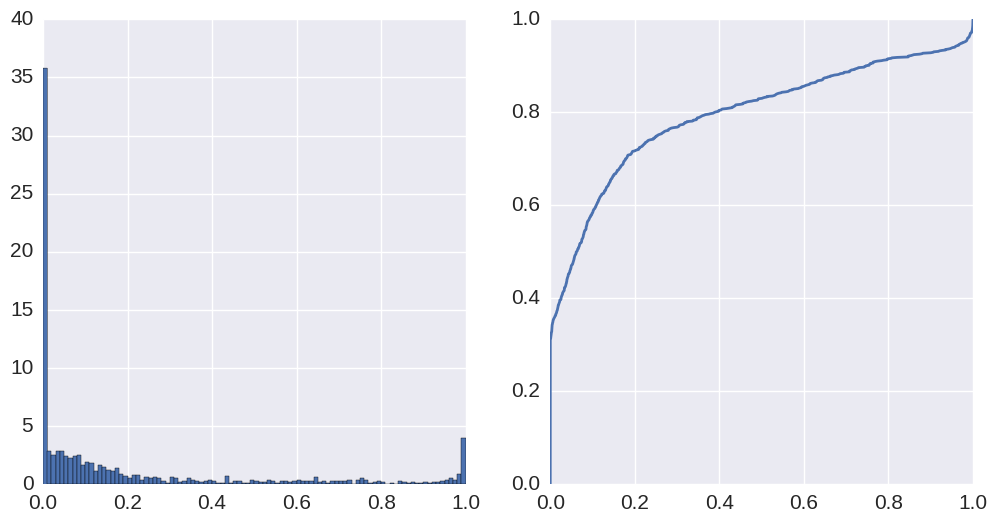

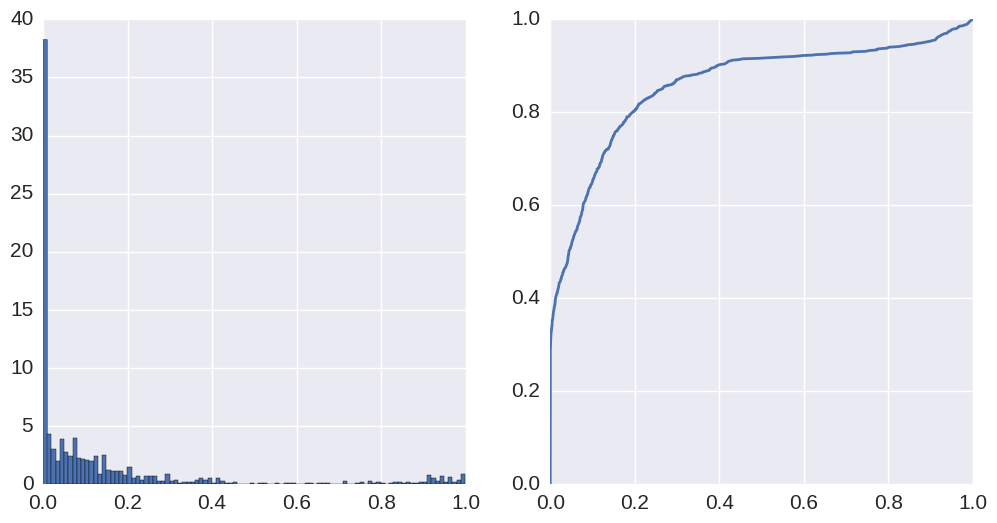

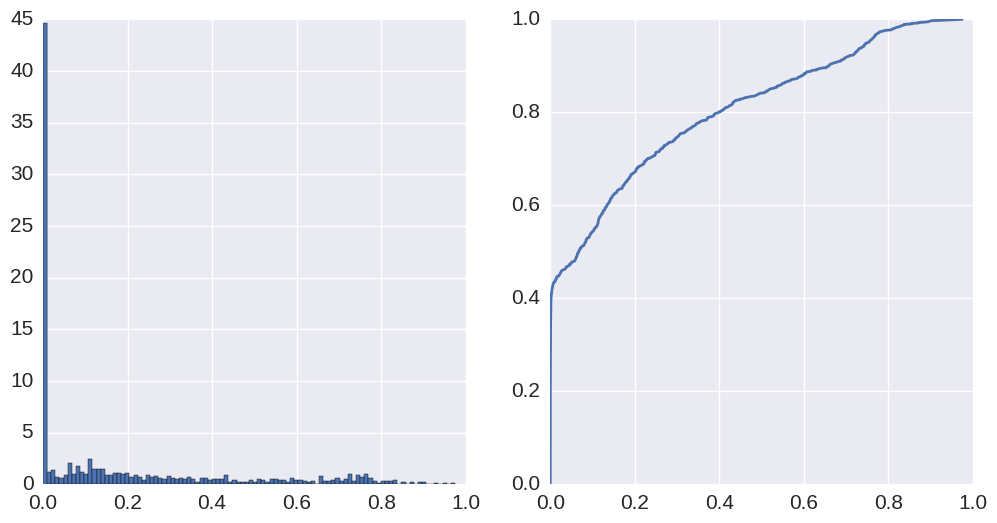

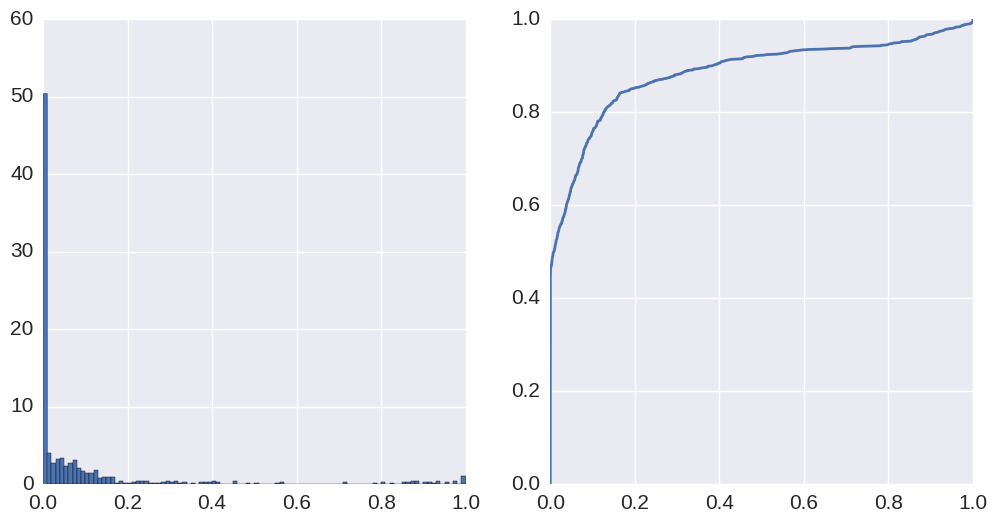

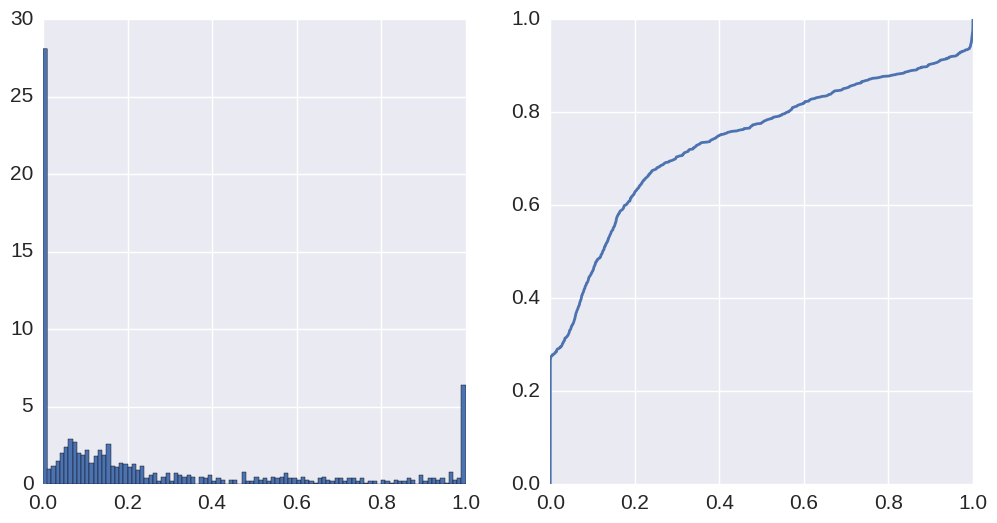

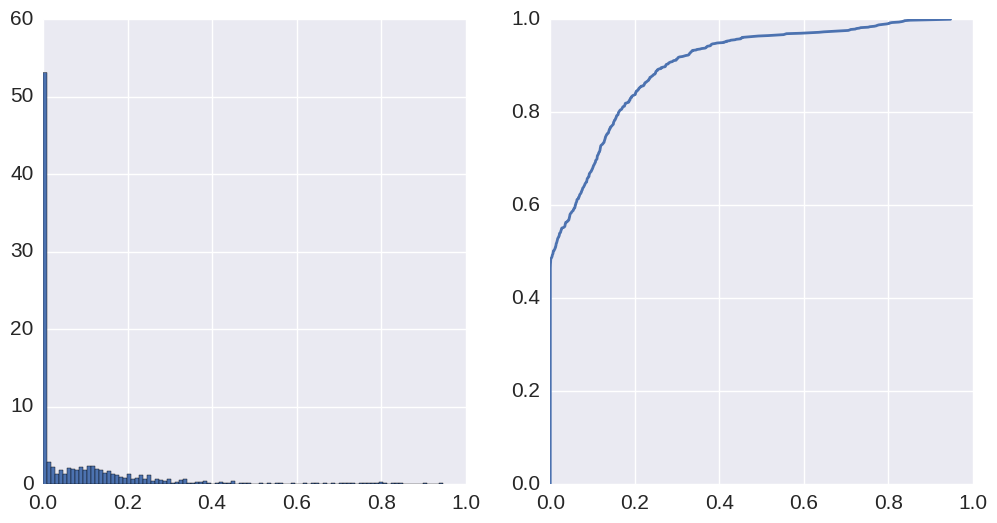

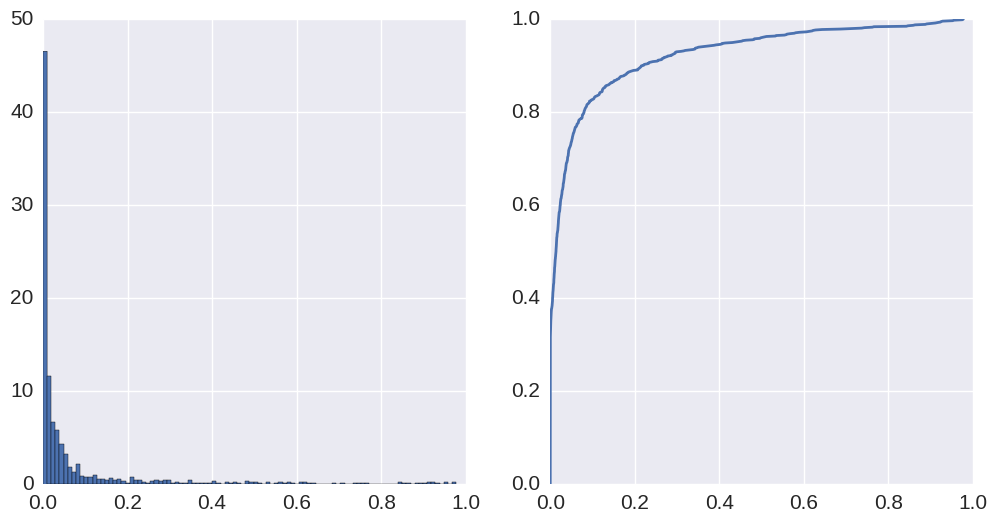

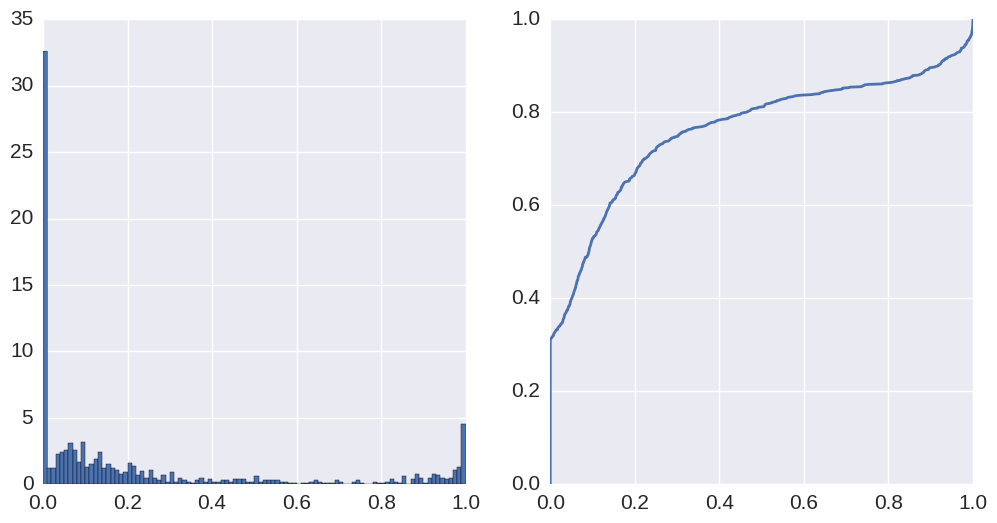

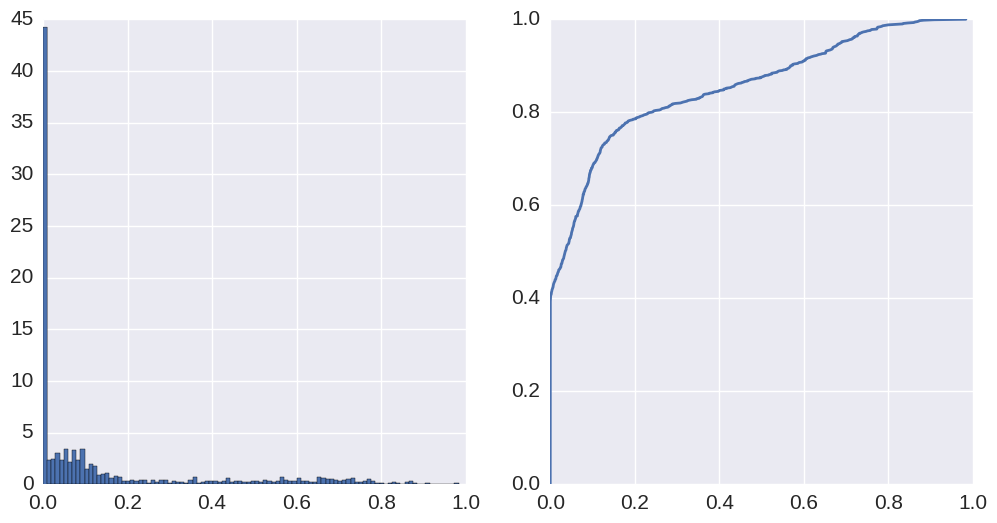

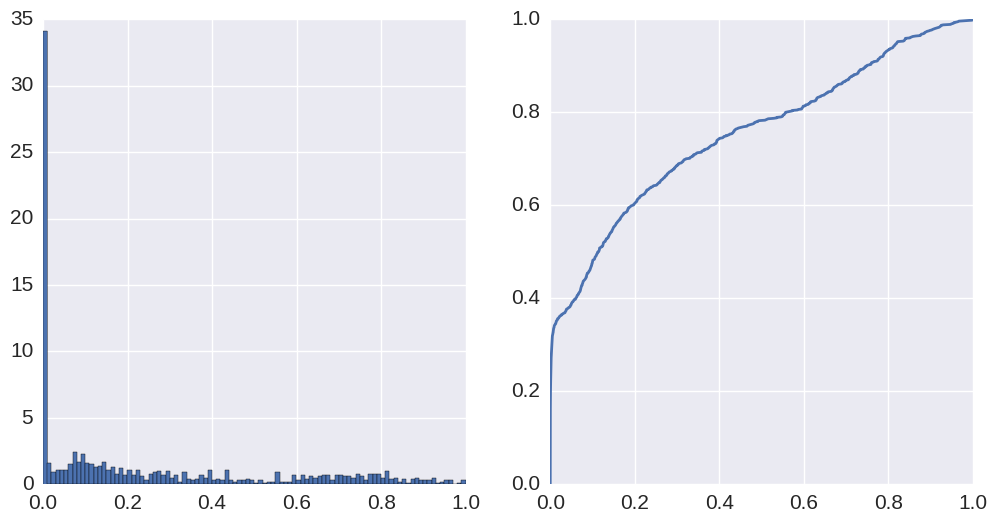

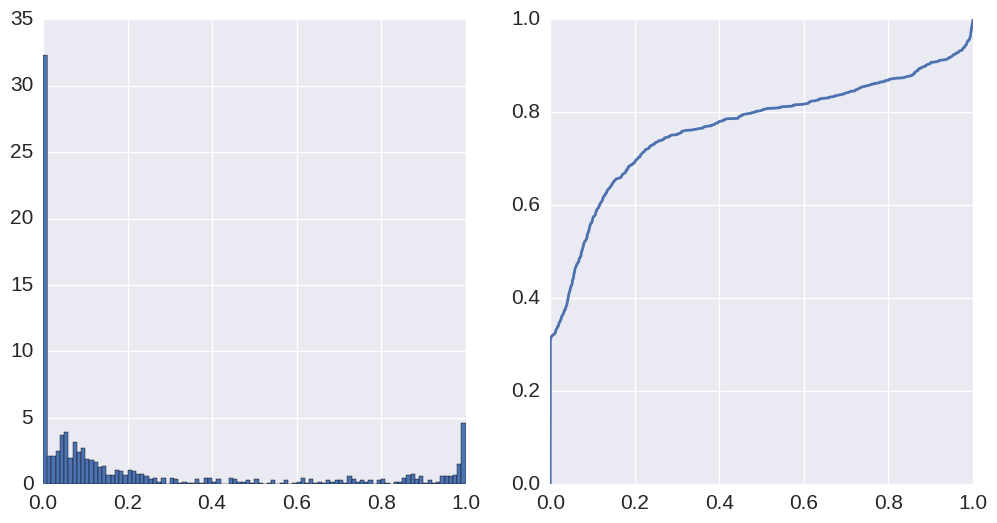

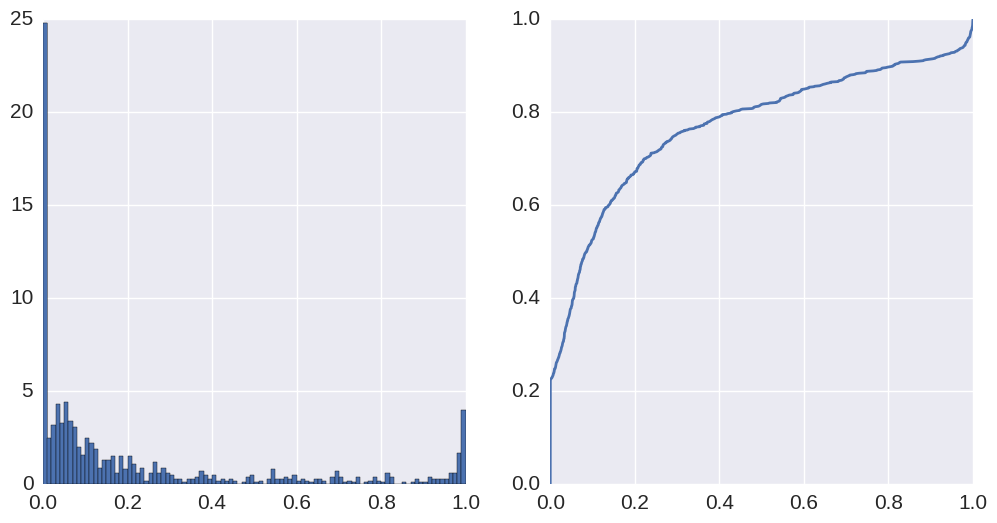

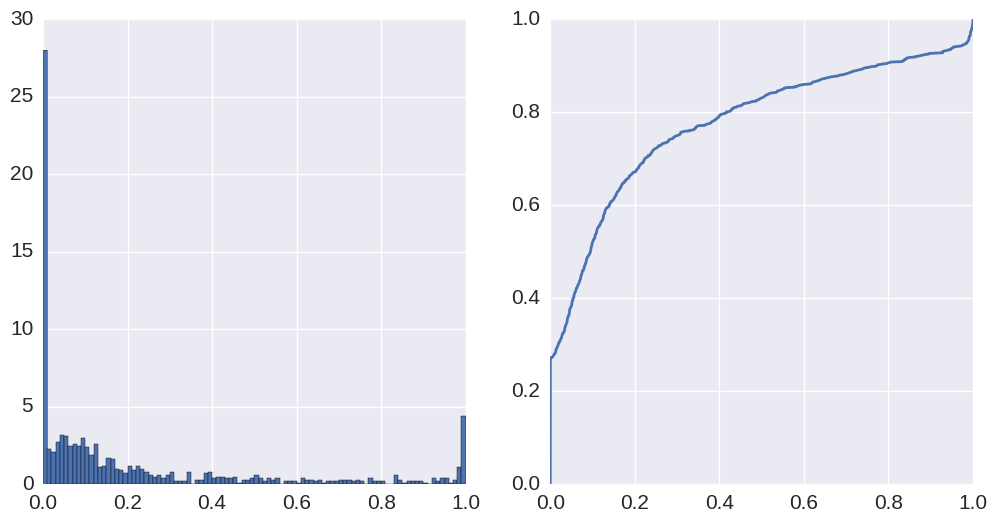

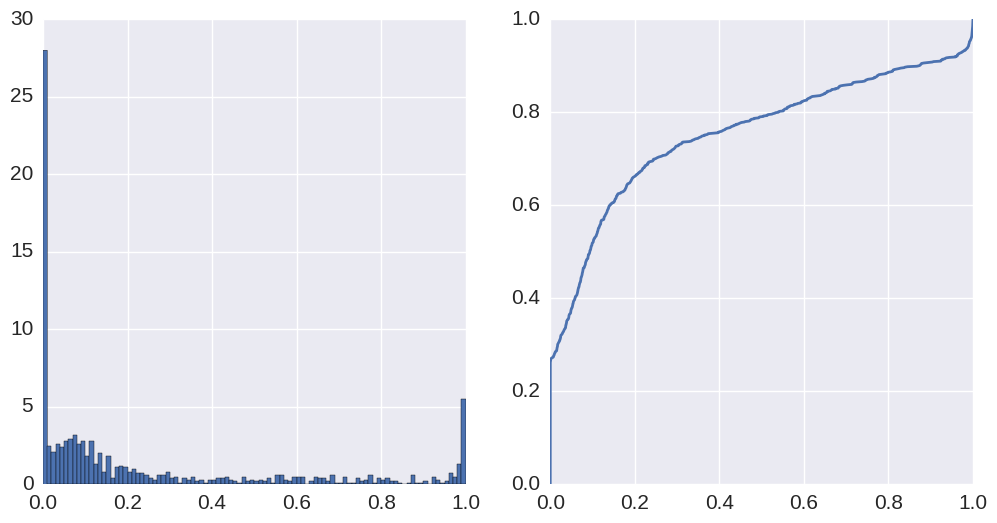

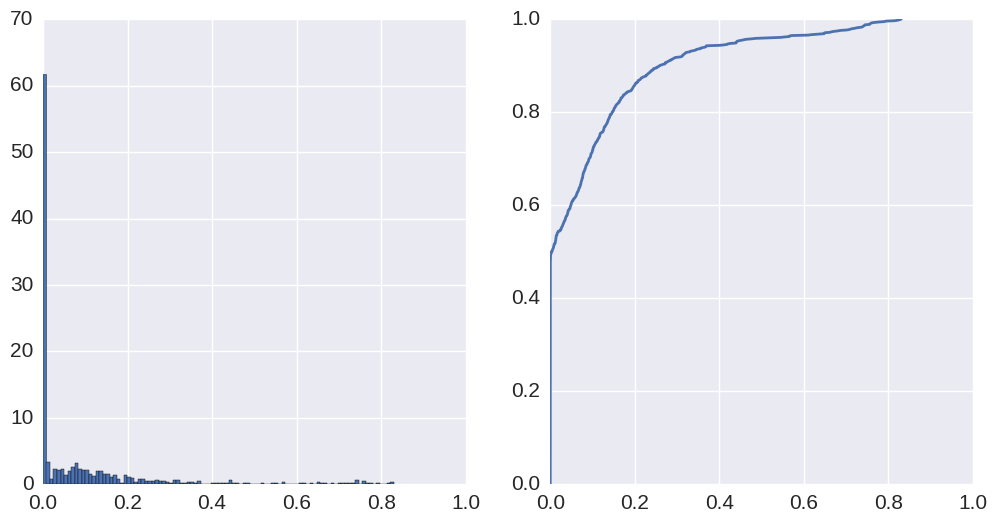

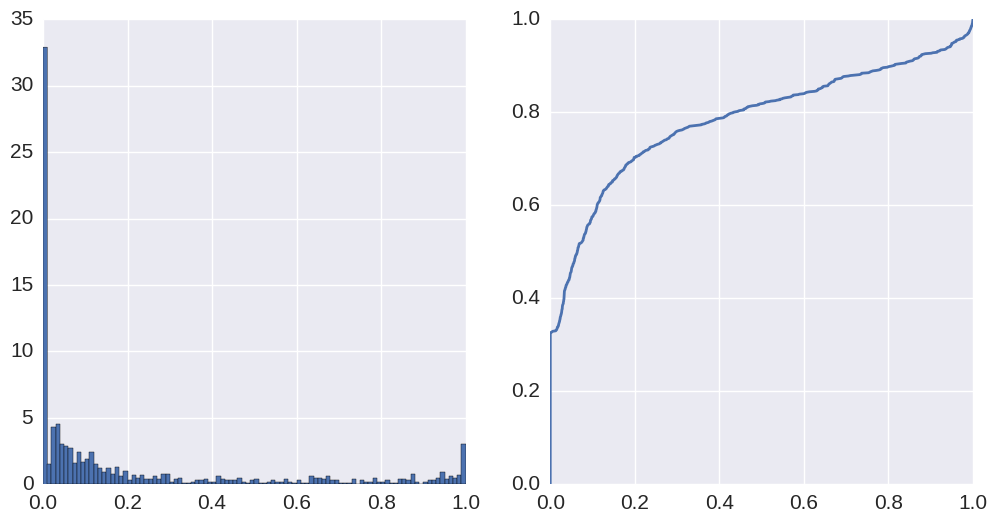

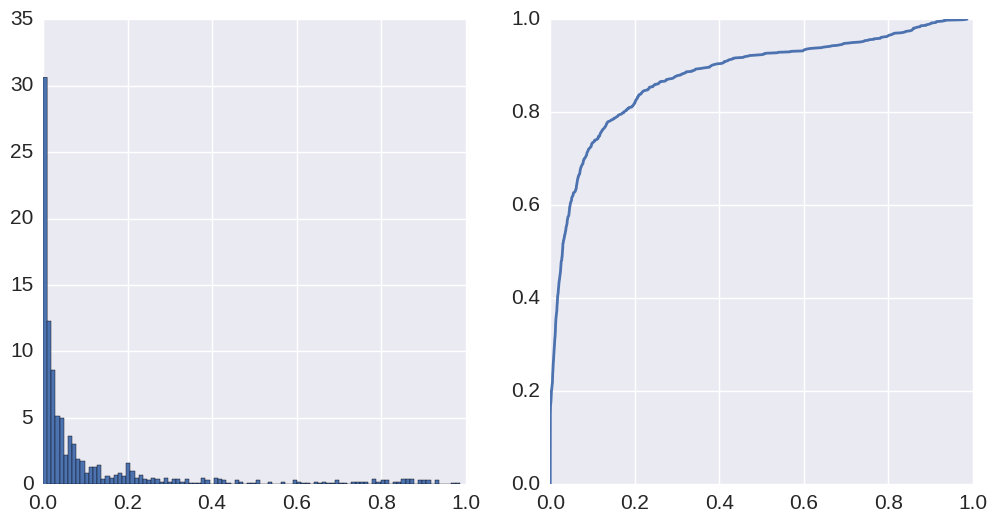

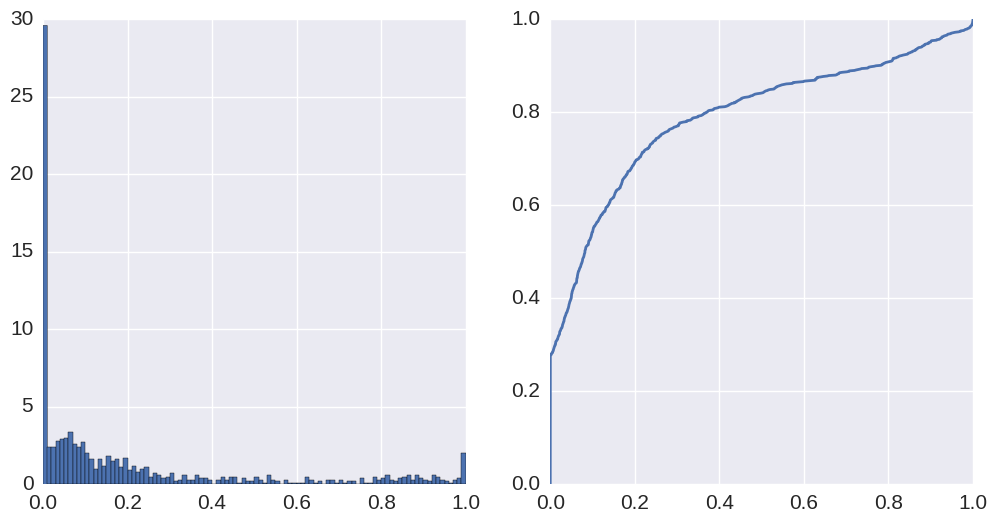

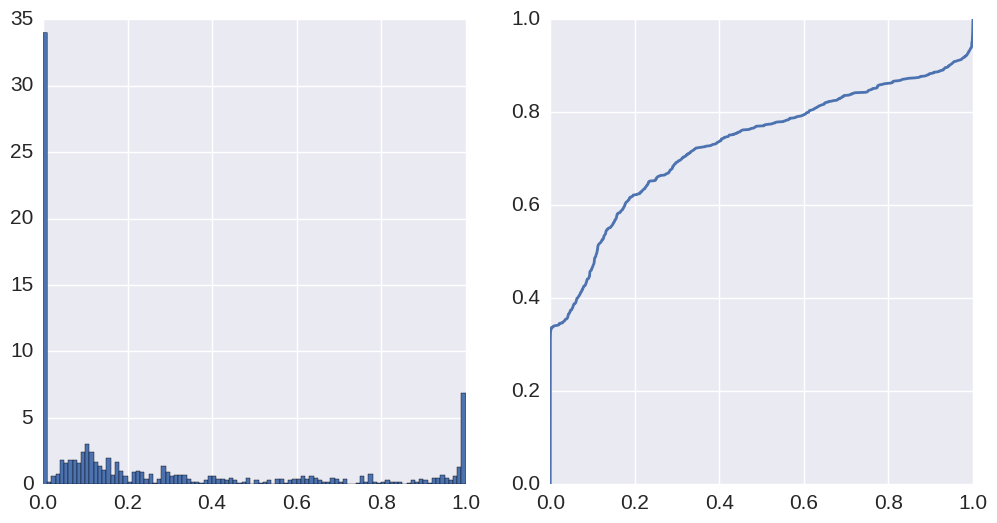

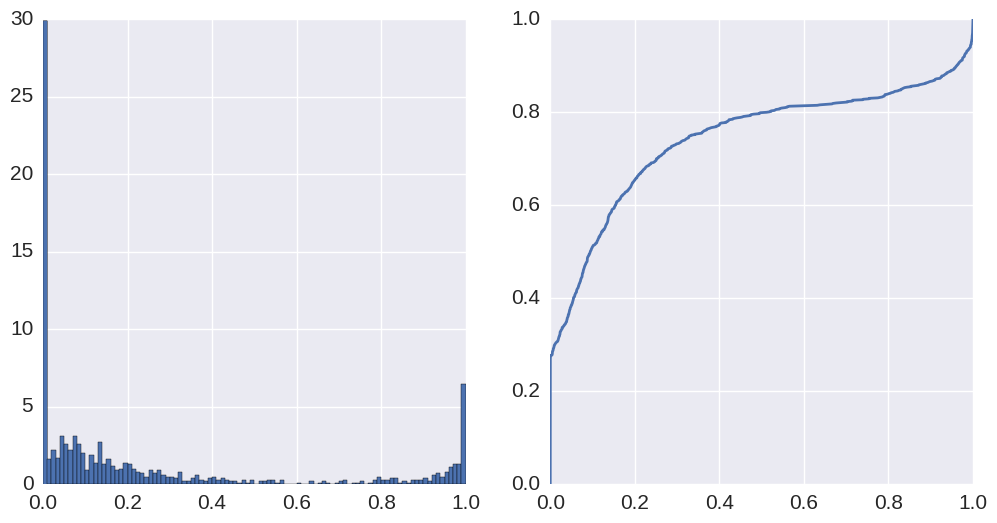

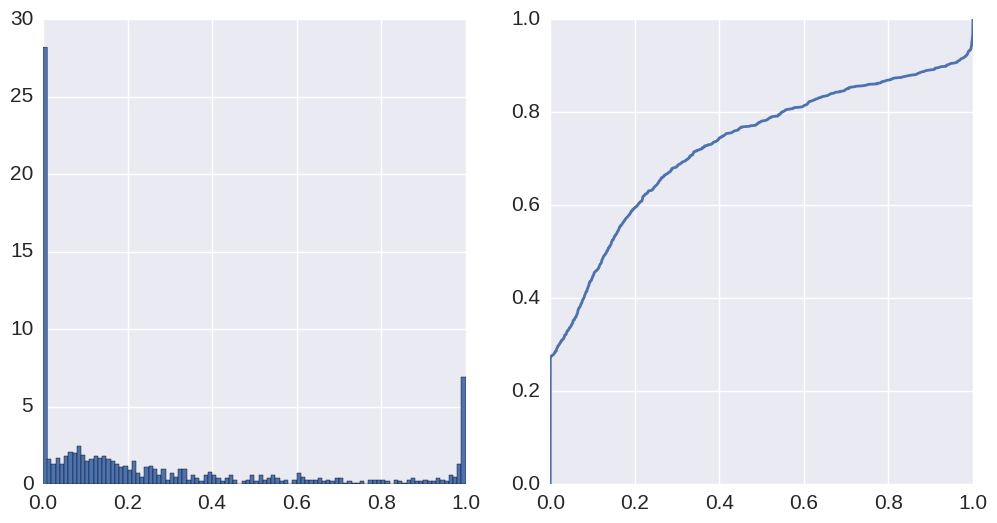

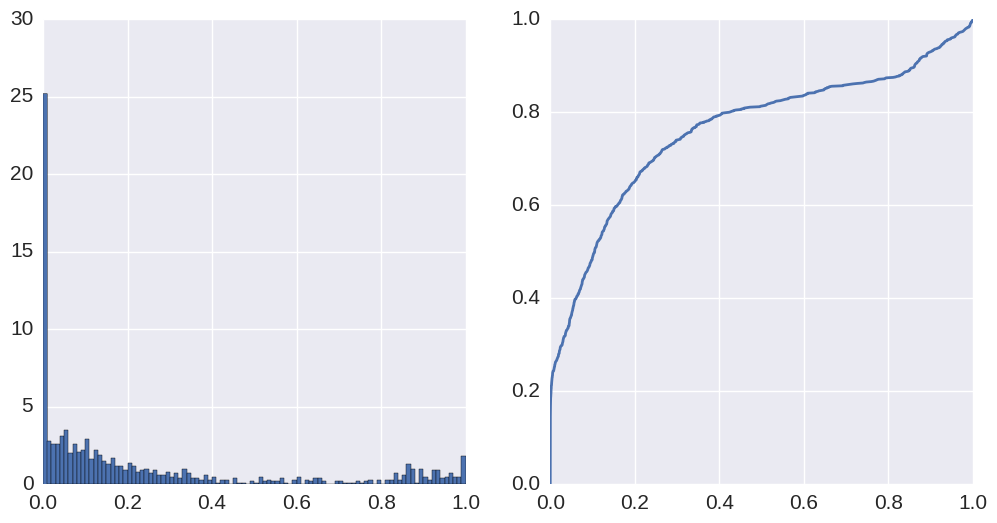

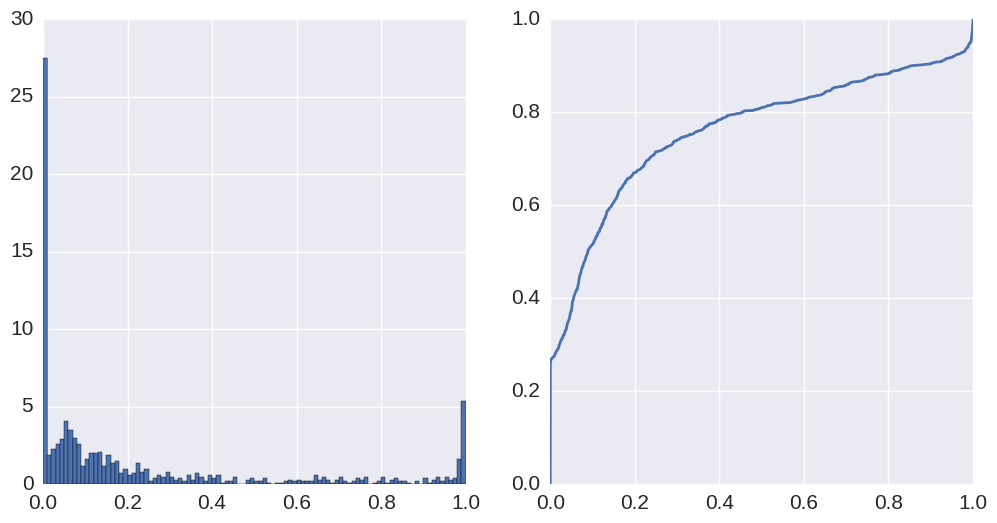

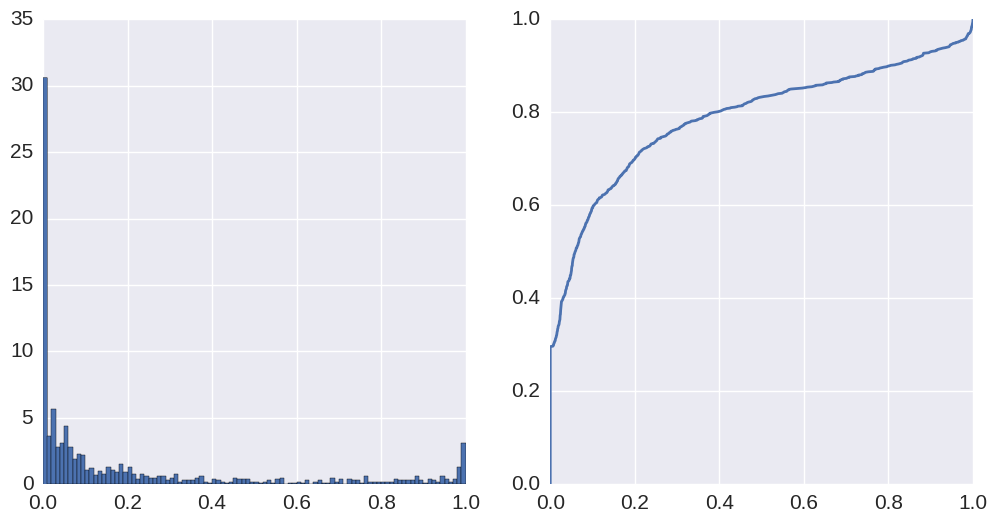

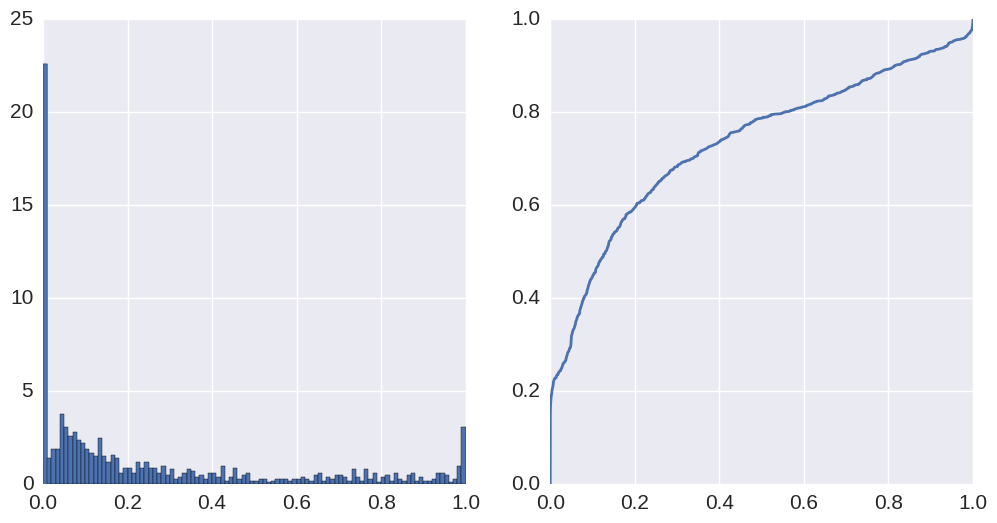

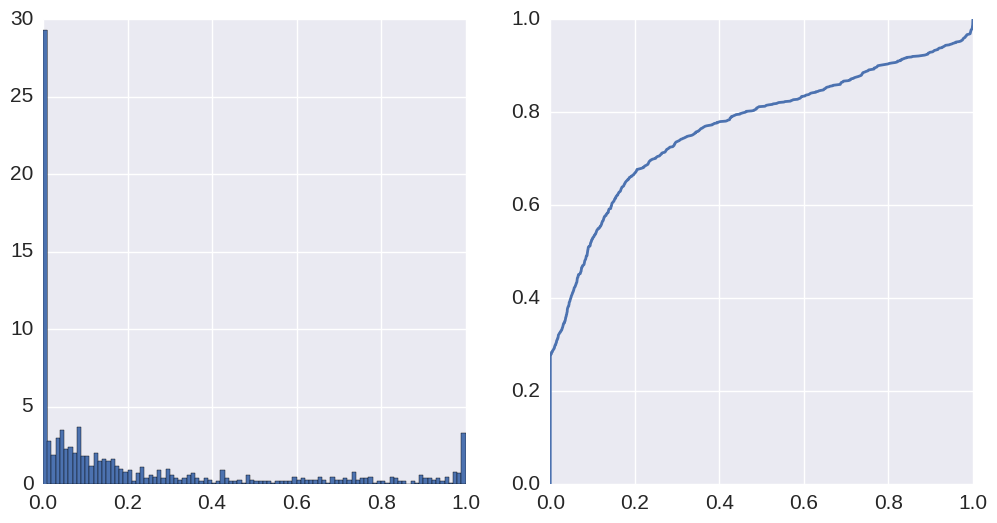

In [38]:
%cd /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets
%run reloader_bootstrap_experimental_gorgo11_sequential_240717.py

In [39]:
print("P-values, Collapsing across subjects")
print(result_pvalue_bootstrap_nitems_trecall)

print("P-values, per subjects")
print(result_pvalue_bootstrap_subject_nitems_trecall)

P-values, Collapsing across subjects
[[   nan    nan    nan    nan    nan    nan]
 [ 0.     0.       nan    nan    nan    nan]
 [ 0.     0.     0.       nan    nan    nan]
 [ 0.     0.     0.014  0.001    nan    nan]
 [ 0.     0.     0.     0.008  0.001    nan]
 [ 0.     0.     0.     0.042  0.021  0.   ]]
P-values, per subjects
[[[        nan         nan         nan         nan         nan         nan]
  [ 0.          0.001              nan         nan         nan         nan]
  [ 0.014       0.056       0.003              nan         nan         nan]
  [ 0.438       0.096       0.14        0.                 nan         nan]
  [ 0.071       0.034       0.466       0.007       0.005              nan]
  [ 0.147       0.221       0.016       0.132       0.148       0.        ]]

 [[        nan         nan         nan         nan         nan         nan]
  [ 0.304       0.                 nan         nan         nan         nan]
  [ 0.181       0.012       0.001              nan         

In [40]:
print("num significant subjects, collapsing across subjects")
print(result_pvalue_bootstrap_nitems_trecall < 0.001)

print("num significant subjects, per subjects")
print(np.sum(result_pvalue_bootstrap_subject_nitems_trecall < 0.01, axis=0))

num significant subjects, collapsing across subjects
[[False False False False False False]
 [ True  True False False False False]
 [ True  True  True False False False]
 [ True  True False False False False]
 [ True  True  True False False False]
 [ True  True  True False False  True]]
num significant subjects, per subjects
[[0 0 0 0 0 0]
 [2 8 0 0 0 0]
 [1 4 7 0 0 0]
 [0 4 2 5 0 0]
 [1 0 2 4 4 0]
 [1 0 1 0 2 3]]
